# Backtesting Crossover Strategies on Hourly datasets for Ether and BTC

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Backtesting-Crossover-Strategies-on-Hourly-datasets-for-Ether-and-BTC" data-toc-modified-id="Backtesting-Crossover-Strategies-on-Hourly-datasets-for-Ether-and-BTC-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Backtesting Crossover Strategies on Hourly datasets for Ether and BTC</a></span><ul class="toc-item"><li><span><a href="#Preparations:" data-toc-modified-id="Preparations:-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Preparations:</a></span></li></ul></li><li><span><a href="#ETHER" data-toc-modified-id="ETHER-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>ETHER</a></span><ul class="toc-item"><li><span><a href="#Download-and-organise-data-from-Binance-(ETH-/-USDT)-1-hour-candles" data-toc-modified-id="Download-and-organise-data-from-Binance-(ETH-/-USDT)-1-hour-candles-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Download and organise data from Binance (ETH / USDT) 1 hour candles</a></span></li><li><span><a href="#Lets-see-how-the-downloaded-data-looks-like" data-toc-modified-id="Lets-see-how-the-downloaded-data-looks-like-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Lets see how the downloaded data looks like</a></span></li><li><span><a href="#EMA-and-Price-Crossover-Backtest-on-ETH-/-USDT" data-toc-modified-id="EMA-and-Price-Crossover-Backtest-on-ETH-/-USDT-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>EMA and Price Crossover Backtest on ETH / USDT</a></span></li><li><span><a href="#Optimise-parameters-for-EMA-and-Price-Crossover" data-toc-modified-id="Optimise-parameters-for-EMA-and-Price-Crossover-2.4"><span class="toc-item-num">2.4&nbsp;&nbsp;</span>Optimise parameters for EMA and Price Crossover</a></span></li><li><span><a href="#Simple-EMA-crossover-strategy-for-Ether" data-toc-modified-id="Simple-EMA-crossover-strategy-for-Ether-2.5"><span class="toc-item-num">2.5&nbsp;&nbsp;</span>Simple EMA crossover strategy for Ether</a></span></li><li><span><a href="#Now-we-can-check-if-the-result-could-be-improved-with-optimised-parameters." data-toc-modified-id="Now-we-can-check-if-the-result-could-be-improved-with-optimised-parameters.-2.6"><span class="toc-item-num">2.6&nbsp;&nbsp;</span>Now we can check if the result could be improved with optimised parameters.</a></span></li><li><span><a href="#Backtest-with-optimised-parameters-for-ETH-/-USDT" data-toc-modified-id="Backtest-with-optimised-parameters-for-ETH-/-USDT-2.7"><span class="toc-item-num">2.7&nbsp;&nbsp;</span>Backtest with optimised parameters for ETH / USDT</a></span></li></ul></li><li><span><a href="#Bitcoin" data-toc-modified-id="Bitcoin-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Bitcoin</a></span><ul class="toc-item"><li><span><a href="#Download-and-organise-data-from-Binance-(BTC-/-USDT)-1-hour-candles" data-toc-modified-id="Download-and-organise-data-from-Binance-(BTC-/-USDT)-1-hour-candles-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Download and organise data from Binance (BTC / USDT) 1 hour candles</a></span></li><li><span><a href="#Visualise-BTC-price-data" data-toc-modified-id="Visualise-BTC-price-data-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Visualise BTC price data</a></span></li><li><span><a href="#Backtest:-EMA-and-Price-Crossover-strategy-on-BTC-/-USDT-1h" data-toc-modified-id="Backtest:-EMA-and-Price-Crossover-strategy-on-BTC-/-USDT-1h-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>Backtest: EMA and Price Crossover strategy on BTC / USDT 1h</a></span></li><li><span><a href="#Optimise-parameters-for-EMA-and-Price-Crossover" data-toc-modified-id="Optimise-parameters-for-EMA-and-Price-Crossover-3.4"><span class="toc-item-num">3.4&nbsp;&nbsp;</span>Optimise parameters for EMA and Price Crossover</a></span></li><li><span><a href="#Backtest-Simple-EMA-crossover-strategy" data-toc-modified-id="Backtest-Simple-EMA-crossover-strategy-3.5"><span class="toc-item-num">3.5&nbsp;&nbsp;</span>Backtest Simple EMA crossover strategy</a></span></li><li><span><a href="#Optimise-Simple-EMA-crossover-strategy-parameters" data-toc-modified-id="Optimise-Simple-EMA-crossover-strategy-parameters-3.6"><span class="toc-item-num">3.6&nbsp;&nbsp;</span>Optimise Simple EMA crossover strategy parameters</a></span></li><li><span><a href="#Backtest-with-optimised-parameters-for-simple-EMA-crossover" data-toc-modified-id="Backtest-with-optimised-parameters-for-simple-EMA-crossover-3.7"><span class="toc-item-num">3.7&nbsp;&nbsp;</span>Backtest with optimised parameters for simple EMA crossover</a></span></li></ul></li><li><span><a href="#The-End" data-toc-modified-id="The-End-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>The End</a></span></li></ul></div>

## Preparations:

In [2]:
# imports
from __future__ import (absolute_import, division, print_function,
                        unicode_literals)

import matplotlib.pyplot as plt
import pandas as pd

import datetime  # For datetime objects
import pprint
import itertools

import backtrader as bt

from binance.client import Client
from klychi import api_key, api_secret

client = Client(api_key, api_secret)

# to display all of the columns and rows and max width
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

# to solve issue of bt plot not showing after re-running the cell
%matplotlib inline
# %config InlineBackend.figure_format = 'svg'  # improves the quality of graphs

# set size for plots (width, height)
plt.rcParams['figure.figsize'] = [18, 14]
plt.style.use('ggplot')

In [3]:
def organise_binance_klines(df, save_csv=False, csv_name=''):
    col_names = ['open_time_unix', 'open', 'high', 'low', 'close', 'volume', 
                 'close_time_unix', 'quote_asset_volume', 'number_of_trades', 
                 'taker_buy_base_asset_volume', 'taker_buy_quote_asset_volume', 'ignore']
    
    df_new = df.copy()
    
    # change unix time to datetime; binance show time in ms
    df_new['candle-start'] = pd.to_datetime(df_new[0], unit='ms')
    df_new['candle-end'] = pd.to_datetime(df_new[6], unit='ms')
    
    # rename columns
    df_new.columns = col_names + ['candle-start', 'candle-end']
    
    # set index and drop extra columns
    df_new.set_index(['candle-end'], inplace=True)
    
    # change dtypes of data from object to float/int
    df_new = df_new.astype({'open': 'float64', 'high': 'float64', 'low': 'float64', 'close': 'float64',
                            'volume': 'float64','quote_asset_volume': 'float64', 'number_of_trades': 'int64',
                            'taker_buy_base_asset_volume': 'float64', 
                            'taker_buy_quote_asset_volume': 'float64'})
    
    if save_csv:
        df_new.to_csv(path_or_buf=str(csv_name) + '.csv')
    
    return df_new


def printTradeAnalysis(analyzer):
    '''
    Function to print the Technical Analysis results in a nice format.
    '''
    #Get the results we are interested in
    total_open = analyzer.total.open
    total_closed = analyzer.total.closed
    total_won = analyzer.won.total
    total_lost = analyzer.lost.total
    win_streak = analyzer.streak.won.longest
    lose_streak = analyzer.streak.lost.longest
    pnl_net = round(analyzer.pnl.net.total, 2)
    strike_rate = round(number=((total_won / total_closed) * 100), ndigits=2)
    #Designate the rows
    h1 = ['Total Open', 'Total Closed', 'Total Won', 'Total Lost']
    h2 = ['Strike Rate %','Win Streak', 'Losing Streak', 'PnL Net']
    r1 = [total_open, total_closed,total_won,total_lost]
    r2 = [strike_rate, win_streak, lose_streak, pnl_net]
    #Check which set of headers is the longest.
    if len(h1) > len(h2):
        header_length = len(h1)
    else:
        header_length = len(h2)
    #Print the rows
    print_list = [h1,r1,h2,r2]
    row_format ="{:<15}" * (header_length + 1)
    print("Trade Analysis Results:")
    for row in print_list:
        print(row_format.format('',*row))


def printDrawDown(analyzer):
    '''
    Function to print the DrawDown results in a nice format.
    '''
    ddpct = round(analyzer.drawdown, 2)
    moneydd = round(analyzer.moneydown, 2)
    ddlen = analyzer.len
    maxdd = round(analyzer.max.drawdown, 2)
    maxmoneydd = round(analyzer.max.moneydown, 2)
    maxddlen = analyzer.max.len
    
    # Designate the rows
    h1 = ['DrawDown %', 'Money Down $', 'DrawDown Length']
    h2 = ['Max DrawDown %','Max MoneyDown $ ', 'Max DrawDown Length']
    r1 = [ddpct, moneydd, ddlen]
    r2 = [maxdd, maxmoneydd, maxddlen]
    
    #Check which set of headers is the longest.
    if len(h1) > len(h2):
        header_length = len(h1)
    else:
        header_length = len(h2)
    #Print the rows
    print_list = [h1,r1,h2,r2]
    row_format ="{:<15}" * (header_length + 1)
    print("DrawDown Results:")
    for row in print_list:
        print(row_format.format('',*row))



# ETHER

## Download and organise data from Binance (ETH / USDT) 1 hour candles

In [27]:
# download data (might take a minute)
# ETH/USDT pair at 1 hour granularity
eth_usdt1m_raw = pd.DataFrame(client.get_historical_klines("ETHUSDT", 
                                                           Client.KLINE_INTERVAL_1MINUTE, 
                                                           '1 Jan 2017'))

In [29]:
# organise eth/usdt data
eth_usdt1m = organise_binance_klines(eth_usdt1m_raw, save_csv=True, csv_name='eth_usdt1m')

# describe downloaded data
eth_usdt1m.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1067767 entries, 2017-08-17 04:00:59.999000 to 2019-09-01 19:39:59.999000
Data columns (total 13 columns):
open_time_unix                  1067767 non-null int64
open                            1067767 non-null float64
high                            1067767 non-null float64
low                             1067767 non-null float64
close                           1067767 non-null float64
volume                          1067767 non-null float64
close_time_unix                 1067767 non-null int64
quote_asset_volume              1067767 non-null float64
number_of_trades                1067767 non-null int64
taker_buy_base_asset_volume     1067767 non-null float64
taker_buy_quote_asset_volume    1067767 non-null float64
ignore                          1067767 non-null object
candle-start                    1067767 non-null datetime64[ns]
dtypes: datetime64[ns](1), float64(8), int64(3), object(1)
memory usage: 114.0+ MB


In [6]:
eth_usdt1m.head()

,open_time_unix,open,high,low,close,volume,close_time_unix,quote_asset_volume,number_of_trades,taker_buy_base_asset_volume,taker_buy_quote_asset_volume,ignore,candle-start
candle-end,,,,,,,,,,,,,
2017-08-17 04:59:59.999,1502942400000,301.13,302.57,298.0,301.61,125.66877,1502945999999,37684.804181,129,80.56377,24193.440789,47039.70675719,2017-08-17 04:00:00
2017-08-17 05:59:59.999,1502946000000,301.61,303.28,300.0,303.10,377.67246,1502949599999,114043.282676,202,328.10428,99079.803569,47250.80517462,2017-08-17 05:00:00
2017-08-17 06:59:59.999,1502949600000,302.40,304.44,301.9,302.68,303.86672,1502953199999,92034.441294,182,259.28668,78525.948613,47176.44458354,2017-08-17 06:00:00
2017-08-17 07:59:59.999,1502953200000,302.68,307.96,302.6,307.96,754.74510,1502956799999,229725.136967,198,592.43176,180297.966961,46884.54339102,2017-08-17 07:00:00
2017-08-17 08:59:59.999,1502956800000,307.95,309.97,307.0,308.62,150.75029,1502960399999,46559.462371,182,140.68470,43451.495398,46771.05734185,2017-08-17 08:00:00


In [7]:
eth_usdt1m.describe()

,open_time_unix,open,high,low,close,volume,close_time_unix,quote_asset_volume,number_of_trades,taker_buy_base_asset_volume,taker_buy_quote_asset_volume
count,1.779600e+04,17796.000000,17796.000000,17796.000000,17796.000000,17796.000000,1.779600e+04,1.779600e+04,17796.000000,17796.000000,1.779600e+04
mean,1.535152e+12,367.178765,370.494031,363.579239,367.162400,10516.286294,1.535155e+12,2.845479e+06,5260.901944,5371.688993,1.447947e+06
std,1.859069e+10,254.874846,258.132605,251.150739,254.865172,13786.409357,1.859069e+10,3.296804e+06,4794.915441,6990.382721,1.657893e+06
min,1.502942e+12,82.160000,82.950000,81.790000,82.170000,0.000000,1.502946e+12,0.000000e+00,0.000000,0.000000,0.000000e+00
25%,1.519102e+12,185.515000,186.537500,184.347500,185.475000,2728.785385,1.519105e+12,8.649380e+05,2493.750000,1336.683133,4.304342e+05
50%,1.535182e+12,287.890000,289.990000,285.280000,287.980000,6370.577410,1.535186e+12,1.957895e+06,4207.000000,3242.703900,9.910704e+05
75%,1.551234e+12,471.640000,475.000000,468.175000,471.647500,13020.833485,1.551237e+12,3.676364e+06,6718.000000,6718.208623,1.906071e+06
max,1.567336e+12,1431.010000,1440.000000,1395.780000,1431.010000,279023.454890,1.567339e+12,4.474518e+07,67360.000000,121053.794110,2.239968e+07


## Lets see how the downloaded data looks like

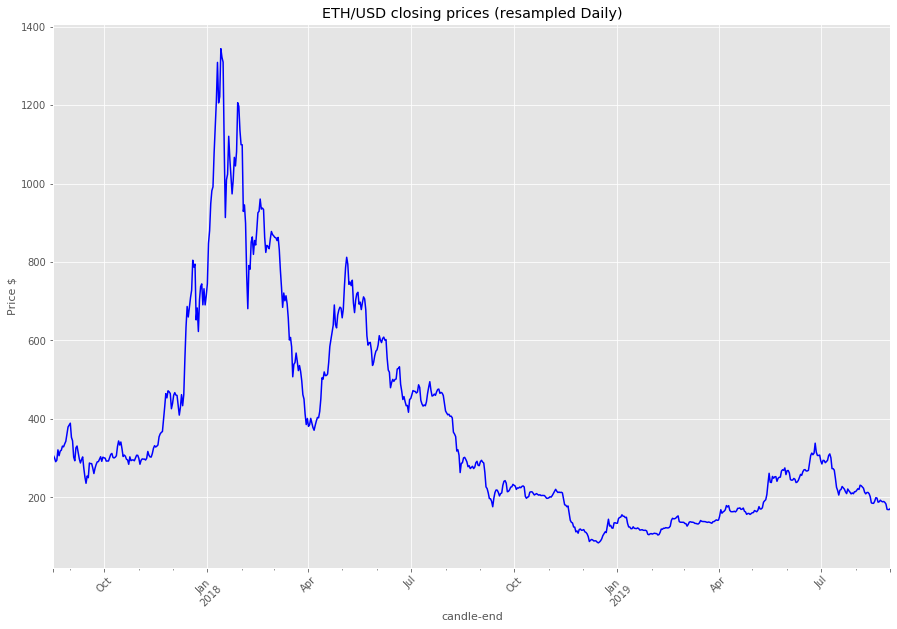

In [8]:
fig = plt.figure(figsize=(15, 10))

ax1 = fig.add_subplot()
ax1.set_xlabel(xlabel='Time', fontsize=11)
ax1.set_ylabel(ylabel='Price $', fontsize=11)

# data is in hourly resolution, so resampling it in daily format to smooth graph
eth_usdt1m['close'].resample('D').mean().plot(ax=ax1, color='blue')

plt.title('ETH/USD closing prices (resampled Daily)')

plt.xticks(rotation=45)

plt.show()

## EMA and Price Crossover Backtest on ETH / USDT

Starting Portfolio Value: 10000.00
2017-08-20T20:57:59.999001, BUY CREATE , 297.27
2017-08-20T20:58:59.998997, BUY EXECUTED, Price: 297.27, Cost: 499.41, Comm 0.50
2017-08-20T20:58:59.998997, Trade id: 1887
2017-08-21T02:27:59.998997, CLOSE LONG , 294.61 , Wait for Short
2017-08-21T02:28:59.999004, SELL EXECUTED, Price: 294.61, Cost: 499.41, Comm 0.51
2017-08-21T02:28:59.999004, OPERATION PROFIT, GROSS -44.69, NET -45.70, Acc Balance: 9954.30
2017-08-22T09:55:59.998995, SELL CREATE , 305.72
2017-08-22T09:56:59.999001, SELL EXECUTED, Price: 305.33, Cost: -497.69, Comm 0.50
2017-08-22T09:56:59.999001, Trade id: 1888
2017-08-22T10:28:59.998997, CLOSE SHORT , 311.39 , Wait for Long
2017-08-22T10:29:59.999004, BUY EXECUTED, Price: 310.38, Cost: -497.69, Comm 0.51
2017-08-22T10:29:59.999004, OPERATION PROFIT, GROSS -82.32, NET -83.32, Acc Balance: 9870.99
2017-08-22T18:04:59.998996, BUY CREATE , 312.08
2017-08-22T18:05:59.999002, BUY EXECUTED, Price: 312.08, Cost: 493.09, Comm 0.49
2017-08-2

2017-10-13T03:04:59.998996, SELL CREATE , 301.91
2017-10-13T03:05:59.999002, SELL EXECUTED, Price: 301.79, Cost: -476.83, Comm 0.48
2017-10-13T03:05:59.999002, Trade id: 1908
2017-10-13T03:15:59.998997, CLOSE SHORT , 305.22 , Wait for Long
2017-10-13T03:16:59.999003, BUY EXECUTED, Price: 302.02, Cost: -476.83, Comm 0.48
2017-10-13T03:16:59.999003, OPERATION PROFIT, GROSS -3.63, NET -4.59, Acc Balance: 9557.24
2017-10-13T05:21:59.998999, BUY CREATE , 313.83
2017-10-13T05:22:59.998995, BUY EXECUTED, Price: 313.83, Cost: 477.02, Comm 0.48
2017-10-13T05:22:59.998995, Trade id: 1909
2017-10-15T06:30:59.999004, CLOSE LONG , 337.04 , Wait for Short
2017-10-15T06:31:59.999000, SELL EXECUTED, Price: 337.71, Cost: 477.02, Comm 0.54
2017-10-15T06:31:59.999000, OPERATION PROFIT, GROSS 362.98, NET 361.96, Acc Balance: 9919.20
2017-10-15T12:20:59.998999, SELL CREATE , 323.40
2017-10-15T12:21:59.998995, SELL EXECUTED, Price: 323.38, Cost: -494.77, Comm 0.49
2017-10-15T12:21:59.998995, Trade id: 1910


2017-11-10T16:46:59.999003, SELL CREATE , 302.39
2017-11-10T16:47:59.999000, SELL EXECUTED, Price: 302.39, Cost: -474.75, Comm 0.47
2017-11-10T16:47:59.999000, Trade id: 1928
2017-11-11T10:24:59.999001, CLOSE SHORT , 305.00 , Wait for Long
2017-11-11T10:25:59.998998, BUY EXECUTED, Price: 305.00, Cost: -474.75, Comm 0.49
2017-11-11T10:25:59.998998, OPERATION PROFIT, GROSS -40.98, NET -41.94, Acc Balance: 9481.69
2017-11-11T21:54:59.998998, BUY CREATE , 313.38
2017-11-11T21:55:59.998995, BUY EXECUTED, Price: 311.30, Cost: 470.06, Comm 0.47
2017-11-11T21:55:59.998995, Trade id: 1929
2017-11-12T01:49:59.999003, CLOSE LONG , 305.11 , Wait for Short
2017-11-12T01:50:59.998999, SELL EXECUTED, Price: 305.10, Cost: 470.06, Comm 0.47
2017-11-12T01:50:59.998999, OPERATION PROFIT, GROSS -93.62, NET -94.56, Acc Balance: 9387.13
2017-11-12T03:53:59.999002, SELL CREATE , 298.55
2017-11-12T03:54:59.998998, SELL EXECUTED, Price: 298.57, Cost: -468.75, Comm 0.47
2017-11-12T03:54:59.998998, Trade id: 193

2018-01-11T07:08:59.998998, SELL CREATE , 1175.47
2018-01-11T07:09:59.998995, SELL EXECUTED, Price: 1172.55, Cost: -504.20, Comm 0.50
2018-01-11T07:09:59.998995, Trade id: 1948
2018-01-11T08:08:59.998995, CLOSE SHORT , 1249.01 , Wait for Long
2018-01-11T08:09:59.999001, BUY EXECUTED, Price: 1249.01, Cost: -504.20, Comm 0.54
2018-01-11T08:09:59.999001, OPERATION PROFIT, GROSS -328.78, NET -329.82, Acc Balance: 9819.61
2018-01-12T15:02:59.999003, BUY CREATE , 1262.00
2018-01-12T15:03:59.998999, BUY EXECUTED, Price: 1263.36, Cost: 492.71, Comm 0.49
2018-01-12T15:03:59.998999, Trade id: 1949
2018-01-12T15:51:59.998999, CLOSE LONG , 1211.01 , Wait for Short
2018-01-12T15:52:59.998995, SELL EXECUTED, Price: 1211.01, Cost: 492.71, Comm 0.47
2018-01-12T15:52:59.998995, OPERATION PROFIT, GROSS -204.16, NET -205.13, Acc Balance: 9614.48
2018-01-14T17:50:59.998996, SELL CREATE , 1294.19
2018-01-14T17:51:59.999002, SELL EXECUTED, Price: 1287.07, Cost: -476.22, Comm 0.48
2018-01-14T17:51:59.999002,

2018-02-03T11:21:59.998999, CLOSE SHORT , 960.00 , Wait for Long
2018-02-03T11:22:59.998995, BUY EXECUTED, Price: 960.00, Cost: -395.64, Comm 0.37
2018-02-03T11:22:59.998995, OPERATION PROFIT, GROSS 500.40, NET 499.64, Acc Balance: 8416.88
2018-02-07T09:22:59.999002, BUY CREATE , 792.63
2018-02-07T09:23:59.998998, BUY EXECUTED, Price: 792.63, Cost: 420.09, Comm 0.42
2018-02-07T09:23:59.998998, Trade id: 1969
2018-02-07T23:03:59.999003, CLOSE LONG , 774.94 , Wait for Short
2018-02-07T23:04:59.998999, SELL EXECUTED, Price: 774.88, Cost: 420.09, Comm 0.41
2018-02-07T23:04:59.998999, OPERATION PROFIT, GROSS -94.08, NET -94.91, Acc Balance: 8321.97
2018-02-11T04:44:59.999000, SELL CREATE , 797.00
2018-02-11T04:45:59.998997, SELL EXECUTED, Price: 797.00, Cost: -414.44, Comm 0.41
2018-02-11T04:45:59.998997, Trade id: 1970
2018-02-11T12:20:59.998999, CLOSE SHORT , 828.36 , Wait for Long
2018-02-11T12:21:59.998995, BUY EXECUTED, Price: 828.36, Cost: -414.44, Comm 0.43
2018-02-11T12:21:59.998995

2018-03-11T19:44:59.999000, BUY CREATE , 729.99
2018-03-11T19:45:59.998997, BUY EXECUTED, Price: 729.00, Cost: 437.40, Comm 0.44
2018-03-11T19:45:59.998997, Trade id: 1989
2018-03-12T14:21:59.998999, CLOSE LONG , 715.90 , Wait for Short
2018-03-12T14:22:59.998995, SELL EXECUTED, Price: 716.00, Cost: 437.40, Comm 0.44
2018-03-12T14:22:59.998995, OPERATION PROFIT, GROSS -78.00, NET -78.88, Acc Balance: 8622.80
2018-03-12T19:08:59.998998, SELL CREATE , 694.85
2018-03-12T19:09:59.998995, SELL EXECUTED, Price: 694.84, Cost: -430.80, Comm 0.43
2018-03-12T19:09:59.998995, Trade id: 1990
2018-03-13T04:13:59.999001, CLOSE SHORT , 709.99 , Wait for Long
2018-03-13T04:14:59.998997, BUY EXECUTED, Price: 709.98, Cost: -430.80, Comm 0.45
2018-03-13T04:14:59.998997, OPERATION PROFIT, GROSS -93.87, NET -94.75, Acc Balance: 8528.05
2018-03-19T23:54:59.999001, BUY CREATE , 554.12
2018-03-19T23:55:59.998998, BUY EXECUTED, Price: 554.10, Cost: 426.66, Comm 0.43
2018-03-19T23:55:59.998998, Trade id: 1991
2

2018-04-27T20:24:59.998998, CLOSE LONG , 656.23 , Wait for Short
2018-04-27T20:25:59.998995, SELL EXECUTED, Price: 655.99, Cost: 402.00, Comm 0.40
2018-04-27T20:25:59.998995, OPERATION PROFIT, GROSS -18.48, NET -19.29, Acc Balance: 7970.18
2018-04-30T22:16:59.999000, SELL CREATE , 671.99
2018-04-30T22:17:59.998996, SELL EXECUTED, Price: 671.97, Cost: -396.46, Comm 0.40
2018-04-30T22:17:59.998996, Trade id: 2010
2018-05-01T08:52:59.998999, CLOSE SHORT , 672.61 , Wait for Long
2018-05-01T08:53:59.998995, BUY EXECUTED, Price: 672.61, Cost: -396.46, Comm 0.41
2018-05-01T08:53:59.998995, OPERATION PROFIT, GROSS -3.78, NET -4.58, Acc Balance: 7965.60
2018-05-02T05:48:59.999003, BUY CREATE , 680.59
2018-05-02T05:49:59.998999, BUY EXECUTED, Price: 680.59, Cost: 401.55, Comm 0.40
2018-05-02T05:49:59.998999, Trade id: 2011
2018-05-02T13:02:59.999000, CLOSE LONG , 670.97 , Wait for Short
2018-05-02T13:03:59.998996, SELL EXECUTED, Price: 670.01, Cost: 401.55, Comm 0.40
2018-05-02T13:03:59.998996, 

2018-06-15T22:12:59.999004, SELL CREATE , 491.72
2018-06-15T22:13:59.999001, SELL EXECUTED, Price: 491.72, Cost: -442.55, Comm 0.44
2018-06-15T22:13:59.999001, Trade id: 2030
2018-06-16T05:19:59.998996, CLOSE SHORT , 496.45 , Wait for Long
2018-06-16T05:20:59.999002, BUY EXECUTED, Price: 496.65, Cost: -442.55, Comm 0.46
2018-06-16T05:20:59.999002, OPERATION PROFIT, GROSS -44.37, NET -45.27, Acc Balance: 8773.21
2018-06-16T22:50:59.998999, BUY CREATE , 500.60
2018-06-16T22:51:59.998995, BUY EXECUTED, Price: 500.60, Cost: 440.53, Comm 0.44
2018-06-16T22:51:59.998995, Trade id: 2031
2018-06-16T23:34:59.999003, CLOSE LONG , 495.97 , Wait for Short
2018-06-16T23:35:59.998999, SELL EXECUTED, Price: 495.86, Cost: 440.53, Comm 0.44
2018-06-16T23:35:59.998999, OPERATION PROFIT, GROSS -41.71, NET -42.59, Acc Balance: 8730.62
2018-06-18T01:33:59.998999, SELL CREATE , 492.42
2018-06-18T01:34:59.998996, SELL EXECUTED, Price: 492.42, Cost: -438.25, Comm 0.44
2018-06-18T01:34:59.998996, Trade id: 203

2018-07-22T23:40:59.999001, SELL CREATE , 458.14
2018-07-22T23:41:59.998998, SELL EXECUTED, Price: 458.00, Cost: -467.16, Comm 0.47
2018-07-22T23:41:59.998998, Trade id: 2052
2018-07-23T01:59:59.998997, CLOSE SHORT , 462.65 , Wait for Long
2018-07-23T02:00:59.999004, BUY EXECUTED, Price: 462.65, Cost: -467.16, Comm 0.48
2018-07-23T02:00:59.999004, OPERATION PROFIT, GROSS -47.43, NET -48.38, Acc Balance: 9311.69
2018-07-23T04:07:59.999002, BUY CREATE , 467.70
2018-07-23T04:08:59.998998, BUY EXECUTED, Price: 467.48, Cost: 467.48, Comm 0.47
2018-07-23T04:08:59.998998, Trade id: 2053
2018-07-23T08:19:59.998996, CLOSE LONG , 463.05 , Wait for Short
2018-07-23T08:20:59.999002, SELL EXECUTED, Price: 463.05, Cost: 467.48, Comm 0.46
2018-07-23T08:20:59.999002, OPERATION PROFIT, GROSS -44.30, NET -45.23, Acc Balance: 9266.46
2018-07-23T16:13:59.999001, SELL CREATE , 459.91
2018-07-23T16:14:59.998997, SELL EXECUTED, Price: 459.90, Cost: -464.50, Comm 0.46
2018-07-23T16:14:59.998997, Trade id: 205

2018-08-26T03:02:59.999003, SELL CREATE , 272.05
2018-08-26T03:03:59.998999, SELL EXECUTED, Price: 272.10, Cost: -448.97, Comm 0.45
2018-08-26T03:03:59.998999, Trade id: 2072
2018-08-26T14:12:59.999001, CLOSE SHORT , 276.00 , Wait for Long
2018-08-26T14:13:59.998997, BUY EXECUTED, Price: 276.00, Cost: -448.97, Comm 0.46
2018-08-26T14:13:59.998997, OPERATION PROFIT, GROSS -64.35, NET -65.25, Acc Balance: 8907.41
2018-08-27T11:26:59.999001, BUY CREATE , 276.25
2018-08-27T11:27:59.998997, BUY EXECUTED, Price: 276.20, Cost: 444.68, Comm 0.44
2018-08-27T11:27:59.998997, Trade id: 2073
2018-08-27T13:46:59.999003, CLOSE LONG , 275.10 , Wait for Short
2018-08-27T13:47:59.999000, SELL EXECUTED, Price: 275.12, Cost: 444.68, Comm 0.44
2018-08-27T13:47:59.999000, OPERATION PROFIT, GROSS -17.39, NET -18.28, Acc Balance: 8889.13
2018-08-30T06:54:59.998998, SELL CREATE , 283.86
2018-08-30T06:55:59.998995, SELL EXECUTED, Price: 283.89, Cost: -445.71, Comm 0.45
2018-08-30T06:55:59.998995, Trade id: 207

2018-10-07T08:56:59.999004, SELL CREATE , 223.03
2018-10-07T08:57:59.999001, SELL EXECUTED, Price: 223.04, Cost: -441.62, Comm 0.44
2018-10-07T08:57:59.999001, Trade id: 2092
2018-10-07T17:03:59.999003, CLOSE SHORT , 224.80 , Wait for Long
2018-10-07T17:04:59.998999, BUY EXECUTED, Price: 224.81, Cost: -441.62, Comm 0.45
2018-10-07T17:04:59.998999, OPERATION PROFIT, GROSS -35.05, NET -35.93, Acc Balance: 8814.66
2018-10-08T01:09:59.998995, BUY CREATE , 226.62
2018-10-08T01:10:59.999001, BUY EXECUTED, Price: 226.58, Cost: 439.57, Comm 0.44
2018-10-08T01:10:59.999001, Trade id: 2093
2018-10-08T05:33:59.998996, CLOSE LONG , 224.81 , Wait for Short
2018-10-08T05:34:59.999003, SELL EXECUTED, Price: 224.82, Cost: 439.57, Comm 0.44
2018-10-08T05:34:59.999003, OPERATION PROFIT, GROSS -34.14, NET -35.02, Acc Balance: 8779.64
2018-10-10T05:01:59.999000, SELL CREATE , 225.32
2018-10-10T05:02:59.998996, SELL EXECUTED, Price: 225.34, Cost: -439.41, Comm 0.44
2018-10-10T05:02:59.998996, Trade id: 209

2018-11-03T17:22:59.998995, SELL CREATE , 199.91
2018-11-03T17:23:59.999002, SELL EXECUTED, Price: 199.90, Cost: -425.79, Comm 0.43
2018-11-03T17:23:59.999002, Trade id: 2112
2018-11-03T20:07:59.998999, CLOSE SHORT , 200.64 , Wait for Long
2018-11-03T20:08:59.998995, BUY EXECUTED, Price: 200.64, Cost: -425.79, Comm 0.43
2018-11-03T20:08:59.998995, OPERATION PROFIT, GROSS -15.76, NET -16.62, Acc Balance: 8505.53
2018-11-04T08:39:59.998995, BUY CREATE , 201.64
2018-11-04T08:40:59.999001, BUY EXECUTED, Price: 201.63, Cost: 425.44, Comm 0.43
2018-11-04T08:40:59.999001, Trade id: 2113
2018-11-08T02:40:59.999001, CLOSE LONG , 217.38 , Wait for Short
2018-11-08T02:41:59.998998, SELL EXECUTED, Price: 217.38, Cost: 425.44, Comm 0.51
2018-11-08T02:41:59.998998, OPERATION PROFIT, GROSS 332.32, NET 331.39, Acc Balance: 8836.92
2018-11-08T16:03:59.998996, SELL CREATE , 213.24
2018-11-08T16:04:59.999003, SELL EXECUTED, Price: 213.25, Cost: -441.43, Comm 0.44
2018-11-08T16:04:59.999003, Trade id: 211

2018-12-19T21:52:59.998995, CLOSE LONG , 98.14 , Wait for Short
2018-12-19T21:53:59.999002, SELL EXECUTED, Price: 98.10, Cost: 424.38, Comm 0.51
2018-12-19T21:53:59.999002, OPERATION PROFIT, GROSS 621.98, NET 621.05, Acc Balance: 9100.27
2018-12-22T08:29:59.999000, SELL CREATE , 107.78
2018-12-22T08:30:59.998997, SELL EXECUTED, Price: 107.77, Cost: -454.79, Comm 0.45
2018-12-22T08:30:59.998997, Trade id: 2136
2018-12-22T09:13:59.999004, CLOSE SHORT , 108.14 , Wait for Long
2018-12-22T09:14:59.999000, BUY EXECUTED, Price: 108.15, Cost: -454.79, Comm 0.46
2018-12-22T09:14:59.999000, OPERATION PROFIT, GROSS -16.04, NET -16.95, Acc Balance: 9083.32
2018-12-22T09:30:59.999004, BUY CREATE , 111.21
2018-12-22T09:31:59.999000, BUY EXECUTED, Price: 111.31, Cost: 454.14, Comm 0.45
2018-12-22T09:31:59.999000, Trade id: 2137
2018-12-22T16:32:59.999003, CLOSE LONG , 108.62 , Wait for Short
2018-12-22T16:33:59.998999, SELL EXECUTED, Price: 108.67, Cost: 454.14, Comm 0.44
2018-12-22T16:33:59.998999, 

2019-01-31T09:31:59.999000, CLOSE LONG , 107.15 , Wait for Short
2019-01-31T09:32:59.998996, SELL EXECUTED, Price: 107.15, Cost: 407.44, Comm 0.41
2019-01-31T09:32:59.998996, OPERATION PROFIT, GROSS -56.25, NET -57.07, Acc Balance: 8105.02
2019-01-31T18:22:59.999002, SELL CREATE , 106.01
2019-01-31T18:23:59.998998, SELL EXECUTED, Price: 106.00, Cost: -404.92, Comm 0.40
2019-01-31T18:23:59.998998, Trade id: 2156
2019-01-31T22:20:59.998996, CLOSE SHORT , 107.09 , Wait for Long
2019-01-31T22:21:59.999002, BUY EXECUTED, Price: 107.08, Cost: -404.92, Comm 0.41
2019-01-31T22:21:59.999002, OPERATION PROFIT, GROSS -41.26, NET -42.07, Acc Balance: 8062.95
2019-02-01T21:34:59.998999, BUY CREATE , 106.99
2019-02-01T21:35:59.998996, BUY EXECUTED, Price: 107.00, Cost: 403.39, Comm 0.40
2019-02-01T21:35:59.998996, Trade id: 2157
2019-02-02T05:15:59.999000, CLOSE LONG , 106.64 , Wait for Short
2019-02-02T05:16:59.998997, SELL EXECUTED, Price: 106.64, Cost: 403.39, Comm 0.41
2019-02-02T05:16:59.998997

2019-03-17T00:17:59.999000, CLOSE LONG , 138.08 , Wait for Short
2019-03-17T00:18:59.998996, SELL EXECUTED, Price: 138.01, Cost: 433.36, Comm 0.47
2019-03-17T00:18:59.998996, OPERATION PROFIT, GROSS 151.77, NET 150.87, Acc Balance: 8807.75
2019-03-18T11:07:59.998999, SELL CREATE , 137.07
2019-03-18T11:08:59.998995, SELL EXECUTED, Price: 137.07, Cost: -439.99, Comm 0.44
2019-03-18T11:08:59.998995, Trade id: 2176
2019-03-19T00:32:59.998996, CLOSE SHORT , 138.43 , Wait for Long
2019-03-19T00:33:59.999003, BUY EXECUTED, Price: 138.42, Cost: -439.99, Comm 0.46
2019-03-19T00:33:59.999003, OPERATION PROFIT, GROSS -43.33, NET -44.23, Acc Balance: 8763.52
2019-03-20T16:18:59.999003, BUY CREATE , 138.47
2019-03-20T16:19:59.998999, BUY EXECUTED, Price: 138.43, Cost: 437.44, Comm 0.44
2019-03-20T16:19:59.998999, Trade id: 2177
2019-03-20T16:22:59.998999, CLOSE LONG , 137.97 , Wait for Short
2019-03-20T16:23:59.998995, SELL EXECUTED, Price: 137.98, Cost: 437.44, Comm 0.44
2019-03-20T16:23:59.998995

2019-04-27T23:46:59.999000, CLOSE LONG , 158.86 , Wait for Short
2019-04-27T23:47:59.998996, SELL EXECUTED, Price: 158.86, Cost: 447.94, Comm 0.44
2019-04-27T23:47:59.998996, OPERATION PROFIT, GROSS -63.11, NET -64.00, Acc Balance: 8886.47
2019-04-28T18:17:59.999000, SELL CREATE , 158.27
2019-04-28T18:18:59.998996, SELL EXECUTED, Price: 158.27, Cost: -444.74, Comm 0.44
2019-04-28T18:18:59.998996, Trade id: 2196
2019-04-29T04:32:59.999003, CLOSE SHORT , 158.79 , Wait for Long
2019-04-29T04:33:59.998999, BUY EXECUTED, Price: 158.73, Cost: -444.74, Comm 0.46
2019-04-29T04:33:59.998999, OPERATION PROFIT, GROSS -12.93, NET -13.83, Acc Balance: 8872.64
2019-04-30T12:48:59.998999, BUY CREATE , 159.33
2019-04-30T12:49:59.998996, BUY EXECUTED, Price: 159.33, Cost: 442.94, Comm 0.44
2019-04-30T12:49:59.998996, Trade id: 2197
2019-05-01T19:07:59.999002, CLOSE LONG , 159.42 , Wait for Short
2019-05-01T19:08:59.998998, SELL EXECUTED, Price: 159.38, Cost: 442.94, Comm 0.46
2019-05-01T19:08:59.998998

2019-06-08T16:50:59.998999, SELL CREATE , 242.57
2019-06-08T16:51:59.998995, SELL EXECUTED, Price: 242.54, Cost: -412.32, Comm 0.41
2019-06-08T16:51:59.998995, Trade id: 2216
2019-06-10T11:16:59.998997, CLOSE SHORT , 237.78 , Wait for Long
2019-06-10T11:17:59.999003, BUY EXECUTED, Price: 237.78, Cost: -412.32, Comm 0.43
2019-06-10T11:17:59.999003, OPERATION PROFIT, GROSS 80.92, NET 80.08, Acc Balance: 8312.79
2019-06-10T18:10:59.998995, BUY CREATE , 241.97
2019-06-10T18:11:59.999001, BUY EXECUTED, Price: 242.00, Cost: 416.24, Comm 0.42
2019-06-10T18:11:59.999001, Trade id: 2217
2019-06-11T10:14:59.998997, CLOSE LONG , 240.86 , Wait for Short
2019-06-11T10:15:59.999004, SELL EXECUTED, Price: 240.86, Cost: 416.24, Comm 0.43
2019-06-11T10:15:59.999004, OPERATION PROFIT, GROSS -19.61, NET -20.45, Acc Balance: 8292.34
2019-06-18T12:30:59.999004, SELL CREATE , 266.02
2019-06-18T12:31:59.999000, SELL EXECUTED, Price: 265.99, Cost: -414.94, Comm 0.41
2019-06-18T12:31:59.999000, Trade id: 2218


2019-07-26T18:57:59.998997, BUY CREATE , 219.63
2019-07-26T18:58:59.999004, BUY EXECUTED, Price: 219.50, Cost: 419.25, Comm 0.42
2019-07-26T18:58:59.999004, Trade id: 2237
2019-07-26T21:16:59.999003, CLOSE LONG , 217.06 , Wait for Short
2019-07-26T21:17:59.999000, SELL EXECUTED, Price: 217.05, Cost: 419.25, Comm 0.41
2019-07-26T21:17:59.999000, OPERATION PROFIT, GROSS -46.79, NET -47.63, Acc Balance: 8355.96
2019-07-27T12:00:59.999000, SELL CREATE , 207.28
2019-07-27T12:01:59.998997, SELL EXECUTED, Price: 207.23, Cost: -418.60, Comm 0.42
2019-07-27T12:01:59.998997, Trade id: 2238
2019-07-28T23:32:59.999000, CLOSE SHORT , 212.31 , Wait for Long
2019-07-28T23:33:59.998996, BUY EXECUTED, Price: 212.32, Cost: -418.60, Comm 0.44
2019-07-28T23:33:59.998996, OPERATION PROFIT, GROSS -102.82, NET -103.68, Acc Balance: 8252.28
2019-07-30T19:52:59.999002, BUY CREATE , 210.68
2019-07-30T19:53:59.998998, BUY EXECUTED, Price: 210.68, Cost: 412.93, Comm 0.41
2019-07-30T19:53:59.998998, Trade id: 2239

<IPython.core.display.Javascript object>


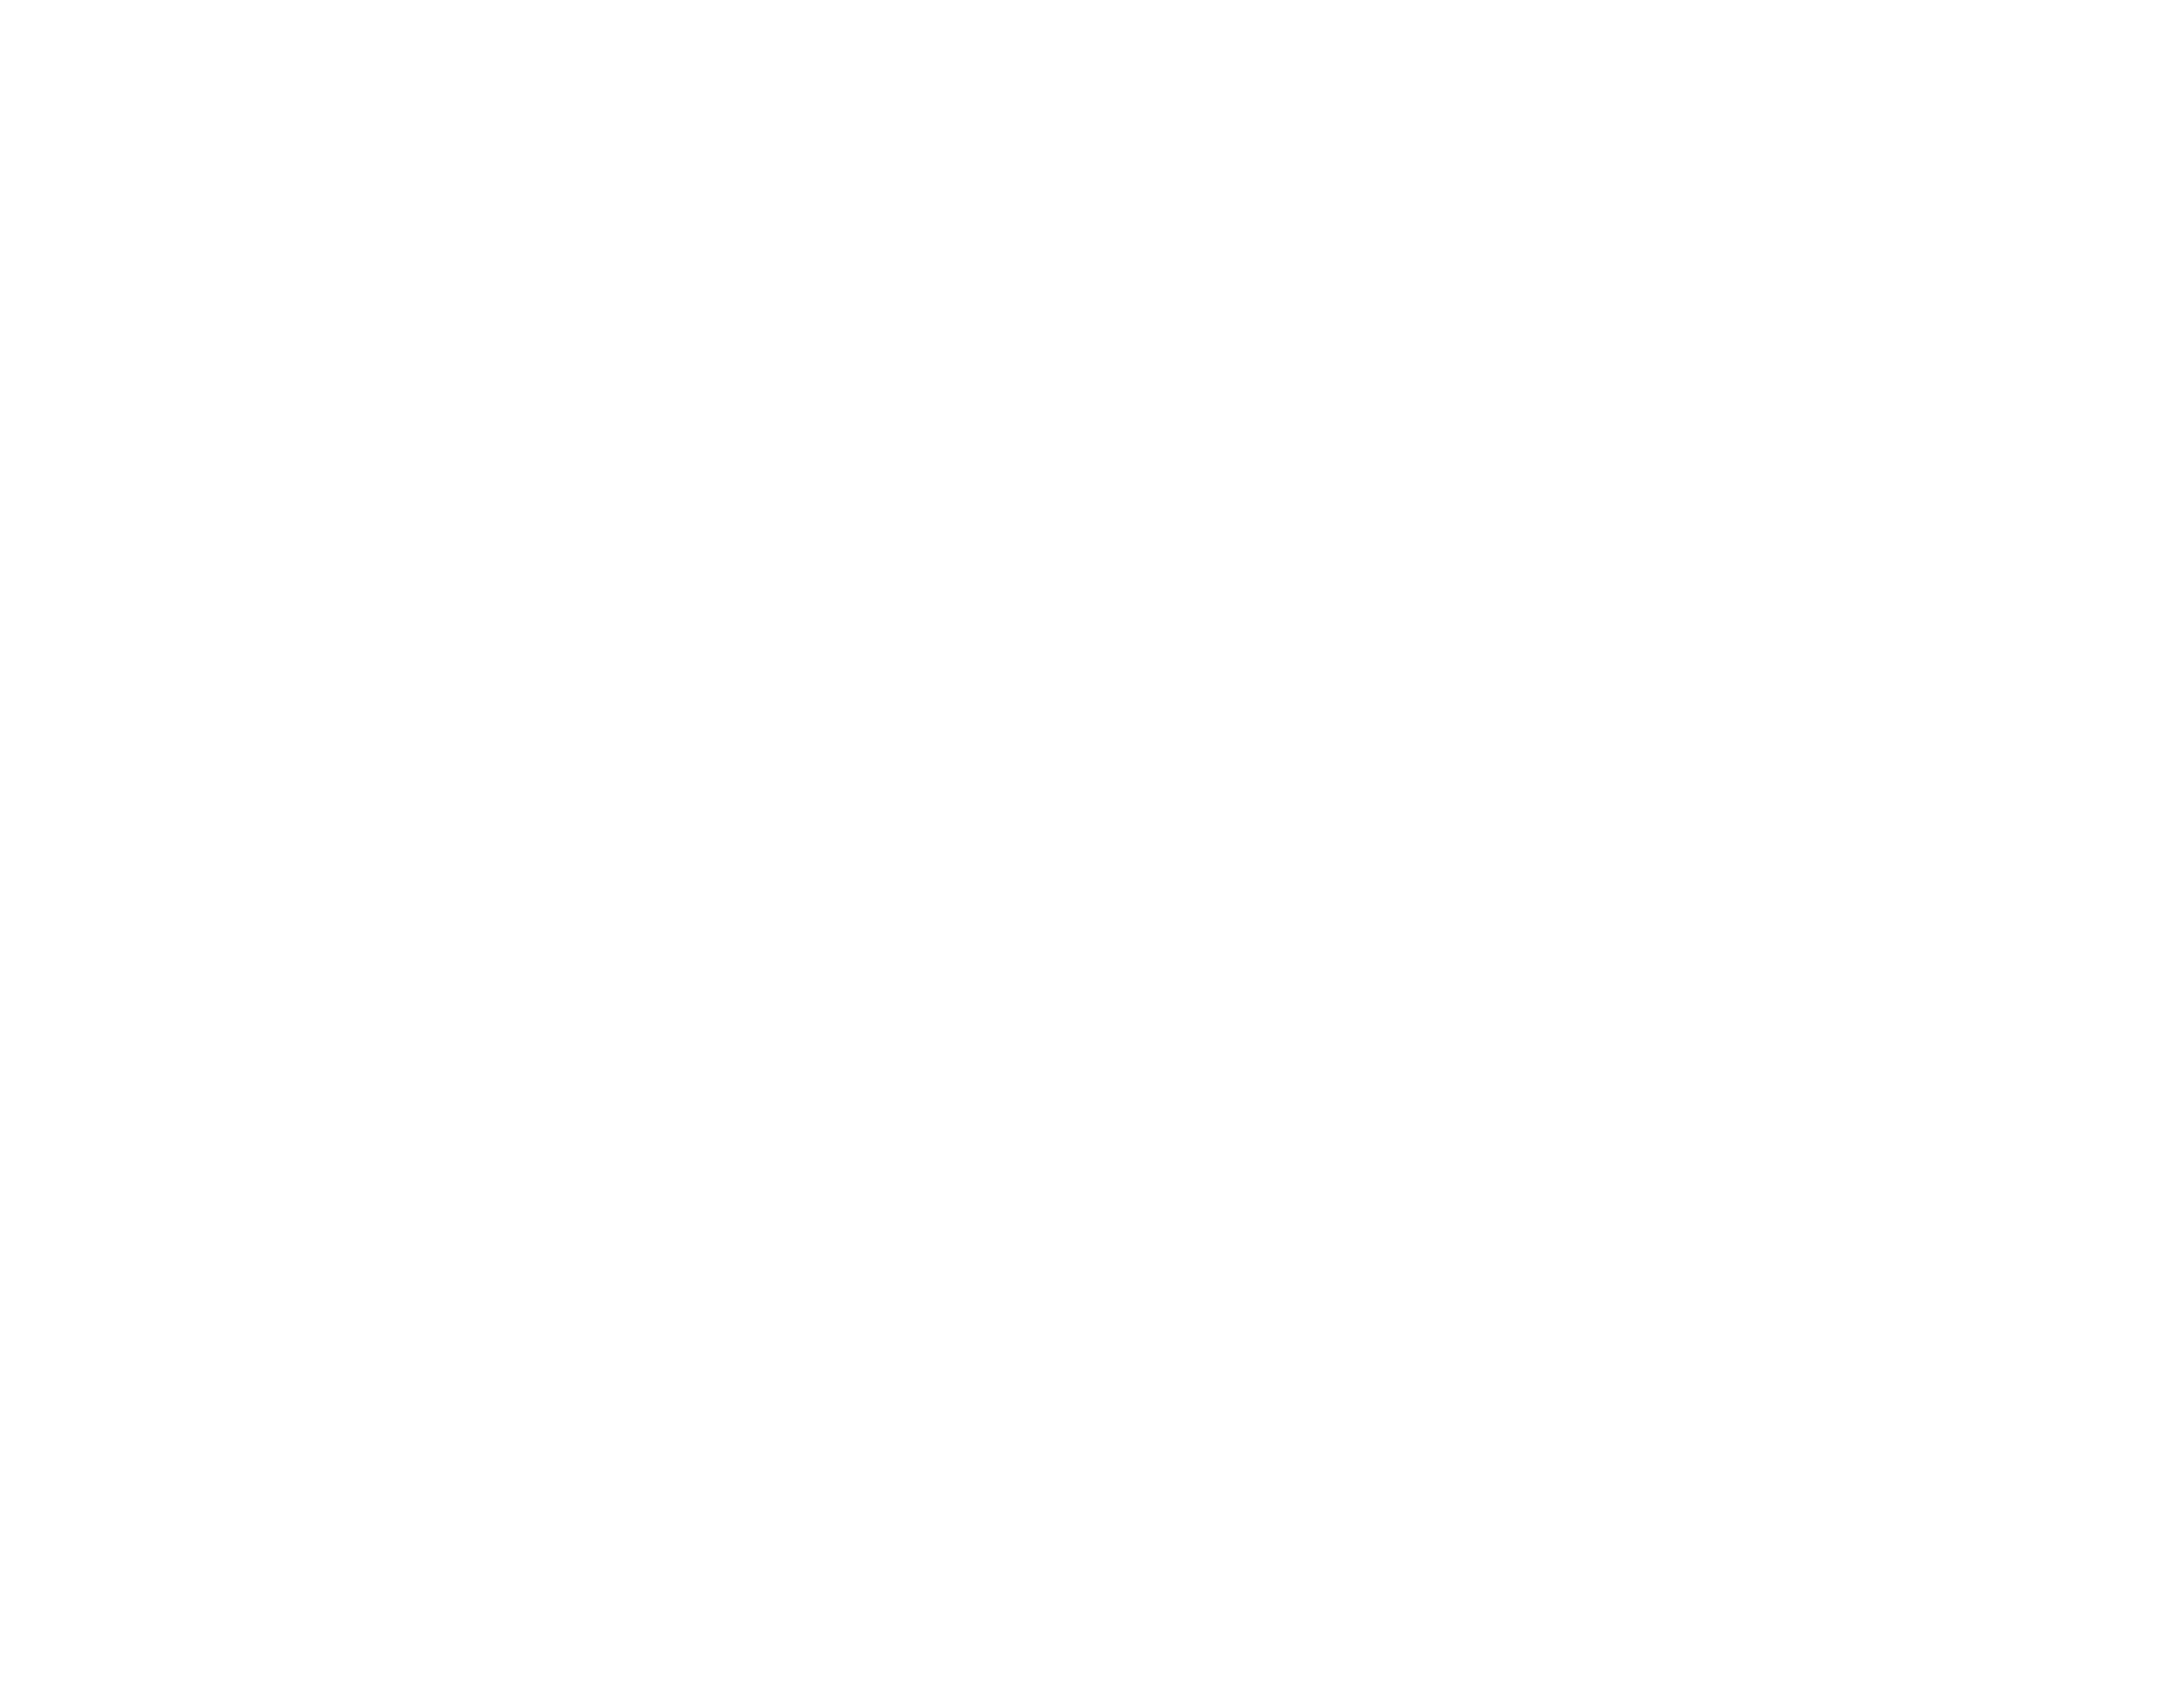

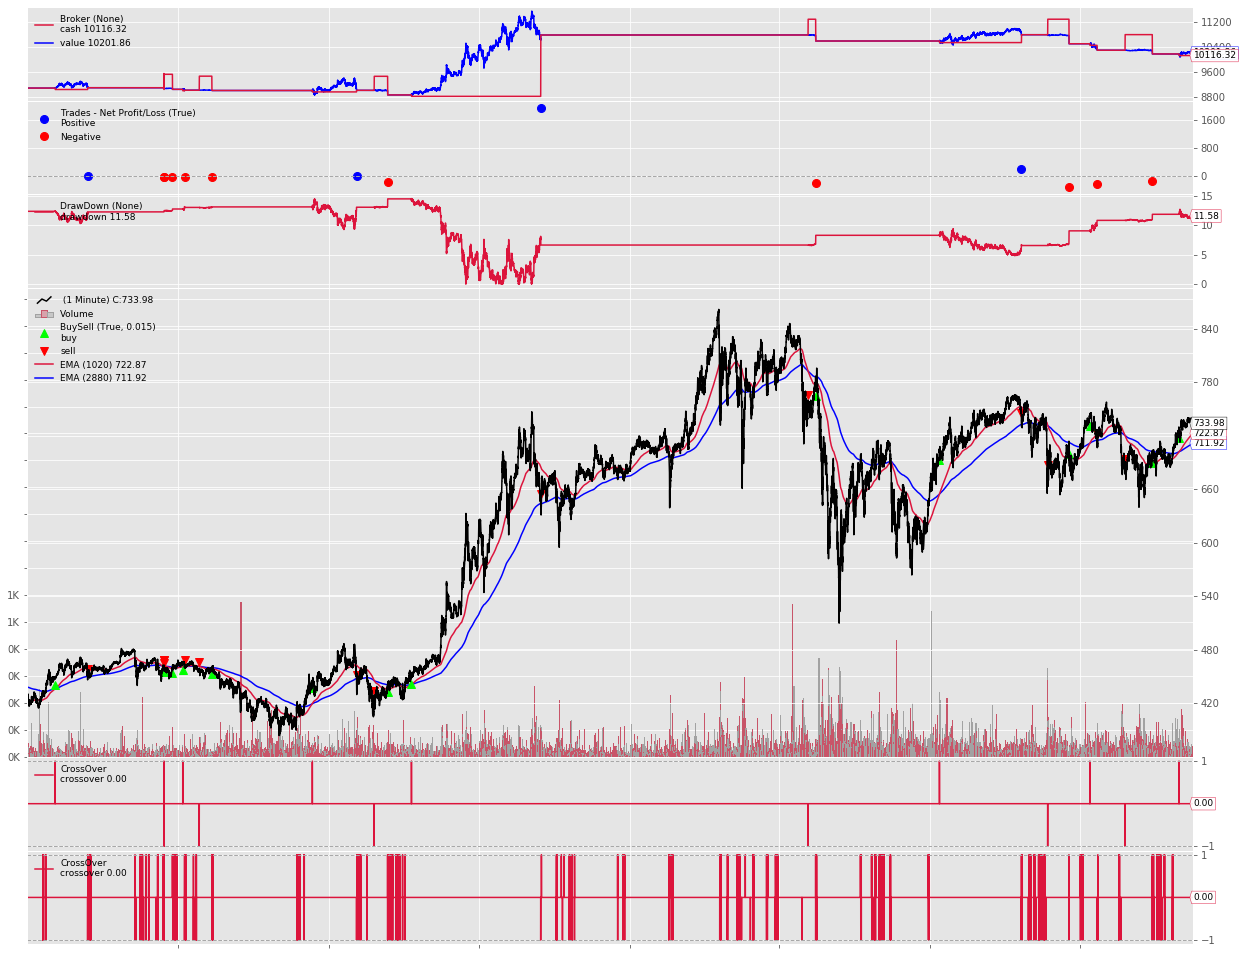

In [32]:
# EMA AND Price Crossover

# Create a Stratey
class TestStrategy(bt.Strategy):
    params = (
        ('short_ema', 1020),
        ('long_ema', 2880),
        ('mult', 10),  # multiply profits and loses (margin trading)
        ('lever', 10),
        ('printlog', True),
        ('trailstoppct', 0.05),  # trailstop order trail 0.05 = 5%
    )
    


    def log(self, txt, dt=None, doprint=False):
        ''' Logging function fot this strategy'''
        if self.params.printlog or doprint:
            dt = dt or self.data.datetime[0]
            dt = bt.num2date(dt)
            print('%s, %s' % (dt.isoformat(), txt))


    def __init__(self):
        # Keep a reference to the "close" line in the data[0] dataseries
        self.dataclose = self.datas[0].close

        # To keep track of pending orders and buy price/commission
        self.order = None
        self.buyprice = None
        self.buycomm = None

        # Add exponential moving averages
        ema_short = bt.ind.EMA(period=self.params.short_ema)
        ema_long = bt.ind.EMA(period=self.params.long_ema)
        
        self.crossover = bt.ind.CrossOver(ema_short, ema_long)
        self.pricecrossover = bt.ind.CrossOver(self.datas[0].close, ema_long)
        
        self.wait_to_enter = ''


    def next(self):
        
        # Simply log the closing price of the series from the reference
        # self.log('Close, %.2f' % self.dataclose[0])
        
        # if an order is active, no new orders are allowed
        if self.order:
            return   
        
        # if position is not opened
        if not self.position:
            
            # if signal is go long - cross upwards
            if self.crossover > 0:
                
                # if we are waiting for a Short signal
                if self.wait_to_enter == 'wait_for_short':
                    return
                
                else: # BUY BUY BUY
                    self.log('BUY CREATE , %.2f' % self.dataclose[0])
                    self.wait_to_enter = ''
                    # to make orders at 5% of portfolio value, no more than 500$
                    self.order = self.buy(size=round(min((cerebro.broker.getvalue()*0.05),
                                                         500) / self.dataclose[0], 2))
                            # exectype=bt.Order.StopTrail, trailpercent=self.params.trailstoppct)
            
            # if signal is go short - cross downwards
            elif self.crossover < 0:
                
                # if we are waiting for a Long signal
                if self.wait_to_enter == 'wait_for_long':
                    return

                else:  # SELL SELL SELL
                    self.log('SELL CREATE , %.2f' % self.dataclose[0])
                    self.wait_to_enter = ''
                    # to make orders at 5% of portfolio value, no more than 500$
                    self.order = self.sell(size=round(min((cerebro.broker.getvalue()*0.05),
                                             500) / self.dataclose[0], 2))
                             # exectype=bt.Order.StopTrail, trailpercent=self.params.trailstoppct)
        
        # if we are in the market:
        elif self.position:
            # if price signals close short == -1
            if self.pricecrossover > 0:
                self.log('CLOSE SHORT , %.2f , Wait for Long' % self.dataclose[0])
                self.wait_to_enter = 'wait_for_long'
                self.order = self.close()
            
            # if price signals close long == 1
            elif self.pricecrossover < 0:
                self.log('CLOSE LONG , %.2f , Wait for Short' % self.dataclose[0])
                self.wait_to_enter = 'wait_for_short'
                self.order = self.close()
                
                
    def notify_order(self, order):
        if order.status in [order.Submitted, order.Accepted]:
            # Buy/Sell order submitted/accepted to/by broker - Nothing to do
            return

        # Check if an order has been completed
        # Attention: broker could reject order if not enough cash
        if order.status in [order.Completed]:
            
            if order.isbuy():
                self.log('BUY EXECUTED, Price: %.2f, Cost: %.2f, Comm %.2f' %
                         (order.executed.price,
                          order.executed.value,
                          order.executed.comm)
                         )

                self.buyprice = order.executed.price
                self.buycomm = order.executed.comm
            
            elif order.issell():
                self.log('SELL EXECUTED, Price: %.2f, Cost: %.2f, Comm %.2f' %
                         (order.executed.price,
                          order.executed.value,
                          order.executed.comm)
                        )

            self.bar_executed = len(self)

        elif order.status in [order.Canceled, order.Margin, order.Rejected]:
            self.log('Order Canceled/Margin/Rejected', doprint=True)

        # Write down: no pending order
        self.order = None


    def notify_trade(self, trade):
        if trade.isopen:
            self.log('Trade id: {}'.format(trade.ref))
        
        elif trade.isclosed:
            self.log('OPERATION PROFIT, GROSS %.2f, NET %.2f, Acc Balance: %.2f' %
                 (trade.pnl, trade.pnlcomm, cerebro.broker.getvalue()))
        
        elif trade.justopened:
            self.log('TRADE OPENED, SIZE: %2d , VAL: %.2f' % (trade.size, trade.value))


if __name__ == '__main__':
    # Create a cerebro entity
    cerebro = bt.Cerebro()
    
    # Add a strategy
    cerebro.addstrategy(TestStrategy)
    
    # timeframe and compression tells the system we have hourly data
    data = bt.feeds.PandasData(dataname=eth_usdt1m,
                               timeframe=bt.TimeFrame.Minutes,
                               compression=1)

    # Add the Data Feed to Cerebro
    cerebro.adddata(data)

    # Set our desired cash start
    cerebro.broker.setcash(10000.0)  # 10,000

    # Set the commission
    cerebro.broker.setcommission(commission=0.001,  # 0.1% binance commission
                                 mult=TestStrategy.params.mult,
                                 interest=0.01,  # long/short interest 0.01 -> 1%
                                 leverage=TestStrategy.params.lever,
                                 interest_long=True
                                 )
    
    print("Starting Portfolio Value: %.2f" % cerebro.broker.getvalue())

    # Create Analyzers
    # RF = 1%, 
    
    cerebro.addanalyzer(bt.analyzers.SharpeRatio_A, _name='mysharpe')
    cerebro.addanalyzer(bt.analyzers.DrawDown, _name='mydrawdown')
    cerebro.addanalyzer(bt.analyzers.Returns, _name='returns')
    cerebro.addanalyzer(bt.analyzers.TradeAnalyzer, _name='mytradeanal')
    cerebro.addanalyzer(bt.analyzers.BasicTradeStats , _name='tradestats')
    cerebro.addanalyzer(bt.analyzers.AnnualReturn, _name='annreturn')
    cerebro.addanalyzer(bt.analyzers.TimeReturn,
                        timeframe=bt.TimeFrame.Years,
                        _name='timereturn')
    cerebro.addanalyzer(bt.analyzers.SQN, _name='sqn')
    cerebro.addanalyzer(bt.analyzers.Transactions, _name='transactions')
    
    # Create Observers
    cerebro.addobserver(bt.observers.DrawDown)

    # Run over everything
    thestrats = cerebro.run()
    thestrat = thestrats[0]
    
    transaction_df = thestrat.analyzers.transactions.get_analysis()
    
    # Print Analyzers
    print()
    print('Annual Return:', thestrat.analyzers.annreturn.get_analysis())
    print()
    print('TimeReturn: ', thestrat.analyzers.timereturn.get_analysis())
    print()
    print('SQN: ', thestrat.analyzers.sqn.get_analysis())
    print()
    print("Final Portfolio Value: %.2f" % cerebro.broker.getvalue())
    print()
    print('Annualised SharpeR:', thestrat.analyzers.mysharpe.get_analysis()['sharperatio'])
    print()
    # CAGR = (end bal / beg bal) ^ 1/n of years - 1
    print('CAGR % ', ((cerebro.broker.getvalue() / 10000) ** 0.5 - 1) * 100)
    print()
    printTradeAnalysis(thestrat.analyzers.mytradeanal.get_analysis())
    print()
    printDrawDown(thestrat.analyzers.mydrawdown.get_analysis())
    print()
    pprint.pprint(dict(thestrat.analyzers.tradestats.get_analysis()))
    
    # to plot part of the data
    cerebro.plot(start=datetime.date(2017, 12, 1), end=datetime.date(2018, 1, 1), 
                 plotname='ETH/USDT 1h EMA and Price Crossover, 2017_08-2019_08',
                 savefig=True)
    
    # cerebro.plot()  # plot backtest

##  Optimise parameters for EMA and Price Crossover

Short EMA (15-20), Long EMA (45-50)

In [9]:
# Parameter optimisation for EMA and Price Crossover

# Create a Stratey
class TestStrategy(bt.Strategy):
    params = (
        ('short_ema', 17),
        ('long_ema', 48),
        ('mult', 10),
        ('lever', 10),
        ('printlog', False),
        ('trailstoppct', 0.05),  # trailstop order trail 0.05 = 5%
    )


    def log(self, txt, dt=None, doprint=False):
        ''' Logging function fot this strategy'''
        if self.params.printlog or doprint:
            dt = dt or self.data.datetime[0]
            dt = bt.num2date(dt)
            print('%s, %s' % (dt.isoformat(), txt))


    def __init__(self):
        # Keep a reference to the "close" line in the data[0] dataseries
        self.dataclose = self.datas[0].close

        # To keep track of pending orders and buy price/commission
        self.order = None
        self.buyprice = None
        self.buycomm = None

        # Add exponential moving averages
        ema_short = bt.ind.EMA(period=self.params.short_ema)
        ema_long = bt.ind.EMA(period=self.params.long_ema)
        
        self.crossover = bt.ind.CrossOver(ema_short, ema_long)
        self.pricecrossover = bt.ind.CrossOver(self.datas[0].close, ema_long)
        
        self.wait_to_enter = ''


    def next(self):
        
        # Simply log the closing price of the series from the reference
        # self.log('Close, %.2f' % self.dataclose[0])
        
        # if an order is active, no new orders are allowed
        if self.order:
            return   
        
        # if position is not opened
        if not self.position:
            
            # if signal is go long - cross upwards
            if self.crossover > 0:
                
                # if we are waiting for a Short signal
                if self.wait_to_enter == 'wait_for_short':
                    return
                
                else: # BUY BUY BUY
                    self.log('BUY CREATE , %.2f' % self.dataclose[0])
                    self.wait_to_enter = ''
                    # to make orders at 5% of portfolio value, no more than 500$
                    self.order = self.buy(size=round(min((cerebro.broker.getvalue()*0.05),
                                                         500) / self.dataclose[0], 2))
                            # exectype=bt.Order.StopTrail, trailpercent=self.params.trailstoppct)
            
            # if signal is go short - cross downwards
            elif self.crossover < 0:
                
                # if we are waiting for a Long signal
                if self.wait_to_enter == 'wait_for_long':
                    return

                else:  # SELL SELL SELL
                    self.log('SELL CREATE , %.2f' % self.dataclose[0])
                    self.wait_to_enter = ''
                    # to make orders at 5% of portfolio value, no more than 500$
                    self.order = self.sell(size=round(min((cerebro.broker.getvalue()*0.05),
                                             500) / self.dataclose[0], 2))
                             # exectype=bt.Order.StopTrail, trailpercent=self.params.trailstoppct)
        
        # if we are in the market:
        elif self.position:
            # if price signals close short == -1
            if self.pricecrossover > 0:
                self.log('CLOSE SHORT , %.2f , Wait for Long' % self.dataclose[0])
                self.wait_to_enter = 'wait_for_long'
                self.order = self.close()
            
            # if price signals close long == 1
            elif self.pricecrossover < 0:
                self.log('CLOSE LONG , %.2f , Wait for Short' % self.dataclose[0])
                self.wait_to_enter = 'wait_for_short'
                self.order = self.close()


    def notify_order(self, order):
        if order.status in [order.Submitted, order.Accepted]:
            # Buy/Sell order submitted/accepted to/by broker - Nothing to do
            return

        # Check if an order has been completed
        # Attention: broker could reject order if not enough cash
        if order.status in [order.Completed]:
            
            if order.isbuy():
                self.log('BUY EXECUTED, Price: %.2f, Cost: %.2f, Comm %.2f' %
                         (order.executed.price,
                          order.executed.value,
                          order.executed.comm)
                         )

                self.buyprice = order.executed.price
                self.buycomm = order.executed.comm
            
            elif order.issell():
                self.log('SELL EXECUTED, Price: %.2f, Cost: %.2f, Comm %.2f' %
                         (order.executed.price,
                          order.executed.value,
                          order.executed.comm)
                        )

            self.bar_executed = len(self)

        elif order.status in [order.Canceled, order.Margin, order.Rejected]:
            self.log('Order Canceled/Margin/Rejected', doprint=True)

        # Write down: no pending order
        self.order = None


    def notify_trade(self, trade):
        if trade.isclosed:
            self.log('OPERATION PROFIT, GROSS %.2f, NET %.2f, Acc Balance: %.2f' %
                 (trade.pnl, trade.pnlcomm, cerebro.broker.getvalue()))
        
        elif trade.justopened:
            self.log('TRADE OPENED, SIZE: %2d , VAL: %.2f' % (trade.size, trade.value))
    
    
#     UNCOMMENT TO OPTIMISE
    def stop(self):
        self.log('(Short EMA %2d), (Long EMA: %2d) Ending Value %.2f' %
                 (self.params.short_ema, self.params.long_ema, self.broker.getvalue()),
                 doprint=True)


if __name__ == '__main__':
    # Create a cerebro entity
    cerebro = bt.Cerebro()
    
    # Add a strategy
    strats = cerebro.optstrategy(
        TestStrategy,
        short_ema=range(15, 21),
        long_ema=range(45, 51))
    
    # timeframe and compression tells the system we have hourly data
    data = bt.feeds.PandasData(dataname=eth_usdt1h,
                               timeframe=bt.TimeFrame.Minutes,
                               compression=60)

    # Add the Data Feed to Cerebro
    cerebro.adddata(data)

    # Set our desired cash start
    cerebro.broker.setcash(10000.0)  # 10,000

    # Add a Percentage sizer - set to 5% of portfolio value
    # cerebro.addsizer(bt.sizers.PercentSizer, percents=5)
    # cerebro.addsizer(bt.sizers.FixedSize)

    # Set the commission
    cerebro.broker.setcommission(commission=0.001,  # 0.1% binance commission
                                 mult=TestStrategy.params.mult,
                                 interest=0.01,  # long/short interest 0.01 -> 1%
                                 leverage=TestStrategy.params.lever,
                                 interest_long=True
                                 )
    
    print("Starting Portfolio Value: %.2f" % cerebro.broker.getvalue())

    # Run over everything
    thestrats = cerebro.run(maxcpus=2)  # OPTIMIZE
    thestrat = thestrats[0]


Starting Portfolio Value: 10000.00
2019-08-21T14:59:59.999004, (Short EMA 15), (Long EMA: 45) Ending Value 9872.66
2019-08-21T14:59:59.999004, (Short EMA 15), (Long EMA: 46) Ending Value 9567.88
2019-08-21T14:59:59.999004, (Short EMA 15), (Long EMA: 47) Ending Value 9007.81
2019-08-21T14:59:59.999004, (Short EMA 15), (Long EMA: 48) Ending Value 8207.05
2019-08-21T14:59:59.999004, (Short EMA 15), (Long EMA: 49) Ending Value 9363.25
2019-08-21T14:59:59.999004, (Short EMA 15), (Long EMA: 50) Ending Value 9524.91
2019-08-21T14:59:59.999004, (Short EMA 16), (Long EMA: 45) Ending Value 7182.83
2019-08-21T14:59:59.999004, (Short EMA 16), (Long EMA: 46) Ending Value 7852.83
2019-08-21T14:59:59.999004, (Short EMA 16), (Long EMA: 48) Ending Value 9659.98
2019-08-21T14:59:59.999004, (Short EMA 16), (Long EMA: 47) Ending Value 8667.83
2019-08-21T14:59:59.999004, (Short EMA 16), (Long EMA: 49) Ending Value 8625.97
2019-08-21T14:59:59.999004, (Short EMA 16), (Long EMA: 50) Ending Value 9899.39
2019-

Parameter optimisation didn't improve returns, larger ranges could be tried

## Simple EMA crossover strategy for Ether

Starting Portfolio Value: 10000.00
2017-08-20T19:59:59.998997, BUY CREATE , 297.88
2017-08-20T20:59:59.999004, BUY EXECUTED, Price: 297.87, Cost: 500.42, Comm 0.50
2017-08-20T20:59:59.999004, TRADE OPENED, SIZE:  1 , VAL: 500.42
2017-08-22T05:59:59.999004, CLOSE LONG , 279.96
2017-08-22T05:59:59.999004, SELL CREATE , 279.96
2017-08-22T06:59:59.999000, SELL EXECUTED, Price: 302.99, Cost: 500.42, Comm 0.54
2017-08-22T06:59:59.999000, SELL EXECUTED, Price: 302.99, Cost: -527.20, Comm 0.53
2017-08-22T06:59:59.999000, OPERATION PROFIT, GROSS 86.02, NET 84.98, Acc Balance: 10080.31
2017-08-22T06:59:59.999000, TRADE OPENED, SIZE: -1 , VAL: -527.20
2017-08-22T17:59:59.999004, CLOSE SHORT , 312.07
2017-08-22T17:59:59.999004, BUY CREATE , 312.07
2017-08-22T18:59:59.999000, BUY EXECUTED, Price: 313.99, Cost: -527.20, Comm 0.55
2017-08-22T18:59:59.999000, BUY EXECUTED, Price: 313.99, Cost: 502.38, Comm 0.50
2017-08-22T18:59:59.999000, OPERATION PROFIT, GROSS -191.40, NET -192.47, Acc Balance: 9845

2017-11-05T19:59:59.998997, CLOSE LONG , 294.17
2017-11-05T19:59:59.998997, SELL CREATE , 294.17
2017-11-05T20:59:59.999004, SELL EXECUTED, Price: 294.07, Cost: 440.42, Comm 0.46
2017-11-05T20:59:59.999004, SELL EXECUTED, Price: 294.07, Cost: -441.11, Comm 0.44
2017-11-05T20:59:59.999004, OPERATION PROFIT, GROSS -51.95, NET -52.85, Acc Balance: 8820.09
2017-11-05T20:59:59.999004, TRADE OPENED, SIZE: -1 , VAL: -441.11
2017-11-06T12:59:59.999000, CLOSE SHORT , 301.06
2017-11-06T12:59:59.999000, BUY CREATE , 301.06
2017-11-06T13:59:59.998997, BUY EXECUTED, Price: 301.08, Cost: -441.11, Comm 0.46
2017-11-06T13:59:59.998997, BUY EXECUTED, Price: 301.08, Cost: 439.58, Comm 0.44
2017-11-06T13:59:59.998997, OPERATION PROFIT, GROSS -105.15, NET -106.05, Acc Balance: 8687.91
2017-11-06T13:59:59.998997, TRADE OPENED, SIZE:  1 , VAL: 439.58
2017-11-07T14:59:59.999004, CLOSE LONG , 287.80
2017-11-07T14:59:59.999004, SELL CREATE , 287.80
2017-11-07T15:59:59.999000, SELL EXECUTED, Price: 287.80, Cost

2018-02-01T04:59:59.998997, CLOSE SHORT , 1152.51
2018-02-01T04:59:59.998997, BUY CREATE , 1152.51
2018-02-01T05:59:59.999004, BUY EXECUTED, Price: 1152.51, Cost: -505.16, Comm 0.53
2018-02-01T05:59:59.999004, BUY EXECUTED, Price: 1152.51, Cost: 495.58, Comm 0.50
2018-02-01T05:59:59.999004, OPERATION PROFIT, GROSS -19.40, NET -20.44, Acc Balance: 12354.27
2018-02-01T05:59:59.999004, TRADE OPENED, SIZE:  0 , VAL: 495.58
2018-02-01T10:59:59.998997, CLOSE LONG , 1096.00
2018-02-01T10:59:59.998997, SELL CREATE , 1096.00
2018-02-01T11:59:59.999004, SELL EXECUTED, Price: 1093.05, Cost: 495.58, Comm 0.47
2018-02-01T11:59:59.999004, SELL EXECUTED, Price: 1093.05, Cost: -502.80, Comm 0.50
2018-02-01T11:59:59.999004, OPERATION PROFIT, GROSS -255.68, NET -256.64, Acc Balance: 12061.15
2018-02-01T11:59:59.999004, TRADE OPENED, SIZE:  0 , VAL: -502.80
2018-02-01T13:59:59.998997, CLOSE SHORT , 1136.00
2018-02-01T13:59:59.998997, BUY CREATE , 1136.00
2018-02-01T14:59:59.999004, BUY EXECUTED, Price: 1

2018-03-10T07:59:59.998997, CLOSE SHORT , 729.19
2018-03-10T07:59:59.998997, BUY CREATE , 729.19
2018-03-10T08:59:59.999004, BUY EXECUTED, Price: 729.26, Cost: -496.34, Comm 0.49
2018-03-10T08:59:59.999004, BUY EXECUTED, Price: 729.26, Cost: 503.19, Comm 0.50
2018-03-10T08:59:59.999004, OPERATION PROFIT, GROSS 733.70, NET 732.71, Acc Balance: 13273.93
2018-03-10T08:59:59.999004, TRADE OPENED, SIZE:  0 , VAL: 503.19
2018-03-10T20:59:59.999004, CLOSE LONG , 688.99
2018-03-10T20:59:59.999004, SELL CREATE , 688.99
2018-03-10T21:59:59.999000, SELL EXECUTED, Price: 688.98, Cost: 503.19, Comm 0.48
2018-03-10T21:59:59.999000, SELL EXECUTED, Price: 688.98, Cost: -502.96, Comm 0.50
2018-03-10T21:59:59.999000, OPERATION PROFIT, GROSS -277.93, NET -278.91, Acc Balance: 13000.92
2018-03-10T21:59:59.999000, TRADE OPENED, SIZE:  0 , VAL: -502.96
2018-03-11T19:59:59.998997, CLOSE SHORT , 729.20
2018-03-11T19:59:59.998997, BUY CREATE , 729.20
2018-03-11T20:59:59.999004, BUY EXECUTED, Price: 729.20, Cos

2018-05-26T16:59:59.998997, CLOSE SHORT , 601.67
2018-05-26T16:59:59.998997, BUY CREATE , 601.67
2018-05-26T17:59:59.999004, BUY EXECUTED, Price: 601.30, Cost: -499.96, Comm 0.50
2018-05-26T17:59:59.999004, BUY EXECUTED, Price: 601.30, Cost: 499.08, Comm 0.50
2018-05-26T17:59:59.999004, OPERATION PROFIT, GROSS 670.25, NET 669.25, Acc Balance: 16731.39
2018-05-26T17:59:59.999004, TRADE OPENED, SIZE:  0 , VAL: 499.08
2018-05-26T23:59:59.999004, CLOSE LONG , 586.00
2018-05-26T23:59:59.999004, SELL CREATE , 586.00
2018-05-27T00:59:59.999000, SELL EXECUTED, Price: 586.03, Cost: 499.08, Comm 0.50
2018-05-27T00:59:59.999000, SELL EXECUTED, Price: 586.03, Cost: -498.13, Comm 0.50
2018-05-27T00:59:59.999000, OPERATION PROFIT, GROSS -126.74, NET -127.74, Acc Balance: 16588.59
2018-05-27T00:59:59.999000, TRADE OPENED, SIZE:  0 , VAL: -498.13
2018-05-29T18:59:59.999000, CLOSE SHORT , 564.99
2018-05-29T18:59:59.999000, BUY CREATE , 564.99
2018-05-29T19:59:59.998997, BUY EXECUTED, Price: 564.86, Cos

2018-08-15T16:59:59.998997, CLOSE SHORT , 304.19
2018-08-15T16:59:59.998997, BUY CREATE , 304.19
2018-08-15T17:59:59.999004, BUY EXECUTED, Price: 304.29, Cost: -501.45, Comm 0.50
2018-08-15T17:59:59.999004, BUY EXECUTED, Price: 304.29, Cost: 499.04, Comm 0.50
2018-08-15T17:59:59.999004, OPERATION PROFIT, GROSS 1149.98, NET 1148.99, Acc Balance: 18414.87
2018-08-15T17:59:59.999004, TRADE OPENED, SIZE:  1 , VAL: 499.04
2018-08-18T18:59:59.999000, CLOSE LONG , 289.44
2018-08-18T18:59:59.999000, SELL CREATE , 289.44
2018-08-18T19:59:59.998997, SELL EXECUTED, Price: 289.57, Cost: 499.04, Comm 0.52
2018-08-18T19:59:59.998997, SELL EXECUTED, Price: 289.57, Cost: -500.96, Comm 0.50
2018-08-18T19:59:59.998997, OPERATION PROFIT, GROSS -241.41, NET -242.42, Acc Balance: 18236.23
2018-08-18T19:59:59.998997, TRADE OPENED, SIZE: -1 , VAL: -500.96
2018-08-19T14:59:59.999004, CLOSE SHORT , 301.66
2018-08-19T14:59:59.999004, BUY CREATE , 301.66
2018-08-19T15:59:59.999000, BUY EXECUTED, Price: 301.52, C

2018-11-03T17:59:59.999004, CLOSE LONG , 199.98
2018-11-03T17:59:59.999004, SELL CREATE , 199.98
2018-11-03T18:59:59.999000, SELL EXECUTED, Price: 199.98, Cost: 500.04, Comm 0.53
2018-11-03T18:59:59.999000, SELL EXECUTED, Price: 199.98, Cost: -499.95, Comm 0.50
2018-11-03T18:59:59.999000, OPERATION PROFIT, GROSS 39.06, NET 38.03, Acc Balance: 18597.54
2018-11-03T18:59:59.999000, TRADE OPENED, SIZE: -2 , VAL: -499.95
2018-11-04T08:59:59.999004, CLOSE SHORT , 201.91
2018-11-04T08:59:59.999004, BUY CREATE , 201.91
2018-11-04T09:59:59.999000, BUY EXECUTED, Price: 201.92, Cost: -499.95, Comm 0.52
2018-11-04T09:59:59.999000, BUY EXECUTED, Price: 201.92, Cost: 500.76, Comm 0.50
2018-11-04T09:59:59.999000, OPERATION PROFIT, GROSS -48.50, NET -49.52, Acc Balance: 18540.90
2018-11-04T09:59:59.999000, TRADE OPENED, SIZE:  2 , VAL: 500.76
2018-11-08T11:59:59.999004, CLOSE LONG , 215.51
2018-11-08T11:59:59.999004, SELL CREATE , 215.51
2018-11-08T12:59:59.999000, SELL EXECUTED, Price: 215.45, Cost: 

2019-01-22T20:59:59.999004, CLOSE SHORT , 118.32
2019-01-22T20:59:59.999004, BUY CREATE , 118.32
2019-01-22T21:59:59.999000, BUY EXECUTED, Price: 118.32, Cost: -500.02, Comm 0.53
2019-01-22T21:59:59.999000, BUY EXECUTED, Price: 118.32, Cost: 500.49, Comm 0.50
2019-01-22T21:59:59.999000, OPERATION PROFIT, GROSS -16.54, NET -17.57, Acc Balance: 21464.43
2019-01-22T21:59:59.999000, TRADE OPENED, SIZE:  4 , VAL: 500.49
2019-01-23T19:59:59.998997, CLOSE LONG , 115.76
2019-01-23T19:59:59.998997, SELL CREATE , 115.76
2019-01-23T20:59:59.999004, SELL EXECUTED, Price: 115.70, Cost: 500.49, Comm 0.50
2019-01-23T20:59:59.999004, SELL EXECUTED, Price: 115.70, Cost: -499.82, Comm 0.50
2019-01-23T20:59:59.999004, OPERATION PROFIT, GROSS -110.83, NET -111.83, Acc Balance: 21390.80
2019-01-23T20:59:59.999004, TRADE OPENED, SIZE: -4 , VAL: -499.82
2019-01-26T10:59:59.998997, CLOSE SHORT , 116.42
2019-01-26T10:59:59.998997, BUY CREATE , 116.42
2019-01-26T11:59:59.999004, BUY EXECUTED, Price: 116.42, Cos

2019-03-05T14:59:59.999004, CLOSE SHORT , 133.47
2019-03-05T14:59:59.999004, BUY CREATE , 133.47
2019-03-05T15:59:59.999000, BUY EXECUTED, Price: 133.50, Cost: -499.60, Comm 0.55
2019-03-05T15:59:59.999000, BUY EXECUTED, Price: 133.50, Cost: 500.62, Comm 0.50
2019-03-05T15:59:59.999000, OPERATION PROFIT, GROSS 83.17, NET 82.12, Acc Balance: 22294.60
2019-03-05T15:59:59.999000, TRADE OPENED, SIZE:  3 , VAL: 500.62
2019-03-08T23:59:59.999004, CLOSE LONG , 133.52
2019-03-08T23:59:59.999004, SELL CREATE , 133.52
2019-03-09T00:59:59.999000, SELL EXECUTED, Price: 133.51, Cost: 500.62, Comm 0.56
2019-03-09T00:59:59.999000, SELL EXECUTED, Price: 133.51, Cost: -499.33, Comm 0.50
2019-03-09T00:59:59.999000, OPERATION PROFIT, GROSS 0.37, NET -0.68, Acc Balance: 22275.83
2019-03-09T00:59:59.999000, TRADE OPENED, SIZE: -3 , VAL: -499.33
2019-03-09T11:59:59.999004, CLOSE SHORT , 137.27
2019-03-09T11:59:59.999004, BUY CREATE , 137.27
2019-03-09T12:59:59.999000, BUY EXECUTED, Price: 137.29, Cost: -499

2019-05-09T10:59:59.998997, BUY EXECUTED, Price: 171.37, Cost: -500.18, Comm 0.50
2019-05-09T10:59:59.998997, BUY EXECUTED, Price: 171.37, Cost: 500.40, Comm 0.50
2019-05-09T10:59:59.998997, OPERATION PROFIT, GROSS -19.34, NET -20.34, Acc Balance: 21485.08
2019-05-09T10:59:59.998997, TRADE OPENED, SIZE:  2 , VAL: 500.40
2019-05-09T11:59:59.999004, CLOSE LONG , 170.39
2019-05-09T11:59:59.999004, SELL CREATE , 170.39
2019-05-09T12:59:59.999000, SELL EXECUTED, Price: 170.39, Cost: 500.40, Comm 0.50
2019-05-09T12:59:59.999000, SELL EXECUTED, Price: 170.39, Cost: -499.24, Comm 0.50
2019-05-09T12:59:59.999000, OPERATION PROFIT, GROSS -28.62, NET -29.61, Acc Balance: 21460.31
2019-05-09T12:59:59.999000, TRADE OPENED, SIZE: -2 , VAL: -499.24
2019-05-10T04:59:59.998997, CLOSE SHORT , 175.64
2019-05-10T04:59:59.998997, BUY CREATE , 175.64
2019-05-10T05:59:59.999004, BUY EXECUTED, Price: 175.64, Cost: -499.24, Comm 0.53
2019-05-10T05:59:59.999004, BUY EXECUTED, Price: 175.64, Cost: 500.57, Comm 0

2019-08-04T12:59:59.999000, CLOSE LONG , 218.27
2019-08-04T12:59:59.999000, SELL CREATE , 218.27
2019-08-04T13:59:59.998997, SELL EXECUTED, Price: 218.34, Cost: 499.02, Comm 0.57
2019-08-04T13:59:59.998997, SELL EXECUTED, Price: 218.34, Cost: -500.00, Comm 0.50
2019-08-04T13:59:59.998997, OPERATION PROFIT, GROSS 140.77, NET 139.70, Acc Balance: 21502.35
2019-08-04T13:59:59.998997, TRADE OPENED, SIZE: -2 , VAL: -500.00
2019-08-04T14:59:59.999004, CLOSE SHORT , 220.66
2019-08-04T14:59:59.999004, BUY CREATE , 220.66
2019-08-04T15:59:59.999000, BUY EXECUTED, Price: 220.62, Cost: -500.00, Comm 0.51
2019-08-04T15:59:59.999000, BUY EXECUTED, Price: 220.62, Cost: 500.81, Comm 0.50
2019-08-04T15:59:59.999000, OPERATION PROFIT, GROSS -52.21, NET -53.22, Acc Balance: 21450.66
2019-08-04T15:59:59.999000, TRADE OPENED, SIZE:  2 , VAL: 500.81
2019-08-06T23:59:59.999004, CLOSE LONG , 226.28
2019-08-06T23:59:59.999004, SELL CREATE , 226.28
2019-08-07T00:59:59.999000, SELL EXECUTED, Price: 226.31, Cost

<IPython.core.display.Javascript object>


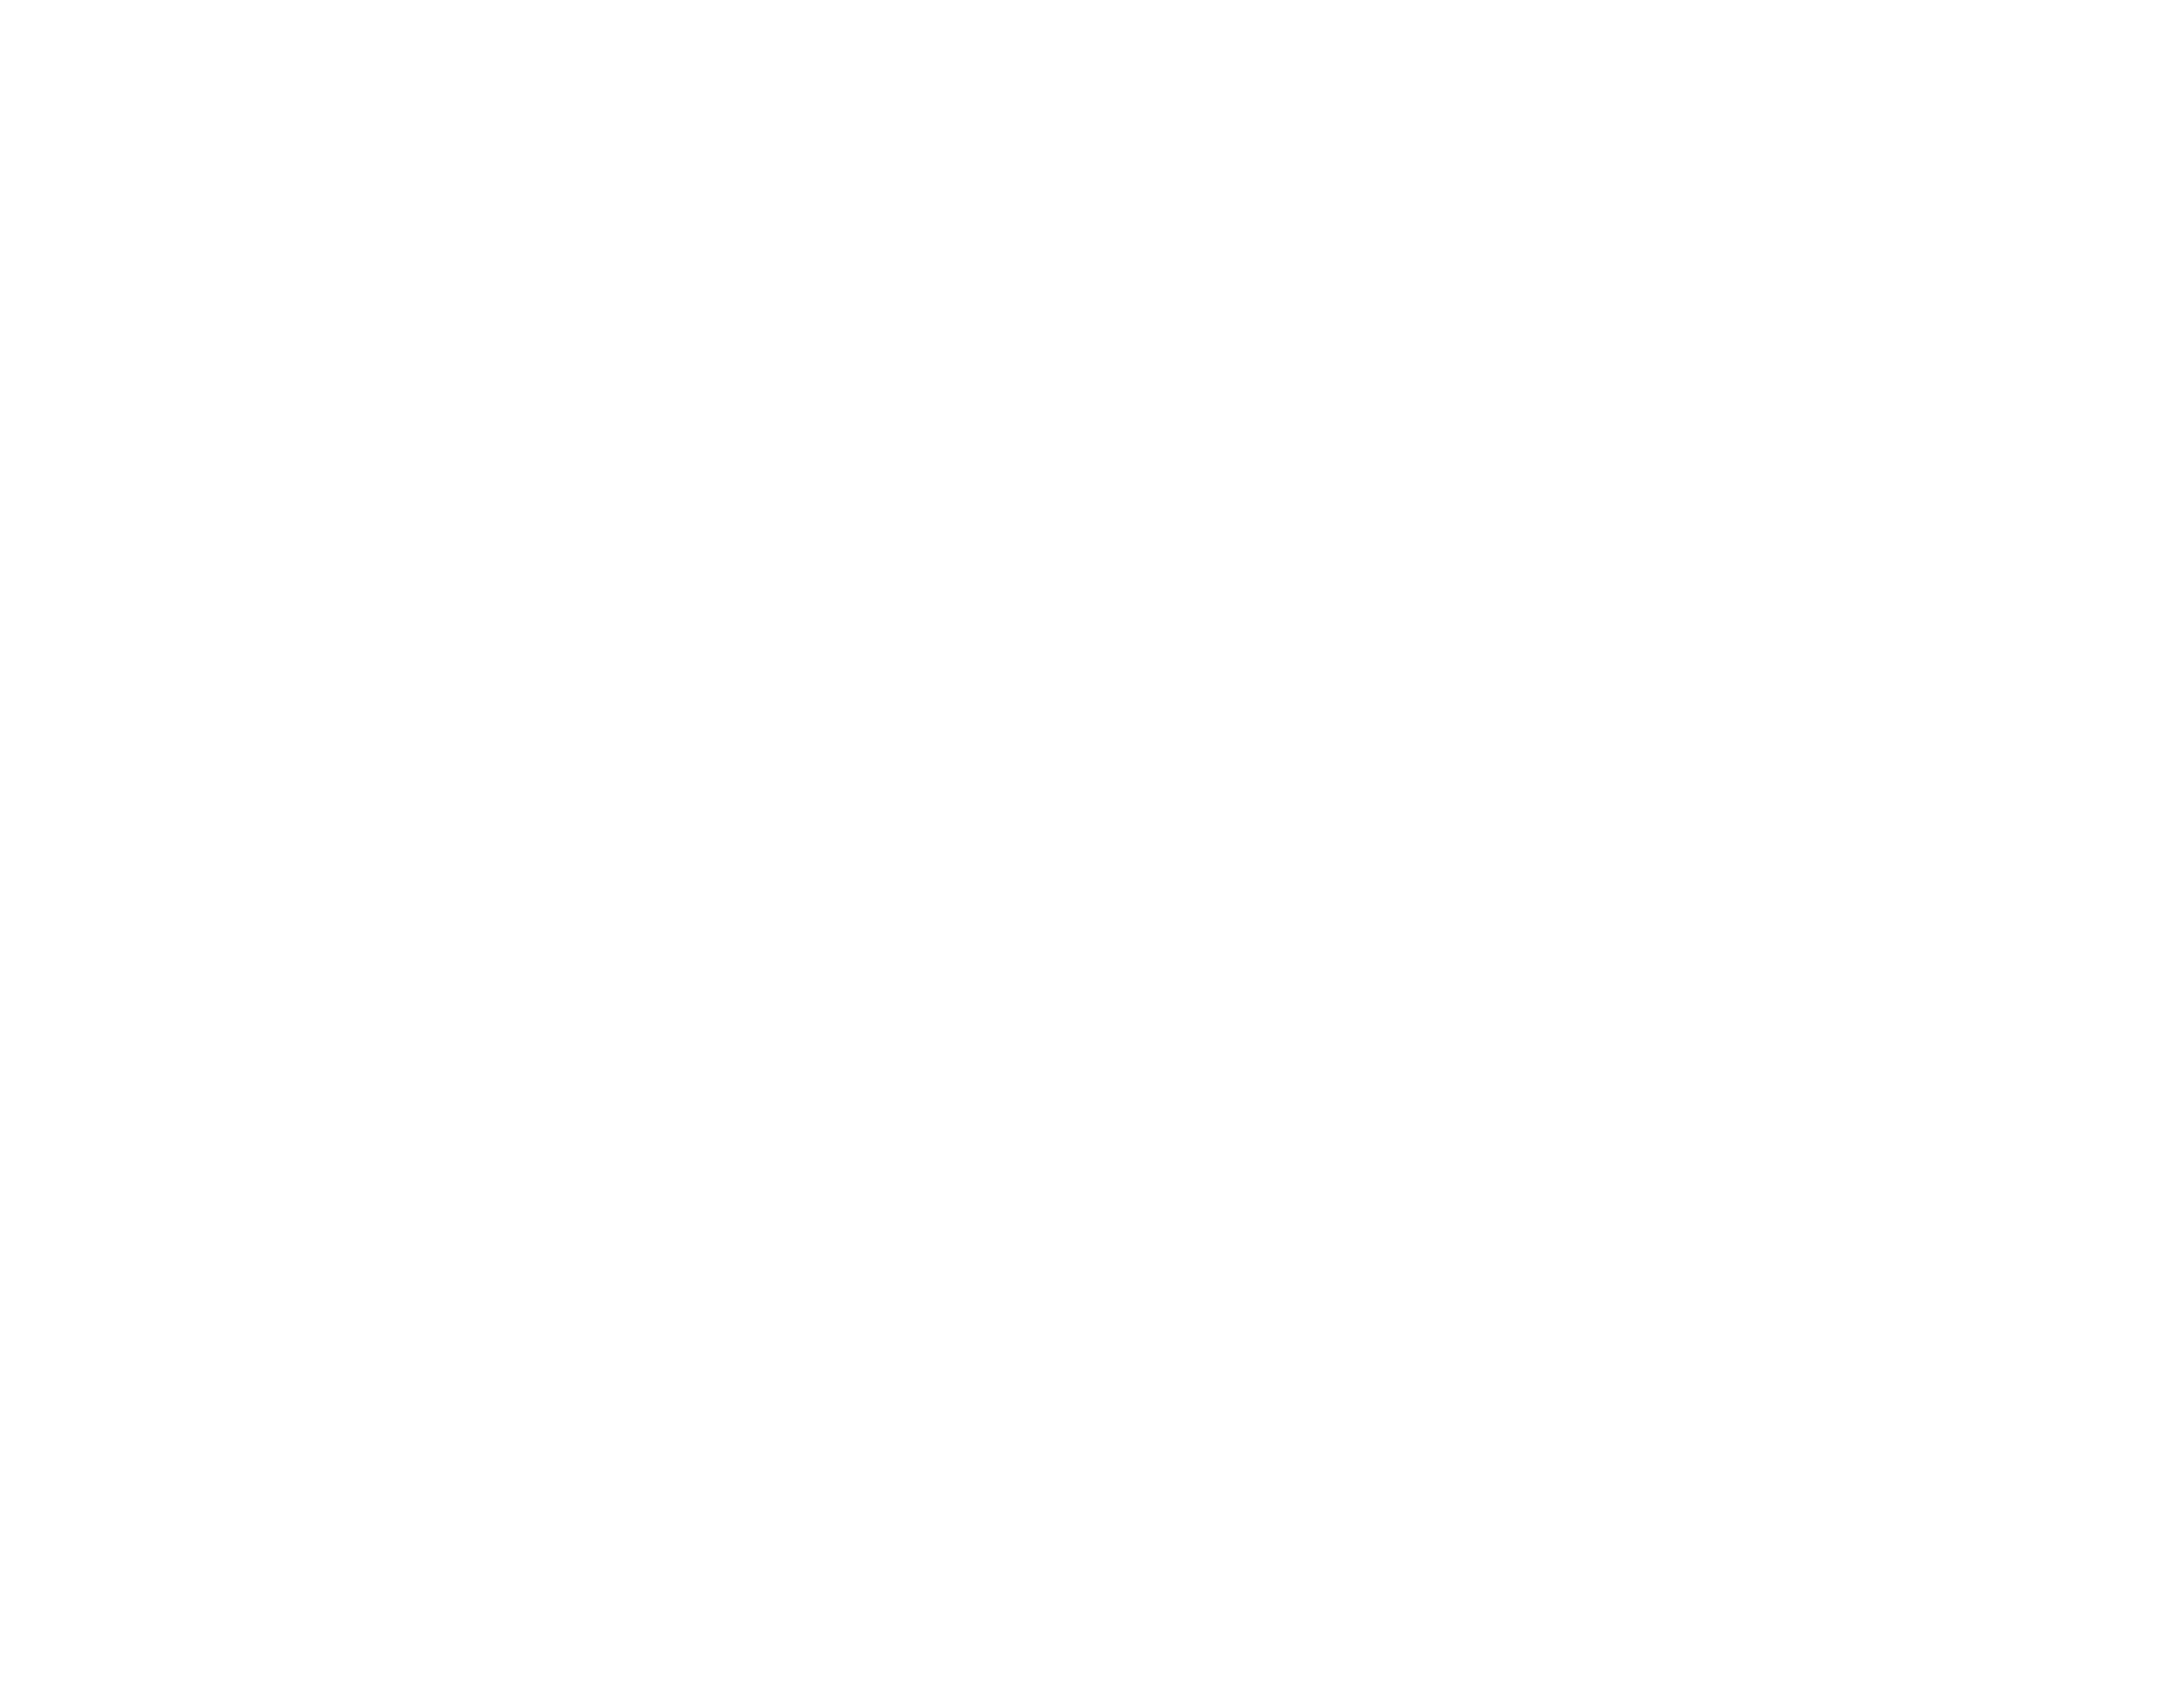

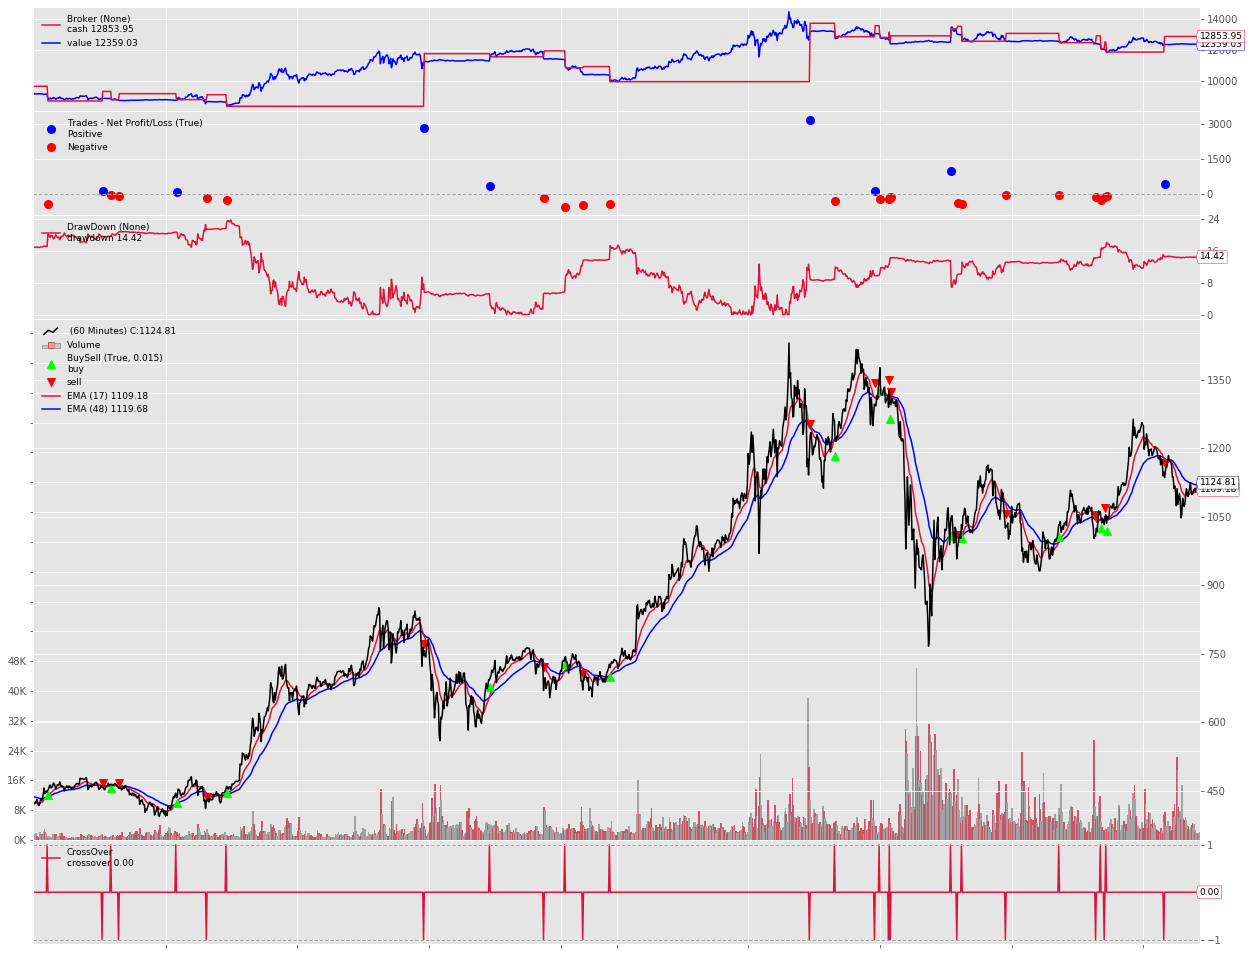

In [26]:
# EMA Crossover ETHER (17h and 48h)

# Create a Stratey
class TestStrategy(bt.Strategy):
    params = (
        ('short_ema', 1020),
        ('long_ema', 2880),
        ('mult', 10),
        ('lever', 10),
        ('printlog', True),
        ('trailstoppct', 0.05),  # trailstop order trail 0.05 = 5%
    )


    def log(self, txt, dt=None, doprint=False):
        ''' Logging function fot this strategy'''
        if self.params.printlog or doprint:
            dt = dt or self.data.datetime[0]
            dt = bt.num2date(dt)
            print('%s, %s' % (dt.isoformat(), txt))


    def __init__(self):
        # Keep a reference to the "close" line in the data[0] dataseries
        self.dataclose = self.datas[0].close

        # To keep track of pending orders and buy price/commission
        self.order = None
        self.buyprice = None
        self.buycomm = None

        # Add exponential moving averages
        ema_short = bt.ind.EMA(period=self.params.short_ema)
        ema_long = bt.ind.EMA(period=self.params.long_ema)
        
        self.crossover = bt.ind.CrossOver(ema_short, ema_long)


    def next(self):
        
        # Simply log the closing price of the series from the reference
        # self.log('Close, %.2f' % self.dataclose[0])
        
        if self.order:
            return  # if an order is active, no new orders are allowed
            
        if self.crossover > 0:  # cross upwards
            if self.position:
                self.log('CLOSE SHORT , %.2f' % self.dataclose[0])
                self.close()

            self.log('BUY CREATE , %.2f' % self.dataclose[0])
            # to make orders at 5% of portfolio value, no more than 500$
            self.buy(size=round(min((cerebro.broker.getvalue()*0.05), 500) / self.dataclose[0], 2))
                    # exectype=bt.Order.StopTrail, trailpercent=self.params.trailstoppct)

        elif self.crossover < 0:  # cross downwards
            if self.position:
                self.log('CLOSE LONG , %.2f' % self.dataclose[0])
                self.close()

            self.log('SELL CREATE , %.2f' % self.dataclose[0])
            # to make orders at 5% of portfolio value, no more than 500$
            self.sell(size=round(min((cerebro.broker.getvalue()*0.05), 500) / self.dataclose[0], 2))
                     # exectype=bt.Order.StopTrail, trailpercent=self.params.trailstoppct)


    def notify_order(self, order):
        if order.status in [order.Submitted, order.Accepted]:
            # Buy/Sell order submitted/accepted to/by broker - Nothing to do
            return

        # Check if an order has been completed
        # Attention: broker could reject order if not enough cash
        if order.status in [order.Completed]:
            
            if order.isbuy():
                self.log('BUY EXECUTED, Price: %.2f, Cost: %.2f, Comm %.2f' %
                         (order.executed.price,
                          order.executed.value,
                          order.executed.comm)
                         )

                self.buyprice = order.executed.price
                self.buycomm = order.executed.comm
            
            elif order.issell():
                self.log('SELL EXECUTED, Price: %.2f, Cost: %.2f, Comm %.2f' %
                         (order.executed.price,
                          order.executed.value,
                          order.executed.comm)
                        )

            self.bar_executed = len(self)

        elif order.status in [order.Canceled, order.Margin, order.Rejected]:
            self.log('Order Canceled/Margin/Rejected', doprint=True)

        # Write down: no pending order
        self.order = None


    def notify_trade(self, trade):
        if trade.isclosed:
            self.log('OPERATION PROFIT, GROSS %.2f, NET %.2f, Acc Balance: %.2f' %
                 (trade.pnl, trade.pnlcomm, cerebro.broker.getvalue()))
        
        elif trade.justopened:
            self.log('TRADE OPENED, SIZE: %2d , VAL: %.2f' % (trade.size, trade.value))


if __name__ == '__main__':
    # Create a cerebro entity
    cerebro = bt.Cerebro()
    
    # Add a strategy
    cerebro.addstrategy(TestStrategy)
    
    # timeframe and compression tells the system we have hourly data
    data = bt.feeds.PandasData(dataname=eth_usdt1h,
                               timeframe=bt.TimeFrame.Minutes,
                               compression=60)

    # Add the Data Feed to Cerebro
    cerebro.adddata(data)

    # Set our desired cash start
    cerebro.broker.setcash(10000.0)  # 10,000

    # Set the commission
    cerebro.broker.setcommission(commission=0.001,  # 0.1% binance commission
                                 mult=TestStrategy.params.mult,
                                 interest=0.01,  # long/short interest 0.01 -> 1%
                                 leverage=TestStrategy.params.lever,
                                 interest_long=True
                                 )
    
    print("Starting Portfolio Value: %.2f" % cerebro.broker.getvalue())

    # Create Analyzers
    # RF = 1%, 
    cerebro.addanalyzer(bt.analyzers.SharpeRatio_A, _name='mysharpe')
    cerebro.addanalyzer(bt.analyzers.DrawDown, _name='mydrawdown')
    cerebro.addanalyzer(bt.analyzers.Returns, _name='returns')
    cerebro.addanalyzer(bt.analyzers.TradeAnalyzer, _name='mytradeanal')
    cerebro.addanalyzer(bt.analyzers.BasicTradeStats , _name='tradestats')
    
    # Create Observers
    cerebro.addobserver(bt.observers.DrawDown)

    # Run over everything
    thestrats = cerebro.run()
    thestrat = thestrats[0]
    
    # Print Analyzers
    print()
    print("Final Portfolio Value: %.2f" % cerebro.broker.getvalue())
    print()
    print('Annualised SharpeR:', thestrat.analyzers.mysharpe.get_analysis()['sharperatio'])
    print()
    # CAGR = (end bal / beg bal) ^ 1/n of years - 1
    print('CAGR % ', thestrat.analyzers.returns.get_analysis()['rnorm100'] * 100)
    print()
    printTradeAnalysis(thestrat.analyzers.mytradeanal.get_analysis())
    print()
    printDrawDown(thestrat.analyzers.mydrawdown.get_analysis())
    print()
    pprint.pprint(dict(thestrat.analyzers.tradestats.get_analysis()))
    
    # to plot part of the data
    cerebro.plot(start=datetime.date(2017, 12, 1), end=datetime.date(2018, 2, 1))
    
    # cerebro.plot()  # plot backtest

Returns improved


## Now we can check if the result could be improved with optimised parameters. 

Short EMA (15-20), Long EMA (45-50)

In [11]:
# Parameter optimisation for Simple EMA Crossover

# Create a Stratey
class TestStrategy(bt.Strategy):
    params = (
        ('short_ema', 17),
        ('long_ema', 48),
        ('mult', 10),
        ('lever', 10),
        ('printlog', False),
        ('trailstoppct', 0.05),  # trailstop order trail 0.05 = 5%
    )


    def log(self, txt, dt=None, doprint=False):
        ''' Logging function fot this strategy'''
        if self.params.printlog or doprint:
            dt = dt or self.data.datetime[0]
            dt = bt.num2date(dt)
            print('%s, %s' % (dt.isoformat(), txt))


    def __init__(self):
        # Keep a reference to the "close" line in the data[0] dataseries
        self.dataclose = self.datas[0].close

        # To keep track of pending orders and buy price/commission
        self.order = None
        self.buyprice = None
        self.buycomm = None

        # Add exponential moving averages
        ema_short = bt.ind.EMA(period=self.params.short_ema)
        ema_long = bt.ind.EMA(period=self.params.long_ema)
        
        self.crossover = bt.ind.CrossOver(ema_short, ema_long)


    def next(self):
        
        # Simply log the closing price of the series from the reference
        # self.log('Close, %.2f' % self.dataclose[0])
        
        if self.order:
            return  # if an order is active, no new orders are allowed
            
        if self.crossover > 0:  # cross upwards
            if self.position:
                self.log('CLOSE SHORT , %.2f' % self.dataclose[0])
                self.close()

            self.log('BUY CREATE , %.2f' % self.dataclose[0])
            # to make orders at 5% of portfolio value, no more than 500$
            self.buy(size=round(min((cerebro.broker.getvalue()*0.05), 500) / self.dataclose[0], 2))
                    # exectype=bt.Order.StopTrail, trailpercent=self.params.trailstoppct)

        elif self.crossover < 0:  # cross downwards
            if self.position:
                self.log('CLOSE LONG , %.2f' % self.dataclose[0])
                self.close()

            self.log('SELL CREATE , %.2f' % self.dataclose[0])
            # to make orders at 5% of portfolio value, no more than 500$
            self.sell(size=round(min((cerebro.broker.getvalue()*0.05), 500) / self.dataclose[0], 2))
                     # exectype=bt.Order.StopTrail, trailpercent=self.params.trailstoppct)


    def notify_order(self, order):
        if order.status in [order.Submitted, order.Accepted]:
            # Buy/Sell order submitted/accepted to/by broker - Nothing to do
            return

        # Check if an order has been completed
        # Attention: broker could reject order if not enough cash
        if order.status in [order.Completed]:
            
            if order.isbuy():
                self.log('BUY EXECUTED, Price: %.2f, Cost: %.2f, Comm %.2f' %
                         (order.executed.price,
                          order.executed.value,
                          order.executed.comm)
                         )

                self.buyprice = order.executed.price
                self.buycomm = order.executed.comm
            
            elif order.issell():
                self.log('SELL EXECUTED, Price: %.2f, Cost: %.2f, Comm %.2f' %
                         (order.executed.price,
                          order.executed.value,
                          order.executed.comm)
                        )

            self.bar_executed = len(self)

        elif order.status in [order.Canceled, order.Margin, order.Rejected]:
            self.log('Order Canceled/Margin/Rejected', doprint=True)

        # Write down: no pending order
        self.order = None


    def notify_trade(self, trade):
        if trade.isclosed:
            self.log('OPERATION PROFIT, GROSS %.2f, NET %.2f, Acc Balance: %.2f' %
                 (trade.pnl, trade.pnlcomm, cerebro.broker.getvalue()))
        
        elif trade.justopened:
            self.log('TRADE OPENED, SIZE: %2d , VAL: %.2f' % (trade.size, trade.value))
    
    
#     UNCOMMENT TO OPTIMISE
    def stop(self):
        self.log('(Short EMA %2d), (Long EMA: %2d) Ending Value %.2f' %
                 (self.params.short_ema, self.params.long_ema, self.broker.getvalue()),
                 doprint=True)


if __name__ == '__main__':
    # Create a cerebro entity
    cerebro = bt.Cerebro()
    
    # Add a strategy
    strats = cerebro.optstrategy(
        TestStrategy,
        short_ema=range(15, 21),
        long_ema=range(45, 51))
    
    # timeframe and compression tells the system we have hourly data
    data = bt.feeds.PandasData(dataname=eth_usdt1h,
                               timeframe=bt.TimeFrame.Minutes,
                               compression=60)

    # Add the Data Feed to Cerebro
    cerebro.adddata(data)

    # Set our desired cash start
    cerebro.broker.setcash(10000.0)  # 10,000

    # Add a Percentage sizer - set to 5% of portfolio value
    # cerebro.addsizer(bt.sizers.PercentSizer, percents=5)
    # cerebro.addsizer(bt.sizers.FixedSize)

    # Set the commission
    cerebro.broker.setcommission(commission=0.001,  # 0.1% binance commission
                                 mult=TestStrategy.params.mult,
                                 interest=0.01,  # long/short interest 0.01 -> 1%
                                 leverage=TestStrategy.params.lever,
                                 interest_long=True
                                 )
    
    print("Starting Portfolio Value: %.2f" % cerebro.broker.getvalue())

    # Run over everything
    thestrats = cerebro.run(maxcpus=2)  # OPTIMIZE
    thestrat = thestrats[0]


Starting Portfolio Value: 10000.00
2019-08-21T14:59:59.999004, (Short EMA 15), (Long EMA: 46) Ending Value 22343.72
2019-08-21T14:59:59.999004, (Short EMA 15), (Long EMA: 45) Ending Value 22064.97
2019-08-21T14:59:59.999004, (Short EMA 15), (Long EMA: 47) Ending Value 21503.18
2019-08-21T14:59:59.999004, (Short EMA 15), (Long EMA: 48) Ending Value 21272.27
2019-08-21T14:59:59.999004, (Short EMA 15), (Long EMA: 49) Ending Value 20541.28
2019-08-21T14:59:59.999004, (Short EMA 15), (Long EMA: 50) Ending Value 21005.41
2019-08-21T14:59:59.999004, (Short EMA 16), (Long EMA: 45) Ending Value 20047.57
2019-08-21T14:59:59.999004, (Short EMA 16), (Long EMA: 46) Ending Value 20337.13
2019-08-21T14:59:59.999004, (Short EMA 16), (Long EMA: 47) Ending Value 21799.49
2019-08-21T14:59:59.999004, (Short EMA 16), (Long EMA: 48) Ending Value 21761.27
2019-08-21T14:59:59.999004, (Short EMA 16), (Long EMA: 49) Ending Value 22356.23
2019-08-21T14:59:59.999004, (Short EMA 16), (Long EMA: 50) Ending Value 22

So the best parameters were 20 and 50 which got us 27k instead of 22k

## Backtest with optimised parameters for ETH / USDT

Starting Portfolio Value: 10000.00
2017-08-20T23:16:59.998997, BUY CREATE , 298.39
2017-08-20T23:17:59.999003, BUY EXECUTED, Price: 298.39, Cost: 501.30, Comm 0.50
2017-08-20T23:17:59.999003, TRADE OPENED, SIZE:  1 , VAL: 501.30
2017-09-02T06:10:59.998995, CLOSE LONG , 361.01
2017-09-02T06:10:59.998995, SELL CREATE , 361.01
2017-09-02T06:11:59.999001, SELL EXECUTED, Price: 361.71, Cost: 501.30, Comm 0.79
2017-09-02T06:11:59.999001, SELL EXECUTED, Price: 361.71, Cost: -502.78, Comm 0.50
2017-09-02T06:11:59.999001, OPERATION PROFIT, GROSS 1063.78, NET 1062.49, Acc Balance: 11060.53
2017-09-02T06:11:59.999001, TRADE OPENED, SIZE: -1 , VAL: -502.78
2017-09-06T02:39:59.998995, CLOSE SHORT , 328.89
2017-09-06T02:39:59.998995, BUY CREATE , 328.89
2017-09-06T02:40:59.999001, BUY EXECUTED, Price: 329.00, Cost: -502.78, Comm 0.51
2017-09-06T02:40:59.999001, BUY EXECUTED, Price: 329.00, Cost: 500.08, Comm 0.50
2017-09-06T02:40:59.999001, OPERATION PROFIT, GROSS 454.67, NET 453.65, Acc Balance: 11

2017-10-17T02:06:59.999002, CLOSE LONG , 326.28
2017-10-17T02:06:59.999002, SELL CREATE , 326.28
2017-10-17T02:07:59.998999, SELL EXECUTED, Price: 327.31, Cost: 500.77, Comm 0.49
2017-10-17T02:07:59.998999, SELL EXECUTED, Price: 327.31, Cost: -500.78, Comm 0.50
2017-10-17T02:07:59.998999, OPERATION PROFIT, GROSS -228.93, NET -229.92, Acc Balance: 11035.85
2017-10-17T02:07:59.998999, TRADE OPENED, SIZE: -1 , VAL: -500.78
2017-10-24T06:17:59.999000, CLOSE SHORT , 306.99
2017-10-24T06:17:59.999000, BUY CREATE , 306.99
2017-10-24T06:18:59.998996, BUY EXECUTED, Price: 306.65, Cost: -500.78, Comm 0.57
2017-10-24T06:18:59.998996, BUY EXECUTED, Price: 306.65, Cost: 499.84, Comm 0.50
2017-10-24T06:18:59.998996, OPERATION PROFIT, GROSS 316.10, NET 315.03, Acc Balance: 11352.20
2017-10-24T06:18:59.998996, TRADE OPENED, SIZE:  1 , VAL: 499.84
2017-10-25T11:05:59.998996, CLOSE LONG , 288.54
2017-10-25T11:05:59.998996, SELL CREATE , 288.54
2017-10-25T11:06:59.999002, SELL EXECUTED, Price: 291.61, Co

2017-12-04T17:32:20.808999, CLOSE LONG , 457.00
2017-12-04T17:32:20.808999, SELL CREATE , 457.00
2017-12-04T17:33:20.808995, SELL EXECUTED, Price: 456.81, Cost: 497.66, Comm 0.54
2017-12-04T17:33:20.808995, SELL EXECUTED, Price: 456.81, Cost: -497.92, Comm 0.50
2017-12-04T17:33:20.808995, OPERATION PROFIT, GROSS 48.29, NET 47.25, Acc Balance: 10900.79
2017-12-04T17:33:20.808995, TRADE OPENED, SIZE: -1 , VAL: -497.92
2017-12-05T02:34:20.809002, CLOSE SHORT , 465.50
2017-12-05T02:34:20.809002, BUY CREATE , 465.50
2017-12-05T02:35:20.808998, BUY EXECUTED, Price: 465.05, Cost: -497.92, Comm 0.52
2017-12-05T02:35:20.808998, BUY EXECUTED, Price: 465.05, Cost: 497.60, Comm 0.50
2017-12-05T02:35:20.808998, OPERATION PROFIT, GROSS -89.82, NET -90.83, Acc Balance: 10810.16
2017-12-05T02:35:20.808998, TRADE OPENED, SIZE:  1 , VAL: 497.60
2017-12-05T14:01:20.808999, CLOSE LONG , 452.70
2017-12-05T14:01:20.808999, SELL CREATE , 452.70
2017-12-05T14:02:20.808996, SELL EXECUTED, Price: 452.73, Cost: 

2018-01-26T12:40:59.998998, CLOSE LONG , 1020.99
2018-01-26T12:40:59.998998, SELL CREATE , 1020.99
2018-01-26T12:41:59.999004, SELL EXECUTED, Price: 1021.02, Cost: 499.53, Comm 0.51
2018-01-26T12:41:59.999004, SELL EXECUTED, Price: 1021.02, Cost: -500.30, Comm 0.50
2018-01-26T12:41:59.999004, OPERATION PROFIT, GROSS -196.51, NET -197.51, Acc Balance: 16696.06
2018-01-26T12:41:59.999004, TRADE OPENED, SIZE:  0 , VAL: -500.30
2018-01-26T16:36:59.998999, CLOSE SHORT , 1065.27
2018-01-26T16:36:59.998999, BUY CREATE , 1065.27
2018-01-26T16:37:59.998995, BUY EXECUTED, Price: 1064.99, Cost: -500.30, Comm 0.52
2018-01-26T16:37:59.998995, BUY EXECUTED, Price: 1064.99, Cost: 500.55, Comm 0.50
2018-01-26T16:37:59.998995, OPERATION PROFIT, GROSS -215.45, NET -216.48, Acc Balance: 16471.06
2018-01-26T16:37:59.998995, TRADE OPENED, SIZE:  0 , VAL: 500.55
2018-01-30T05:43:59.999001, CLOSE LONG , 1166.90
2018-01-30T05:43:59.999001, SELL CREATE , 1166.90
2018-01-30T05:44:59.998997, SELL EXECUTED, Price

2018-02-28T23:30:59.998997, CLOSE LONG , 855.70
2018-02-28T23:30:59.998997, SELL CREATE , 855.70
2018-02-28T23:31:59.999003, SELL EXECUTED, Price: 855.70, Cost: 496.03, Comm 0.52
2018-02-28T23:31:59.999003, SELL EXECUTED, Price: 855.70, Cost: -496.31, Comm 0.50
2018-02-28T23:31:59.999003, OPERATION PROFIT, GROSS 2.73, NET 1.71, Acc Balance: 17593.86
2018-02-28T23:31:59.999003, TRADE OPENED, SIZE:  0 , VAL: -496.31
2018-03-01T18:41:59.999004, CLOSE SHORT , 875.90
2018-03-01T18:41:59.999004, BUY CREATE , 875.90
2018-03-01T18:42:59.999001, BUY EXECUTED, Price: 875.90, Cost: -496.31, Comm 0.52
2018-03-01T18:42:59.999001, BUY EXECUTED, Price: 875.90, Cost: 499.26, Comm 0.50
2018-03-01T18:42:59.999001, OPERATION PROFIT, GROSS -117.16, NET -118.18, Acc Balance: 17475.07
2018-03-01T18:42:59.999001, TRADE OPENED, SIZE:  0 , VAL: 499.26
2018-03-02T11:52:59.998999, CLOSE LONG , 859.67
2018-03-02T11:52:59.998999, SELL CREATE , 859.67
2018-03-02T11:53:59.998995, SELL EXECUTED, Price: 859.92, Cost: 

2018-04-17T22:31:59.998997, CLOSE LONG , 505.01
2018-04-17T22:31:59.998997, SELL CREATE , 505.01
2018-04-17T22:32:59.999003, SELL EXECUTED, Price: 505.40, Cost: 501.87, Comm 0.49
2018-04-17T22:32:59.999003, SELL EXECUTED, Price: 505.40, Cost: -500.35, Comm 0.50
2018-04-17T22:32:59.999003, OPERATION PROFIT, GROSS -116.30, NET -117.30, Acc Balance: 19981.76
2018-04-17T22:32:59.999003, TRADE OPENED, SIZE:  0 , VAL: -500.35
2018-04-18T10:02:59.999000, CLOSE SHORT , 514.97
2018-04-18T10:02:59.999000, BUY CREATE , 514.97
2018-04-18T10:03:59.998996, BUY EXECUTED, Price: 514.43, Cost: -500.35, Comm 0.52
2018-04-18T10:03:59.998996, BUY EXECUTED, Price: 514.43, Cost: 499.00, Comm 0.50
2018-04-18T10:03:59.998996, OPERATION PROFIT, GROSS -89.40, NET -90.42, Acc Balance: 19889.90
2018-04-18T10:03:59.998996, TRADE OPENED, SIZE:  0 , VAL: 499.00
2018-04-25T12:14:59.999000, CLOSE LONG , 635.51
2018-04-25T12:14:59.999000, SELL CREATE , 635.51
2018-04-25T12:15:59.998997, SELL EXECUTED, Price: 635.08, Co

2018-06-14T21:17:59.999000, CLOSE SHORT , 517.93
2018-06-14T21:17:59.999000, BUY CREATE , 517.93
2018-06-14T21:18:59.998996, BUY EXECUTED, Price: 517.94, Cost: -499.26, Comm 0.50
2018-06-14T21:18:59.998996, BUY EXECUTED, Price: 517.94, Cost: 502.40, Comm 0.50
2018-06-14T21:18:59.998996, OPERATION PROFIT, GROSS 693.71, NET 692.72, Acc Balance: 22683.95
2018-06-14T21:18:59.998996, TRADE OPENED, SIZE:  0 , VAL: 502.40
2018-06-15T22:32:59.999003, CLOSE LONG , 490.51
2018-06-15T22:32:59.999003, SELL CREATE , 490.51
2018-06-15T22:33:59.998999, SELL EXECUTED, Price: 490.52, Cost: 502.40, Comm 0.49
2018-06-15T22:33:59.998999, SELL EXECUTED, Price: 490.52, Cost: -500.33, Comm 0.50
2018-06-15T22:33:59.998999, OPERATION PROFIT, GROSS -265.97, NET -266.97, Acc Balance: 22419.94
2018-06-15T22:33:59.998999, TRADE OPENED, SIZE: -1 , VAL: -500.33
2018-06-17T00:46:59.998997, CLOSE SHORT , 497.76
2018-06-17T00:46:59.998997, BUY CREATE , 497.76
2018-06-17T00:47:59.999003, BUY EXECUTED, Price: 497.60, Cos

2018-07-24T10:35:59.999002, CLOSE SHORT , 473.00
2018-07-24T10:35:59.999002, BUY CREATE , 473.00
2018-07-24T10:36:59.998999, BUY EXECUTED, Price: 473.03, Cost: -497.35, Comm 0.52
2018-07-24T10:36:59.998999, BUY EXECUTED, Price: 473.03, Cost: 501.41, Comm 0.50
2018-07-24T10:36:59.998999, OPERATION PROFIT, GROSS -135.22, NET -136.24, Acc Balance: 22929.19
2018-07-24T10:36:59.998999, TRADE OPENED, SIZE:  1 , VAL: 501.41
2018-07-27T00:20:59.998999, CLOSE LONG , 463.61
2018-07-27T00:20:59.998999, SELL CREATE , 463.61
2018-07-27T00:21:59.998995, SELL EXECUTED, Price: 463.53, Cost: 501.41, Comm 0.53
2018-07-27T00:21:59.998995, SELL EXECUTED, Price: 463.53, Cost: -500.61, Comm 0.50
2018-07-27T00:21:59.998995, OPERATION PROFIT, GROSS -100.70, NET -101.73, Acc Balance: 22834.31
2018-07-27T00:21:59.998995, TRADE OPENED, SIZE: -1 , VAL: -500.61
2018-08-04T08:06:59.999002, CLOSE SHORT , 417.33
2018-08-04T08:06:59.999002, BUY CREATE , 417.33
2018-08-04T08:07:59.998999, BUY EXECUTED, Price: 417.40, C

2018-08-30T08:22:59.998995, CLOSE LONG , 282.50
2018-08-30T08:22:59.998995, SELL CREATE , 282.50
2018-08-30T08:23:59.999002, SELL EXECUTED, Price: 282.45, Cost: 499.51, Comm 0.55
2018-08-30T08:23:59.999002, SELL EXECUTED, Price: 282.45, Cost: -499.94, Comm 0.50
2018-08-30T08:23:59.999002, OPERATION PROFIT, GROSS 117.29, NET 116.24, Acc Balance: 23460.05
2018-08-30T08:23:59.999002, TRADE OPENED, SIZE: -1 , VAL: -499.94
2018-09-01T03:57:59.998997, CLOSE SHORT , 288.47
2018-09-01T03:57:59.998997, BUY CREATE , 288.47
2018-09-01T03:58:59.999004, BUY EXECUTED, Price: 288.47, Cost: -499.94, Comm 0.54
2018-09-01T03:58:59.999004, BUY EXECUTED, Price: 288.47, Cost: 499.05, Comm 0.50
2018-09-01T03:58:59.999004, OPERATION PROFIT, GROSS -106.55, NET -107.59, Acc Balance: 23350.80
2018-09-01T03:58:59.999004, TRADE OPENED, SIZE:  1 , VAL: 499.05
2018-09-03T10:31:59.998997, CLOSE LONG , 287.02
2018-09-03T10:31:59.998997, SELL CREATE , 287.02
2018-09-03T10:32:59.999003, SELL EXECUTED, Price: 287.02, Co

2018-10-07T09:29:59.998997, CLOSE LONG , 222.90
2018-10-07T09:29:59.998997, SELL CREATE , 222.90
2018-10-07T09:30:59.999004, SELL EXECUTED, Price: 222.90, Cost: 500.79, Comm 0.52
2018-10-07T09:30:59.999004, SELL EXECUTED, Price: 222.90, Cost: -499.30, Comm 0.50
2018-10-07T09:30:59.999004, OPERATION PROFIT, GROSS -37.24, NET -38.27, Acc Balance: 24769.85
2018-10-07T09:30:59.999004, TRADE OPENED, SIZE: -2 , VAL: -499.30
2018-10-08T01:24:59.999001, CLOSE SHORT , 226.20
2018-10-08T01:24:59.999001, BUY CREATE , 226.20
2018-10-08T01:25:59.998998, BUY EXECUTED, Price: 226.20, Cost: -499.30, Comm 0.52
2018-10-08T01:25:59.998998, BUY EXECUTED, Price: 226.20, Cost: 499.90, Comm 0.50
2018-10-08T01:25:59.998998, OPERATION PROFIT, GROSS -73.92, NET -74.94, Acc Balance: 24697.45
2018-10-08T01:25:59.998998, TRADE OPENED, SIZE:  2 , VAL: 499.90
2018-10-10T05:44:59.998997, CLOSE LONG , 224.83
2018-10-10T05:44:59.998997, SELL CREATE , 224.83
2018-10-10T05:45:59.999004, SELL EXECUTED, Price: 224.87, Cost

2018-11-12T16:58:59.999001, CLOSE SHORT , 213.08
2018-11-12T16:58:59.999001, BUY CREATE , 213.08
2018-11-12T16:59:59.998997, BUY EXECUTED, Price: 213.06, Cost: -499.30, Comm 0.51
2018-11-12T16:59:59.998997, BUY EXECUTED, Price: 213.06, Cost: 500.69, Comm 0.50
2018-11-12T16:59:59.998997, OPERATION PROFIT, GROSS -13.87, NET -14.88, Acc Balance: 24336.39
2018-11-12T16:59:59.998997, TRADE OPENED, SIZE:  2 , VAL: 500.69
2018-11-12T17:31:59.999003, CLOSE LONG , 212.27
2018-11-12T17:31:59.999003, SELL CREATE , 212.27
2018-11-12T17:32:59.999000, SELL EXECUTED, Price: 212.19, Cost: 500.69, Comm 0.50
2018-11-12T17:32:59.999000, SELL EXECUTED, Price: 212.19, Cost: -500.77, Comm 0.50
2018-11-12T17:32:59.999000, OPERATION PROFIT, GROSS -20.45, NET -21.44, Acc Balance: 24312.60
2018-11-12T17:32:59.999000, TRADE OPENED, SIZE: -2 , VAL: -500.77
2018-11-28T07:01:59.999003, CLOSE SHORT , 115.91
2018-11-28T07:01:59.999003, BUY CREATE , 115.91
2018-11-28T07:02:59.999000, BUY EXECUTED, Price: 115.92, Cost:

2019-01-06T13:59:59.998997, CLOSE LONG , 150.93
2019-01-06T13:59:59.998997, SELL CREATE , 150.93
2019-01-06T14:00:59.999004, SELL EXECUTED, Price: 150.97, Cost: 500.11, Comm 0.61
2019-01-06T14:00:59.999004, SELL EXECUTED, Price: 150.97, Cost: -499.71, Comm 0.50
2019-01-06T14:00:59.999004, OPERATION PROFIT, GROSS 433.80, NET 432.69, Acc Balance: 28183.03
2019-01-06T14:00:59.999004, TRADE OPENED, SIZE: -3 , VAL: -499.71
2019-01-06T17:31:59.999003, CLOSE SHORT , 155.99
2019-01-06T17:31:59.999003, BUY CREATE , 155.99
2019-01-06T17:32:59.999000, BUY EXECUTED, Price: 155.95, Cost: -499.71, Comm 0.52
2019-01-06T17:32:59.999000, BUY EXECUTED, Price: 155.95, Cost: 500.60, Comm 0.50
2019-01-06T17:32:59.999000, OPERATION PROFIT, GROSS -164.84, NET -165.85, Acc Balance: 28014.15
2019-01-06T17:32:59.999000, TRADE OPENED, SIZE:  3 , VAL: 500.60
2019-01-07T12:58:59.999004, CLOSE LONG , 150.39
2019-01-07T12:58:59.999004, SELL CREATE , 150.39
2019-01-07T12:59:59.999000, SELL EXECUTED, Price: 150.38, Co

2019-02-15T17:56:59.999004, CLOSE LONG , 121.26
2019-02-15T17:56:59.999004, SELL CREATE , 121.26
2019-02-15T17:57:59.999001, SELL EXECUTED, Price: 121.20, Cost: 500.29, Comm 0.49
2019-02-15T17:57:59.999001, SELL EXECUTED, Price: 121.20, Cost: -499.34, Comm 0.50
2019-02-15T17:57:59.999001, OPERATION PROFIT, GROSS -57.94, NET -58.93, Acc Balance: 28244.92
2019-02-15T17:57:59.999001, TRADE OPENED, SIZE: -4 , VAL: -499.34
2019-02-16T04:15:59.999004, CLOSE SHORT , 122.61
2019-02-16T04:15:59.999004, BUY CREATE , 122.61
2019-02-16T04:16:59.999000, BUY EXECUTED, Price: 122.59, Cost: -499.34, Comm 0.52
2019-02-16T04:16:59.999000, BUY EXECUTED, Price: 122.59, Cost: 500.17, Comm 0.50
2019-02-16T04:16:59.999000, OPERATION PROFIT, GROSS -57.27, NET -58.29, Acc Balance: 28186.38
2019-02-16T04:16:59.999000, TRADE OPENED, SIZE:  4 , VAL: 500.17
2019-02-24T18:46:59.998997, CLOSE LONG , 139.42
2019-02-24T18:46:59.998997, SELL CREATE , 139.42
2019-02-24T18:47:59.999003, SELL EXECUTED, Price: 139.43, Cost

2019-04-15T19:02:59.999000, CLOSE LONG , 160.27
2019-04-15T19:02:59.999000, SELL CREATE , 160.27
2019-04-15T19:03:59.998996, SELL EXECUTED, Price: 160.24, Cost: 500.10, Comm 0.49
2019-04-15T19:03:59.998996, SELL EXECUTED, Price: 160.24, Cost: -499.95, Comm 0.50
2019-04-15T19:03:59.998996, OPERATION PROFIT, GROSS -193.80, NET -194.79, Acc Balance: 28813.66
2019-04-15T19:03:59.998996, TRADE OPENED, SIZE: -3 , VAL: -499.95
2019-04-16T22:04:59.999003, CLOSE SHORT , 164.94
2019-04-16T22:04:59.999003, BUY CREATE , 164.94
2019-04-16T22:05:59.998999, BUY EXECUTED, Price: 164.92, Cost: -499.95, Comm 0.53
2019-04-16T22:05:59.998999, BUY EXECUTED, Price: 164.92, Cost: 499.71, Comm 0.50
2019-04-16T22:05:59.998999, OPERATION PROFIT, GROSS -146.02, NET -147.04, Acc Balance: 28667.88
2019-04-16T22:05:59.998999, TRADE OPENED, SIZE:  3 , VAL: 499.71
2019-04-21T09:22:59.999002, CLOSE LONG , 169.61
2019-04-21T09:22:59.999002, SELL CREATE , 169.61
2019-04-21T09:23:59.998998, SELL EXECUTED, Price: 169.61, 

2019-05-22T22:05:59.998999, CLOSE LONG , 240.10
2019-05-22T22:05:59.998999, SELL CREATE , 240.10
2019-05-22T22:06:59.998995, SELL EXECUTED, Price: 240.42, Cost: 499.89, Comm 0.52
2019-05-22T22:06:59.998995, SELL EXECUTED, Price: 240.42, Cost: -500.07, Comm 0.50
2019-05-22T22:06:59.998995, OPERATION PROFIT, GROSS -214.52, NET -215.54, Acc Balance: 29670.57
2019-05-22T22:06:59.998995, TRADE OPENED, SIZE: -2 , VAL: -500.07
2019-05-24T11:57:59.999001, CLOSE SHORT , 251.27
2019-05-24T11:57:59.999001, BUY CREATE , 251.27
2019-05-24T11:58:59.998997, BUY EXECUTED, Price: 251.23, Cost: -500.07, Comm 0.55
2019-05-24T11:58:59.998997, BUY EXECUTED, Price: 251.23, Cost: 499.95, Comm 0.50
2019-05-24T11:58:59.998997, OPERATION PROFIT, GROSS -224.85, NET -225.90, Acc Balance: 29450.13
2019-05-24T11:58:59.998997, TRADE OPENED, SIZE:  1 , VAL: 499.95
2019-05-26T10:31:59.998997, CLOSE LONG , 247.26
2019-05-26T10:31:59.998997, SELL CREATE , 247.26
2019-05-26T10:32:59.999003, SELL EXECUTED, Price: 247.30, 

2019-07-10T15:31:59.999000, CLOSE LONG , 288.06
2019-07-10T15:31:59.999000, SELL CREATE , 288.06
2019-07-10T15:32:59.998996, SELL EXECUTED, Price: 288.06, Cost: 499.66, Comm 0.53
2019-07-10T15:32:59.998996, SELL EXECUTED, Price: 288.06, Cost: -501.22, Comm 0.50
2019-07-10T15:32:59.998996, OPERATION PROFIT, GROSS -70.79, NET -71.83, Acc Balance: 28868.79
2019-07-10T15:32:59.998996, TRADE OPENED, SIZE: -1 , VAL: -501.22
2019-07-18T16:09:59.998995, CLOSE SHORT , 223.66
2019-07-18T16:09:59.998995, BUY CREATE , 223.66
2019-07-18T16:10:59.999001, BUY EXECUTED, Price: 223.66, Cost: -501.22, Comm 0.50
2019-07-18T16:10:59.999001, BUY EXECUTED, Price: 223.66, Cost: 501.00, Comm 0.50
2019-07-18T16:10:59.999001, OPERATION PROFIT, GROSS 1120.56, NET 1119.56, Acc Balance: 30028.03
2019-07-18T16:10:59.999001, TRADE OPENED, SIZE:  2 , VAL: 501.00
2019-07-21T18:03:59.998999, CLOSE LONG , 218.84
2019-07-21T18:03:59.998999, SELL CREATE , 218.84
2019-07-21T18:04:59.998996, SELL EXECUTED, Price: 218.85, Co

2019-09-01T03:08:59.999002, CLOSE SHORT , 172.36
2019-09-01T03:08:59.999002, BUY CREATE , 172.36
2019-09-01T03:09:59.998998, BUY EXECUTED, Price: 172.40, Cost: -500.08, Comm 0.54
2019-09-01T03:09:59.998998, BUY EXECUTED, Price: 172.40, Cost: 499.96, Comm 0.50
2019-09-01T03:09:59.998998, OPERATION PROFIT, GROSS 432.22, NET 431.18, Acc Balance: 29894.16
2019-09-01T03:09:59.998998, TRADE OPENED, SIZE:  2 , VAL: 499.96
2019-09-01T16:56:59.998998, CLOSE LONG , 169.16
2019-09-01T16:56:59.998998, SELL CREATE , 169.16
2019-09-01T16:57:59.999004, SELL EXECUTED, Price: 169.17, Cost: 499.96, Comm 0.49
2019-09-01T16:57:59.999004, SELL EXECUTED, Price: 169.17, Cost: -500.74, Comm 0.50
2019-09-01T16:57:59.999004, OPERATION PROFIT, GROSS -93.67, NET -94.66, Acc Balance: 29798.38
2019-09-01T16:57:59.999004, TRADE OPENED, SIZE: -2 , VAL: -500.74

Annual return: OrderedDict([(2017, 0.3572796577909596), (2018, 1.0747963697900187), (2019, 0.05806330120670422)])

SQN:  AutoOrderedDict([('sqn', 2.3750214626

<IPython.core.display.Javascript object>


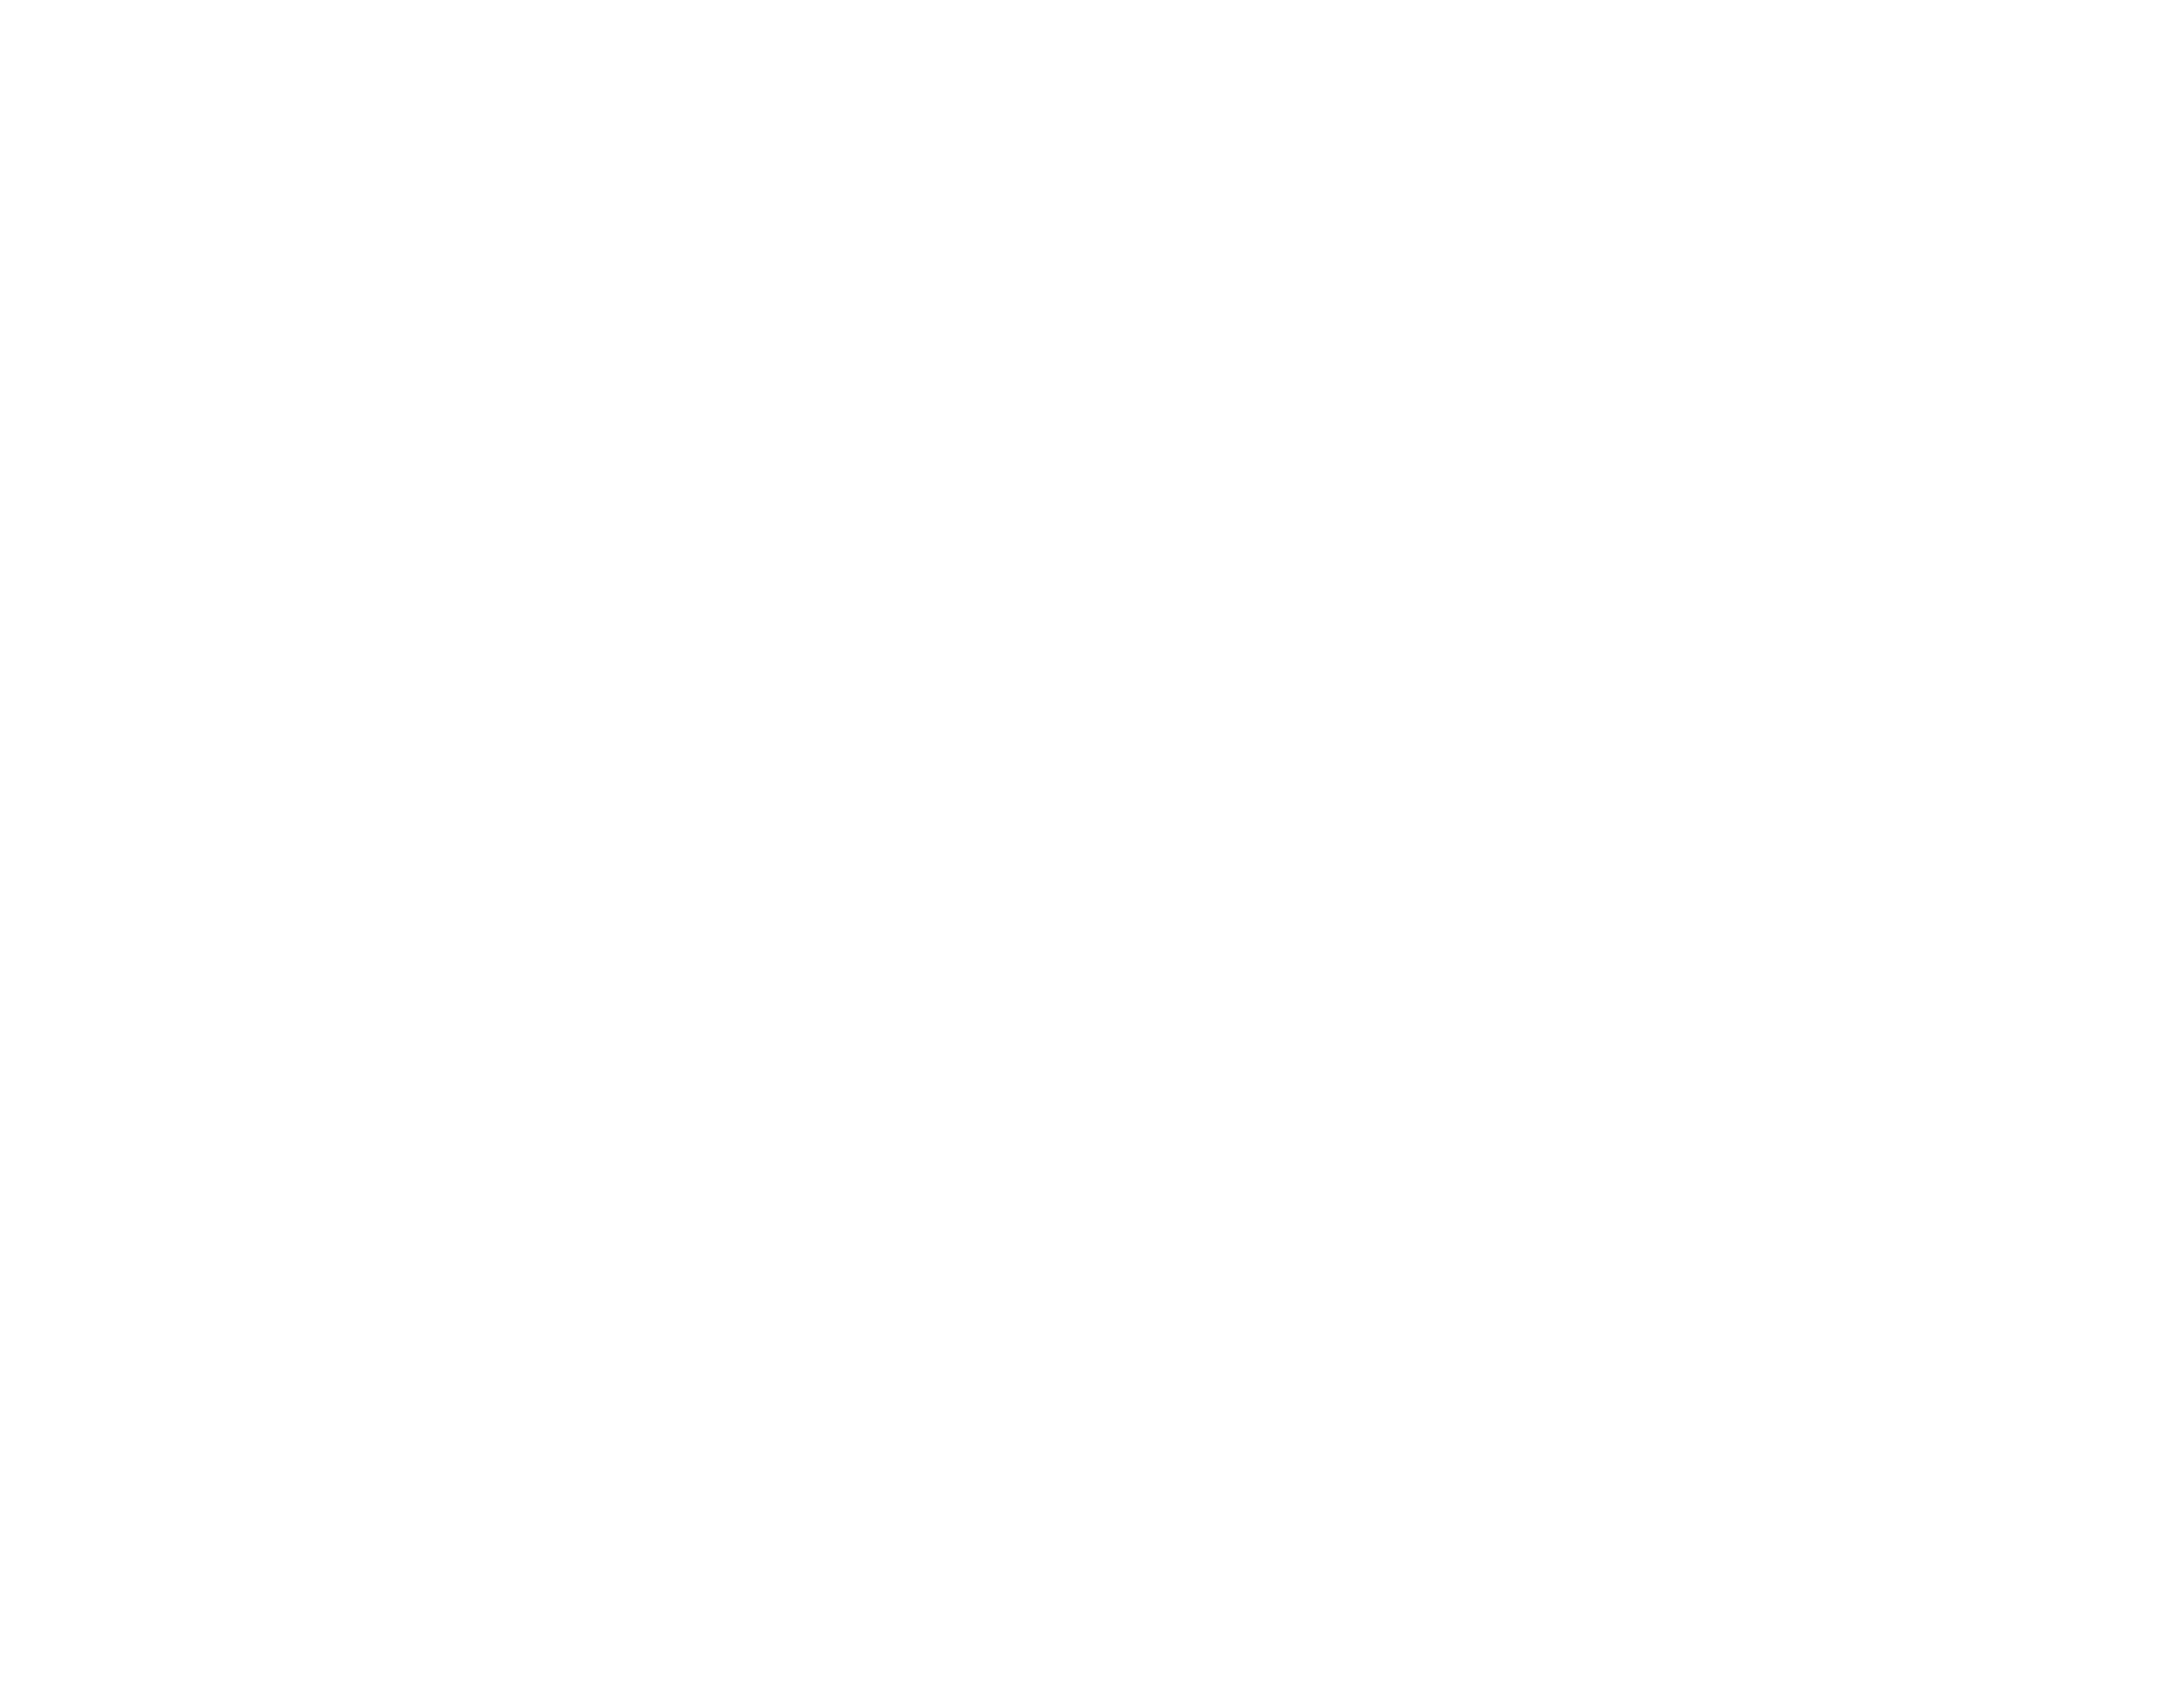

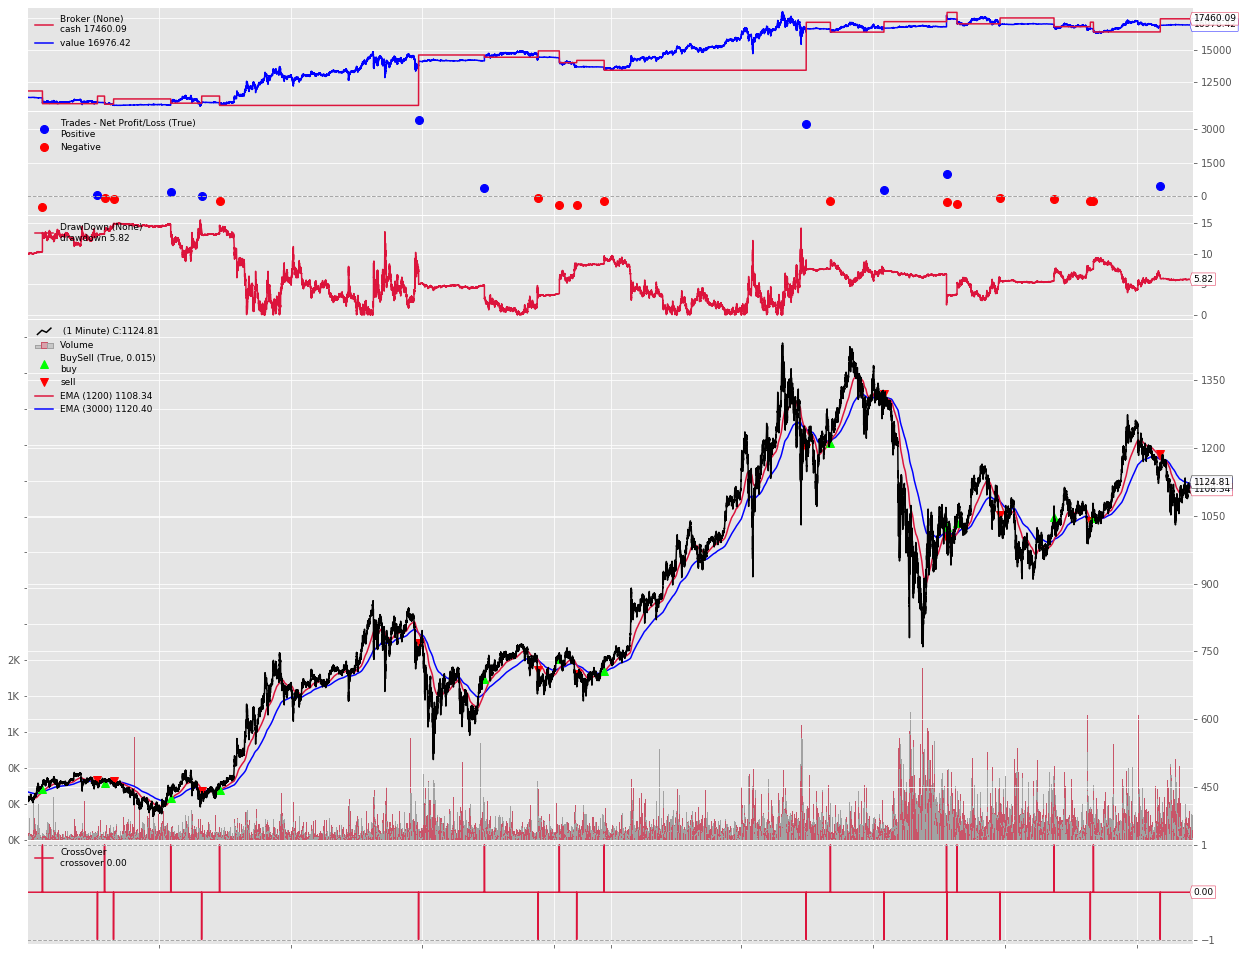

In [33]:
# Backtest with optimised parameters on ETH/USD

# Create a Stratey
class TestStrategy(bt.Strategy):
    params = (
        ('short_ema', 1200),
        ('long_ema', 3000),
        ('mult', 10),
        ('lever', 10),
        ('printlog', True),
        ('trailstoppct', 0.05),  # trailstop order trail 0.05 = 5%
    )


    def log(self, txt, dt=None, doprint=False):
        ''' Logging function fot this strategy'''
        if self.params.printlog or doprint:
            dt = dt or self.data.datetime[0]
            dt = bt.num2date(dt)
            print('%s, %s' % (dt.isoformat(), txt))


    def __init__(self):
        # Keep a reference to the "close" line in the data[0] dataseries
        self.dataclose = self.datas[0].close

        # To keep track of pending orders and buy price/commission
        self.order = None
        self.buyprice = None
        self.buycomm = None

        # Add exponential moving averages
        ema_short = bt.ind.EMA(period=self.params.short_ema)
        ema_long = bt.ind.EMA(period=self.params.long_ema)
        
        self.crossover = bt.ind.CrossOver(ema_short, ema_long)


    def next(self):
        
        # Simply log the closing price of the series from the reference
        # self.log('Close, %.2f' % self.dataclose[0])
        
        if self.order:
            return  # if an order is active, no new orders are allowed
            
        if self.crossover > 0:  # cross upwards
            if self.position:
                self.log('CLOSE SHORT , %.2f' % self.dataclose[0])
                self.close()

            self.log('BUY CREATE , %.2f' % self.dataclose[0])
            # to make orders at 5% of portfolio value, no more than 500$
            self.buy(size=round(min((cerebro.broker.getvalue()*0.05), 500) / self.dataclose[0], 2))
                    # exectype=bt.Order.StopTrail, trailpercent=self.params.trailstoppct)

        elif self.crossover < 0:  # cross downwards
            if self.position:
                self.log('CLOSE LONG , %.2f' % self.dataclose[0])
                self.close()

            self.log('SELL CREATE , %.2f' % self.dataclose[0])
            # to make orders at 5% of portfolio value, no more than 500$
            self.sell(size=round(min((cerebro.broker.getvalue()*0.05), 500) / self.dataclose[0], 2))
                     # exectype=bt.Order.StopTrail, trailpercent=self.params.trailstoppct)


    def notify_order(self, order):
        if order.status in [order.Submitted, order.Accepted]:
            # Buy/Sell order submitted/accepted to/by broker - Nothing to do
            return

        # Check if an order has been completed
        # Attention: broker could reject order if not enough cash
        if order.status in [order.Completed]:
            
            if order.isbuy():
                self.log('BUY EXECUTED, Price: %.2f, Cost: %.2f, Comm %.2f' %
                         (order.executed.price,
                          order.executed.value,
                          order.executed.comm)
                         )

                self.buyprice = order.executed.price
                self.buycomm = order.executed.comm
            
            elif order.issell():
                self.log('SELL EXECUTED, Price: %.2f, Cost: %.2f, Comm %.2f' %
                         (order.executed.price,
                          order.executed.value,
                          order.executed.comm)
                        )

            self.bar_executed = len(self)

        elif order.status in [order.Canceled, order.Margin, order.Rejected]:
            self.log('Order Canceled/Margin/Rejected', doprint=True)

        # Write down: no pending order
        self.order = None


    def notify_trade(self, trade):
        if trade.isclosed:
            self.log('OPERATION PROFIT, GROSS %.2f, NET %.2f, Acc Balance: %.2f' %
                 (trade.pnl, trade.pnlcomm, cerebro.broker.getvalue()))
        
        elif trade.justopened:
            self.log('TRADE OPENED, SIZE: %2d , VAL: %.2f' % (trade.size, trade.value))


if __name__ == '__main__':
    # Create a cerebro entity
    cerebro = bt.Cerebro()
    
    # Add a strategy
    cerebro.addstrategy(TestStrategy)
    
    # timeframe and compression tells the system we have hourly data
    data = bt.feeds.PandasData(dataname=eth_usdt1m,
                               timeframe=bt.TimeFrame.Minutes,
                               compression=1)

    # Add the Data Feed to Cerebro
    cerebro.adddata(data)

    # Set our desired cash start
    cerebro.broker.setcash(10000.0)  # 10,000

    # Set the commission
    cerebro.broker.setcommission(commission=0.001,  # 0.1% binance commission
                                 mult=TestStrategy.params.mult,
                                 interest=0.01,  # long/short interest 0.01 -> 1%
                                 leverage=TestStrategy.params.lever,
                                 interest_long=True
                                 )
    
    print("Starting Portfolio Value: %.2f" % cerebro.broker.getvalue())

    # Create Analyzers
    # RF = 1%, 
    cerebro.addanalyzer(bt.analyzers.SharpeRatio_A, _name='mysharpe')
    cerebro.addanalyzer(bt.analyzers.DrawDown, _name='mydrawdown')
    cerebro.addanalyzer(bt.analyzers.Returns, _name='returns')
    cerebro.addanalyzer(bt.analyzers.TradeAnalyzer, _name='mytradeanal')
    cerebro.addanalyzer(bt.analyzers.BasicTradeStats , _name='tradestats')
    cerebro.addanalyzer(bt.analyzers.AnnualReturn, _name='annreturn')
    cerebro.addanalyzer(bt.analyzers.SQN, _name='sqn')
    
    # Create Observers
    cerebro.addobserver(bt.observers.DrawDown)

    # Run over everything
    thestrats = cerebro.run()
    thestrat = thestrats[0]
    
    # Print Analyzers
    print()
    print('Annual return:', thestrat.analyzers.annreturn.get_analysis())
    print()
    print('SQN: ', thestrat.analyzers.sqn.get_analysis())
    print()
    print("Final Portfolio Value: %.2f" % cerebro.broker.getvalue())
    print()
    print('Annualised SharpeR:', thestrat.analyzers.mysharpe.get_analysis()['sharperatio'])
    print()
    # CAGR = (end bal / beg bal) ^ 1/n of years - 1
    print('CAGR % ', ((cerebro.broker.getvalue() / 10000) ** 0.5 - 1) * 100)
    print()
    printTradeAnalysis(thestrat.analyzers.mytradeanal.get_analysis())
    print()
    printDrawDown(thestrat.analyzers.mydrawdown.get_analysis())
    print()
    pprint.pprint(dict(thestrat.analyzers.tradestats.get_analysis()))
    
    # to plot part of the data
    cerebro.plot(start=datetime.date(2017, 12, 1), end=datetime.date(2018, 2, 1))
    
    # cerebro.plot()  # plot backtest



So with these parameters Portfolio value increased, Sharpe and CAGR increased. Less trades were made and strike rate increased while DrawDown decreased

# Bitcoin

## Download and organise data from Binance (BTC / USDT) 1 hour candles

In [25]:
# download data (might take a minute)
# BTC/USDT pair at 1 hour granularity
btc_usdt1m_raw = pd.DataFrame(client.get_historical_klines("BTCUSDT", 
                                                           Client.KLINE_INTERVAL_1MINUTE, 
                                                           '1 Jan 2017'))

In [26]:
# organise btc/usdt data
btc_usdt1m = organise_binance_klines(btc_usdt1m_raw, save_csv=True, csv_name='btc_usdt1m')

# describe downloaded data
btc_usdt1m.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1067739 entries, 2017-08-17 04:00:59.999000 to 2019-09-01 19:11:59.999000
Data columns (total 13 columns):
open_time_unix                  1067739 non-null int64
open                            1067739 non-null float64
high                            1067739 non-null float64
low                             1067739 non-null float64
close                           1067739 non-null float64
volume                          1067739 non-null float64
close_time_unix                 1067739 non-null int64
quote_asset_volume              1067739 non-null float64
number_of_trades                1067739 non-null int64
taker_buy_base_asset_volume     1067739 non-null float64
taker_buy_quote_asset_volume    1067739 non-null float64
ignore                          1067739 non-null object
candle-start                    1067739 non-null datetime64[ns]
dtypes: datetime64[ns](1), float64(8), int64(3), object(1)
memory usage: 114.0+ MB


In [11]:
btc_usdt1m.head()

,open_time_unix,open,high,low,close,volume,close_time_unix,quote_asset_volume,number_of_trades,taker_buy_base_asset_volume,taker_buy_quote_asset_volume,ignore,candle-start
candle-end,,,,,,,,,,,,,
2017-08-17 04:59:59.999,1502942400000,4261.48,4313.62,4261.32,4308.83,47.181009,1502945999999,202366.138393,171,35.160503,150952.477943,7887.63551305,2017-08-17 04:00:00
2017-08-17 05:59:59.999,1502946000000,4308.83,4328.69,4291.37,4315.32,23.234916,1502949599999,100304.823567,102,21.448071,92608.279728,8039.26240152,2017-08-17 05:00:00
2017-08-17 06:59:59.999,1502949600000,4330.29,4345.45,4309.37,4324.35,7.229691,1502953199999,31282.312670,36,4.802861,20795.317224,8041.76049845,2017-08-17 06:00:00
2017-08-17 07:59:59.999,1502953200000,4316.62,4349.99,4287.41,4349.99,4.443249,1502956799999,19241.058300,25,2.602292,11291.347015,8048.12788573,2017-08-17 07:00:00
2017-08-17 08:59:59.999,1502956800000,4333.32,4377.85,4333.32,4360.69,0.972807,1502960399999,4239.503586,28,0.814655,3552.746817,8018.03650010,2017-08-17 08:00:00


In [12]:
btc_usdt1m.describe()

,open_time_unix,open,high,low,close,volume,close_time_unix,quote_asset_volume,number_of_trades,taker_buy_base_asset_volume,taker_buy_quote_asset_volume
count,1.779600e+04,17796.000000,17796.000000,17796.000000,17796.000000,17796.000000,1.779600e+04,1.779600e+04,17796.000000,17796.000000,1.779600e+04
mean,1.535152e+12,7311.740644,7364.336445,7254.624721,7312.010883,1341.242504,1.535155e+12,1.010560e+07,9825.708193,690.156950,5.180849e+06
std,1.859069e+10,3034.568197,3075.855871,2987.226538,3034.487104,1359.623216,1.859069e+10,1.191573e+07,9264.464652,680.067647,5.931218e+06
min,1.502942e+12,2870.900000,2950.000000,2817.000000,2919.000000,0.000000,1.502946e+12,0.000000e+00,0.000000,0.000000,0.000000e+00
25%,1.519102e+12,4733.760000,4776.702500,4698.555000,4732.885000,557.289965,1.519105e+12,3.246811e+06,4810.000000,284.577791,1.676039e+06
50%,1.535182e+12,6697.260000,6723.535000,6667.580000,6698.270000,1045.228933,1.535186e+12,7.310960e+06,7662.500000,550.657383,3.823301e+06
75%,1.551234e+12,9049.977500,9115.435000,8962.385000,9050.002500,1691.260572,1.551237e+12,1.261954e+07,12400.250000,881.477351,6.617151e+06
max,1.567336e+12,19709.500000,19798.680000,19552.000000,19709.500000,21248.059869,1.567339e+12,2.122868e+08,135909.000000,11409.932517,1.390818e+08


## Visualise BTC price data

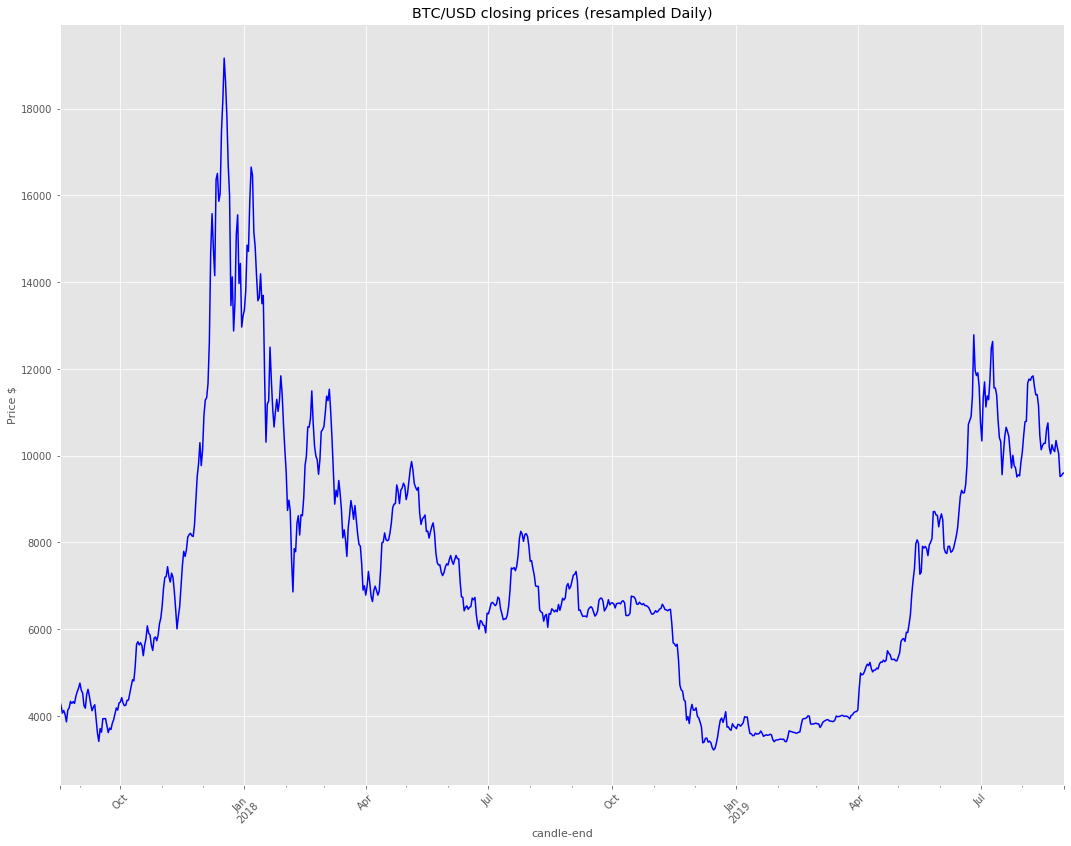

In [13]:
fig = plt.figure(figsize=(18, 14))

ax1 = fig.add_subplot()
ax1.set_xlabel(xlabel='Time', fontsize=11)
ax1.set_ylabel(ylabel='Price $', fontsize=11)

# data is in hourly resolution, so resampling it in daily format to smooth graph
btc_usdt1m['close'].resample('D').mean().plot(ax=ax1, color='blue')

plt.title('BTC/USD closing prices (resampled Daily)')

plt.xticks(rotation=45)

plt.show()

## Backtest: EMA and Price Crossover strategy on BTC / USDT 1h

Starting Portfolio Value: 10000.00
2017-08-23T02:22:59.998995, BUY CREATE , 4119.12
2017-08-23T02:23:59.999002, BUY EXECUTED, Price: 4119.12, Cost: 494.29, Comm 0.49
2017-08-23T02:23:59.999002, Trade id: 1237
2017-08-25T20:00:59.999004, CLOSE LONG , 4261.12 , Wait for Short
2017-08-25T20:01:59.999000, SELL EXECUTED, Price: 4261.12, Cost: 494.29, Comm 0.54
2017-08-25T20:01:59.999000, OPERATION PROFIT, GROSS 170.40, NET 169.37, Acc Balance: 10169.37
2017-08-28T04:35:59.999002, SELL CREATE , 4189.97
2017-08-28T04:36:59.998999, SELL EXECUTED, Price: 4189.97, Cost: -502.80, Comm 0.50
2017-08-28T04:36:59.998999, Trade id: 1238
2017-08-28T07:57:59.999004, CLOSE SHORT , 4297.11 , Wait for Long
2017-08-28T07:58:59.999001, BUY EXECUTED, Price: 4261.90, Cost: -502.80, Comm 0.51
2017-08-28T07:58:59.999001, OPERATION PROFIT, GROSS -86.32, NET -87.33, Acc Balance: 10082.04
2017-08-28T18:42:59.999001, BUY CREATE , 4327.62
2017-08-28T18:43:59.998997, BUY EXECUTED, Price: 4327.62, Cost: 519.31, Comm 0.

2017-10-17T12:11:59.999001, SELL CREATE , 5548.85
2017-10-17T12:12:59.998997, SELL EXECUTED, Price: 5548.77, Cost: -499.39, Comm 0.50
2017-10-17T12:12:59.998997, Trade id: 1258
2017-10-17T18:40:59.998998, CLOSE SHORT , 5649.99 , Wait for Long
2017-10-17T18:41:59.999004, BUY EXECUTED, Price: 5639.96, Cost: -499.39, Comm 0.51
2017-10-17T18:41:59.999004, OPERATION PROFIT, GROSS -82.07, NET -83.08, Acc Balance: 10835.66
2017-10-19T06:23:59.998998, BUY CREATE , 5609.76
2017-10-19T06:24:59.998995, BUY EXECUTED, Price: 5568.00, Cost: 501.12, Comm 0.50
2017-10-19T06:24:59.998995, Trade id: 1259
2017-10-19T07:00:59.998997, CLOSE LONG , 5500.02 , Wait for Short
2017-10-19T07:01:59.999003, SELL EXECUTED, Price: 5500.02, Cost: 501.12, Comm 0.50
2017-10-19T07:01:59.999003, OPERATION PROFIT, GROSS -61.18, NET -62.18, Acc Balance: 10773.48
2017-10-22T11:23:59.999002, SELL CREATE , 5755.03
2017-10-22T11:24:59.998998, SELL EXECUTED, Price: 5755.04, Cost: -517.95, Comm 0.52
2017-10-22T11:24:59.998998, T

2017-12-13T09:13:20.798000, SELL CREATE , 15954.40
2017-12-13T09:14:20.797996, SELL EXECUTED, Price: 15951.00, Cost: -478.53, Comm 0.48
2017-12-13T09:14:20.797996, Trade id: 1278
2017-12-13T12:42:20.797996, CLOSE SHORT , 16102.61 , Wait for Long
2017-12-13T12:43:20.798003, BUY EXECUTED, Price: 16127.80, Cost: -478.53, Comm 0.48
2017-12-13T12:43:20.798003, OPERATION PROFIT, GROSS -53.04, NET -54.00, Acc Balance: 9552.34
2017-12-14T14:23:20.797997, BUY CREATE , 16271.01
2017-12-14T14:24:20.798004, BUY EXECUTED, Price: 16271.01, Cost: 488.13, Comm 0.49
2017-12-14T14:24:20.798004, Trade id: 1279
2017-12-14T15:01:20.798002, CLOSE LONG , 15950.01 , Wait for Short
2017-12-14T15:02:20.797999, SELL EXECUTED, Price: 15950.02, Cost: 488.13, Comm 0.48
2017-12-14T15:02:20.797999, OPERATION PROFIT, GROSS -96.30, NET -97.26, Acc Balance: 9455.08
2017-12-18T22:43:59.999004, SELL CREATE , 18522.36
2017-12-18T22:44:59.999000, SELL EXECUTED, Price: 18522.36, Cost: -555.67, Comm 0.56
2017-12-18T22:44:59.9

2018-01-19T09:55:59.998995, BUY CREATE , 11306.02
2018-01-19T09:56:59.999001, BUY EXECUTED, Price: 11323.99, Cost: 452.96, Comm 0.45
2018-01-19T09:56:59.999001, Trade id: 1299
2018-01-19T14:54:59.999001, CLOSE LONG , 11208.04 , Wait for Short
2018-01-19T14:55:59.998998, SELL EXECUTED, Price: 11215.00, Cost: 452.96, Comm 0.45
2018-01-19T14:55:59.998998, OPERATION PROFIT, GROSS -43.60, NET -44.50, Acc Balance: 8934.12
2018-01-21T16:02:59.999000, SELL CREATE , 11350.00
2018-01-21T16:03:59.998996, SELL EXECUTED, Price: 11350.00, Cost: -454.00, Comm 0.45
2018-01-21T16:03:59.998996, Trade id: 1300
2018-01-22T07:44:59.999000, CLOSE SHORT , 11744.30 , Wait for Long
2018-01-22T07:45:59.998997, BUY EXECUTED, Price: 11744.30, Cost: -454.00, Comm 0.48
2018-01-22T07:45:59.998997, OPERATION PROFIT, GROSS -157.72, NET -158.66, Acc Balance: 8775.46
2018-01-24T13:11:59.998998, BUY CREATE , 11313.81
2018-01-24T13:12:59.999004, BUY EXECUTED, Price: 11300.08, Cost: 452.00, Comm 0.45
2018-01-24T13:12:59.99

2018-03-16T19:22:59.998999, BUY CREATE , 8500.99
2018-03-16T19:23:59.998995, BUY EXECUTED, Price: 8505.00, Cost: 510.30, Comm 0.51
2018-03-16T19:23:59.998995, Trade id: 1319
2018-03-16T23:39:59.998995, CLOSE LONG , 8350.98 , Wait for Short
2018-03-16T23:40:59.999001, SELL EXECUTED, Price: 8345.64, Cost: 510.30, Comm 0.50
2018-03-16T23:40:59.999001, OPERATION PROFIT, GROSS -95.62, NET -96.63, Acc Balance: 10227.99
2018-03-17T02:45:59.999004, SELL CREATE , 8100.00
2018-03-17T02:46:59.999000, SELL EXECUTED, Price: 8100.00, Cost: -486.00, Comm 0.49
2018-03-17T02:46:59.999000, Trade id: 1320
2018-03-17T08:51:59.999002, CLOSE SHORT , 8331.99 , Wait for Long
2018-03-17T08:52:59.998999, BUY EXECUTED, Price: 8331.99, Cost: -486.00, Comm 0.50
2018-03-17T08:52:59.998999, OPERATION PROFIT, GROSS -139.19, NET -140.18, Acc Balance: 10087.81
2018-03-19T03:29:59.998997, BUY CREATE , 8175.08
2018-03-19T03:30:59.999004, BUY EXECUTED, Price: 8175.08, Cost: 490.50, Comm 0.49
2018-03-19T03:30:59.999004, Tr

2018-05-01T23:52:59.998999, CLOSE SHORT , 9109.00 , Wait for Long
2018-05-01T23:53:59.998995, BUY EXECUTED, Price: 9109.00, Cost: -462.05, Comm 0.47
2018-05-01T23:53:59.998995, OPERATION PROFIT, GROSS 66.00, NET 65.07, Acc Balance: 9897.08
2018-05-02T18:21:59.998995, BUY CREATE , 9118.34
2018-05-02T18:22:59.999002, BUY EXECUTED, Price: 9118.34, Cost: 455.92, Comm 0.46
2018-05-02T18:22:59.999002, Trade id: 1343
2018-05-02T19:14:59.998997, CLOSE LONG , 9107.00 , Wait for Short
2018-05-02T19:15:59.999004, SELL EXECUTED, Price: 9103.54, Cost: 455.92, Comm 0.46
2018-05-02T19:15:59.999004, OPERATION PROFIT, GROSS -7.40, NET -8.31, Acc Balance: 9888.77
2018-05-06T11:53:59.998995, SELL CREATE , 9531.06
2018-05-06T11:54:59.999001, SELL EXECUTED, Price: 9531.05, Cost: -476.55, Comm 0.48
2018-05-06T11:54:59.999001, Trade id: 1344
2018-05-07T00:13:59.999004, CLOSE SHORT , 9687.60 , Wait for Long
2018-05-07T00:14:59.999000, BUY EXECUTED, Price: 9687.59, Cost: -476.55, Comm 0.50
2018-05-07T00:14:59.

2018-06-09T20:58:59.998997, CLOSE SHORT , 7628.99 , Wait for Long
2018-06-09T20:59:59.999004, BUY EXECUTED, Price: 7627.02, Cost: -531.30, Comm 0.53
2018-06-09T20:59:59.999004, OPERATION PROFIT, GROSS -25.90, NET -26.97, Acc Balance: 9936.12
2018-06-14T21:40:59.998998, BUY CREATE , 6671.00
2018-06-14T21:41:59.999004, BUY EXECUTED, Price: 6671.01, Cost: 466.97, Comm 0.47
2018-06-14T21:41:59.999004, Trade id: 1363
2018-06-15T11:18:59.998999, CLOSE LONG , 6541.25 , Wait for Short
2018-06-15T11:19:59.998996, SELL EXECUTED, Price: 6532.81, Cost: 466.97, Comm 0.47
2018-06-15T11:19:59.998996, OPERATION PROFIT, GROSS -96.74, NET -97.68, Acc Balance: 9838.45
2018-06-15T20:54:59.999001, SELL CREATE , 6497.28
2018-06-15T20:55:59.998998, SELL EXECUTED, Price: 6497.28, Cost: -519.78, Comm 0.52
2018-06-15T20:55:59.998998, Trade id: 1364
2018-06-16T10:32:59.999003, CLOSE SHORT , 6498.82 , Wait for Long
2018-06-16T10:33:59.998999, BUY EXECUTED, Price: 6492.97, Cost: -519.78, Comm 0.53
2018-06-16T10:33

2018-08-07T14:46:59.999000, BUY CREATE , 7072.00
2018-08-07T14:47:59.998996, BUY EXECUTED, Price: 7072.00, Cost: 495.04, Comm 0.50
2018-08-07T14:47:59.998996, Trade id: 1383
2018-08-07T19:51:59.998995, CLOSE LONG , 7037.01 , Wait for Short
2018-08-07T19:52:59.999002, SELL EXECUTED, Price: 7037.90, Cost: 495.04, Comm 0.49
2018-08-07T19:52:59.999002, OPERATION PROFIT, GROSS -23.87, NET -24.86, Acc Balance: 9626.20
2018-08-07T21:21:59.998995, SELL CREATE , 6705.68
2018-08-07T21:22:59.999002, SELL EXECUTED, Price: 6705.68, Cost: -469.40, Comm 0.47
2018-08-07T21:22:59.999002, Trade id: 1384
2018-08-09T14:57:59.999001, CLOSE SHORT , 6520.00 , Wait for Long
2018-08-09T14:58:59.998997, BUY EXECUTED, Price: 6520.01, Cost: -469.40, Comm 0.48
2018-08-09T14:58:59.998997, OPERATION PROFIT, GROSS 129.97, NET 129.02, Acc Balance: 9755.22
2018-08-12T10:04:59.999003, BUY CREATE , 6314.09
2018-08-12T10:05:59.998999, BUY EXECUTED, Price: 6314.07, Cost: 505.13, Comm 0.51
2018-08-12T10:05:59.998999, Trade 

2018-09-17T04:16:59.999000, CLOSE LONG , 6493.18 , Wait for Short
2018-09-17T04:17:59.998996, SELL EXECUTED, Price: 6498.28, Cost: 455.09, Comm 0.47
2018-09-17T04:17:59.998996, OPERATION PROFIT, GROSS -2.11, NET -3.03, Acc Balance: 9719.73
2018-09-17T08:26:59.999001, SELL CREATE , 6471.97
2018-09-17T08:27:59.998997, SELL EXECUTED, Price: 6471.56, Cost: -517.72, Comm 0.52
2018-09-17T08:27:59.998997, Trade id: 1406
2018-09-17T09:28:59.999001, CLOSE SHORT , 6493.11 , Wait for Long
2018-09-17T09:29:59.998997, BUY EXECUTED, Price: 6493.11, Cost: -517.72, Comm 0.52
2018-09-17T09:29:59.998997, OPERATION PROFIT, GROSS -17.24, NET -18.28, Acc Balance: 9701.46
2018-09-19T21:45:59.999000, BUY CREATE , 6412.98
2018-09-19T21:46:59.998997, BUY EXECUTED, Price: 6412.99, Cost: 513.04, Comm 0.51
2018-09-19T21:46:59.998997, Trade id: 1407
2018-09-20T20:35:59.998999, CLOSE LONG , 6379.99 , Wait for Short
2018-09-20T20:36:59.998995, SELL EXECUTED, Price: 6375.24, Cost: 513.04, Comm 0.52
2018-09-20T20:36:5

2018-10-23T01:19:59.998999, CLOSE SHORT , 6594.45 , Wait for Long
2018-10-23T01:20:59.998996, BUY EXECUTED, Price: 6594.44, Cost: -460.81, Comm 0.47
2018-10-23T01:20:59.998996, OPERATION PROFIT, GROSS -8.01, NET -8.94, Acc Balance: 9510.37
2018-10-24T07:25:59.998998, BUY CREATE , 6605.02
2018-10-24T07:26:59.999004, BUY EXECUTED, Price: 6605.02, Cost: 462.35, Comm 0.46
2018-10-24T07:26:59.999004, Trade id: 1427
2018-10-24T15:16:59.999003, CLOSE LONG , 6586.41 , Wait for Short
2018-10-24T15:17:59.999000, SELL EXECUTED, Price: 6586.41, Cost: 462.35, Comm 0.46
2018-10-24T15:17:59.999000, OPERATION PROFIT, GROSS -13.03, NET -13.95, Acc Balance: 9496.42
2018-10-25T00:07:59.998995, SELL CREATE , 6562.68
2018-10-25T00:08:59.999002, SELL EXECUTED, Price: 6562.68, Cost: -459.39, Comm 0.46
2018-10-25T00:08:59.999002, Trade id: 1428
2018-10-25T13:45:59.998997, CLOSE SHORT , 6569.00 , Wait for Long
2018-10-25T13:46:59.999003, BUY EXECUTED, Price: 6568.67, Cost: -459.39, Comm 0.46
2018-10-25T13:46:5

2018-12-23T00:44:59.999004, BUY CREATE , 3961.32
2018-12-23T00:45:59.999000, BUY EXECUTED, Price: 3961.31, Cost: 514.97, Comm 0.51
2018-12-23T00:45:59.999000, Trade id: 1447
2018-12-23T15:00:59.999000, CLOSE LONG , 3913.12 , Wait for Short
2018-12-23T15:01:59.998997, SELL EXECUTED, Price: 3913.12, Cost: 514.97, Comm 0.51
2018-12-23T15:01:59.998997, OPERATION PROFIT, GROSS -62.65, NET -63.67, Acc Balance: 10412.50
2018-12-25T02:10:59.998998, SELL CREATE , 3815.38
2018-12-25T02:11:59.999004, SELL EXECUTED, Price: 3814.24, Cost: -495.85, Comm 0.50
2018-12-25T02:11:59.999004, Trade id: 1448
2018-12-26T19:32:59.999003, CLOSE SHORT , 3786.51 , Wait for Long
2018-12-26T19:33:59.998999, BUY EXECUTED, Price: 3788.48, Cost: -495.85, Comm 0.51
2018-12-26T19:33:59.998999, OPERATION PROFIT, GROSS 33.49, NET 32.49, Acc Balance: 10444.99
2018-12-28T19:37:59.998995, BUY CREATE , 3850.00
2018-12-28T19:38:59.999002, BUY EXECUTED, Price: 3847.67, Cost: 500.20, Comm 0.50
2018-12-28T19:38:59.999002, Trade 

2019-01-25T05:13:59.998997, CLOSE LONG , 3560.09 , Wait for Short
2019-01-25T05:14:59.999004, SELL EXECUTED, Price: 3560.09, Cost: 500.95, Comm 0.51
2019-01-25T05:14:59.999004, OPERATION PROFIT, GROSS -25.37, NET -26.38, Acc Balance: 10355.73
2019-01-25T12:37:59.998999, SELL CREATE , 3543.31
2019-01-25T12:38:59.998995, SELL EXECUTED, Price: 3543.64, Cost: -496.11, Comm 0.50
2019-01-25T12:38:59.998995, Trade id: 1468
2019-01-25T14:47:59.998996, CLOSE SHORT , 3558.87 , Wait for Long
2019-01-25T14:48:59.999003, BUY EXECUTED, Price: 3558.87, Cost: -496.11, Comm 0.50
2019-01-25T14:48:59.999003, OPERATION PROFIT, GROSS -21.32, NET -22.32, Acc Balance: 10333.41
2019-01-25T23:06:59.999002, BUY CREATE , 3568.72
2019-01-25T23:07:59.998999, BUY EXECUTED, Price: 3568.72, Cost: 499.62, Comm 0.50
2019-01-25T23:07:59.998999, Trade id: 1469
2019-01-26T15:28:59.999001, CLOSE LONG , 3560.58 , Wait for Short
2019-01-26T15:29:59.998997, SELL EXECUTED, Price: 3558.98, Cost: 499.62, Comm 0.51
2019-01-26T15:

2019-03-08T22:00:59.998997, CLOSE LONG , 3879.18 , Wait for Short
2019-03-08T22:01:59.999003, SELL EXECUTED, Price: 3879.18, Cost: 498.55, Comm 0.55
2019-03-08T22:01:59.999003, OPERATION PROFIT, GROSS 57.41, NET 56.36, Acc Balance: 10296.60
2019-03-11T08:54:59.999001, SELL CREATE , 3891.00
2019-03-11T08:55:59.998998, SELL EXECUTED, Price: 3891.00, Cost: -505.83, Comm 0.51
2019-03-11T08:55:59.998998, Trade id: 1488
2019-03-12T09:30:59.999004, CLOSE SHORT , 3889.16 , Wait for Long
2019-03-12T09:31:59.999000, BUY EXECUTED, Price: 3889.16, Cost: -505.83, Comm 0.52
2019-03-12T09:31:59.999000, OPERATION PROFIT, GROSS 2.39, NET 1.37, Acc Balance: 10297.97
2019-03-15T00:12:59.998997, BUY CREATE , 3879.38
2019-03-15T00:13:59.999004, BUY EXECUTED, Price: 3879.43, Cost: 504.33, Comm 0.50
2019-03-15T00:13:59.999004, Trade id: 1489
2019-03-17T02:23:59.999002, CLOSE LONG , 3963.13 , Wait for Short
2019-03-17T02:24:59.998998, SELL EXECUTED, Price: 3961.53, Cost: 504.33, Comm 0.54
2019-03-17T02:24:59.

2019-05-07T23:52:59.998999, CLOSE LONG , 5843.98 , Wait for Short
2019-05-07T23:53:59.998995, SELL EXECUTED, Price: 5841.67, Cost: 521.22, Comm 0.54
2019-05-07T23:53:59.998995, OPERATION PROFIT, GROSS 45.26, NET 44.20, Acc Balance: 10386.72
2019-05-17T00:30:59.999004, SELL CREATE , 7878.71
2019-05-17T00:31:59.999000, SELL EXECUTED, Price: 7877.53, Cost: -472.65, Comm 0.47
2019-05-17T00:31:59.999000, Trade id: 1508
2019-05-19T01:11:59.998998, CLOSE SHORT , 7376.12 , Wait for Long
2019-05-19T01:12:59.999004, BUY EXECUTED, Price: 7374.57, Cost: -472.65, Comm 0.47
2019-05-19T01:12:59.999004, OPERATION PROFIT, GROSS 301.78, NET 300.83, Acc Balance: 10687.56
2019-05-19T03:53:59.999002, BUY CREATE , 7923.42
2019-05-19T03:54:59.998998, BUY EXECUTED, Price: 7923.42, Cost: 475.41, Comm 0.48
2019-05-19T03:54:59.998998, Trade id: 1509
2019-05-20T12:33:59.999003, CLOSE LONG , 7801.72 , Wait for Short
2019-05-20T12:34:59.998999, SELL EXECUTED, Price: 7803.73, Cost: 475.41, Comm 0.48
2019-05-20T12:34

2019-06-29T08:37:59.999002, SELL CREATE , 11723.53
2019-06-29T08:38:59.998998, SELL EXECUTED, Price: 11726.33, Cost: -469.05, Comm 0.47
2019-06-29T08:38:59.998998, Trade id: 1528
2019-06-29T10:51:59.998995, CLOSE SHORT , 11897.80 , Wait for Long
2019-06-29T10:52:59.999002, BUY EXECUTED, Price: 11897.80, Cost: -469.05, Comm 0.48
2019-06-29T10:52:59.999002, OPERATION PROFIT, GROSS -68.59, NET -69.53, Acc Balance: 9570.11
2019-06-29T13:18:59.999003, BUY CREATE , 12073.90
2019-06-29T13:19:59.998999, BUY EXECUTED, Price: 12072.93, Cost: 482.92, Comm 0.48
2019-06-29T13:19:59.998999, Trade id: 1529
2019-06-29T14:11:59.999004, CLOSE LONG , 11900.00 , Wait for Short
2019-06-29T14:12:59.999001, SELL EXECUTED, Price: 11900.01, Cost: 482.92, Comm 0.48
2019-06-29T14:12:59.999001, OPERATION PROFIT, GROSS -69.17, NET -70.13, Acc Balance: 9499.99
2019-06-30T10:21:59.999002, SELL CREATE , 11664.47
2019-06-30T10:22:59.998999, SELL EXECUTED, Price: 11664.53, Cost: -466.58, Comm 0.47
2019-06-30T10:22:59.9

2019-08-10T12:04:59.998996, SELL CREATE , 11394.30
2019-08-10T12:05:59.999002, SELL EXECUTED, Price: 11394.02, Cost: -455.76, Comm 0.46
2019-08-10T12:05:59.999002, Trade id: 1548
2019-08-11T21:36:59.999002, CLOSE SHORT , 11511.17 , Wait for Long
2019-08-11T21:37:59.998999, BUY EXECUTED, Price: 11511.14, Cost: -455.76, Comm 0.47
2019-08-11T21:37:59.998999, OPERATION PROFIT, GROSS -46.85, NET -47.78, Acc Balance: 9050.71
2019-08-17T09:05:59.999002, BUY CREATE , 10369.03
2019-08-17T09:06:59.998999, BUY EXECUTED, Price: 10369.98, Cost: 414.80, Comm 0.41
2019-08-17T09:06:59.998999, Trade id: 1549
2019-08-17T11:48:59.999003, CLOSE LONG , 10335.51 , Wait for Short
2019-08-17T11:49:59.998999, SELL EXECUTED, Price: 10331.38, Cost: 414.80, Comm 0.41
2019-08-17T11:49:59.998999, OPERATION PROFIT, GROSS -15.44, NET -16.27, Acc Balance: 9034.44
2019-08-17T17:23:59.999002, SELL CREATE , 10129.79
2019-08-17T17:24:59.998998, SELL EXECUTED, Price: 10142.72, Cost: -405.71, Comm 0.41
2019-08-17T17:24:59.9

<IPython.core.display.Javascript object>


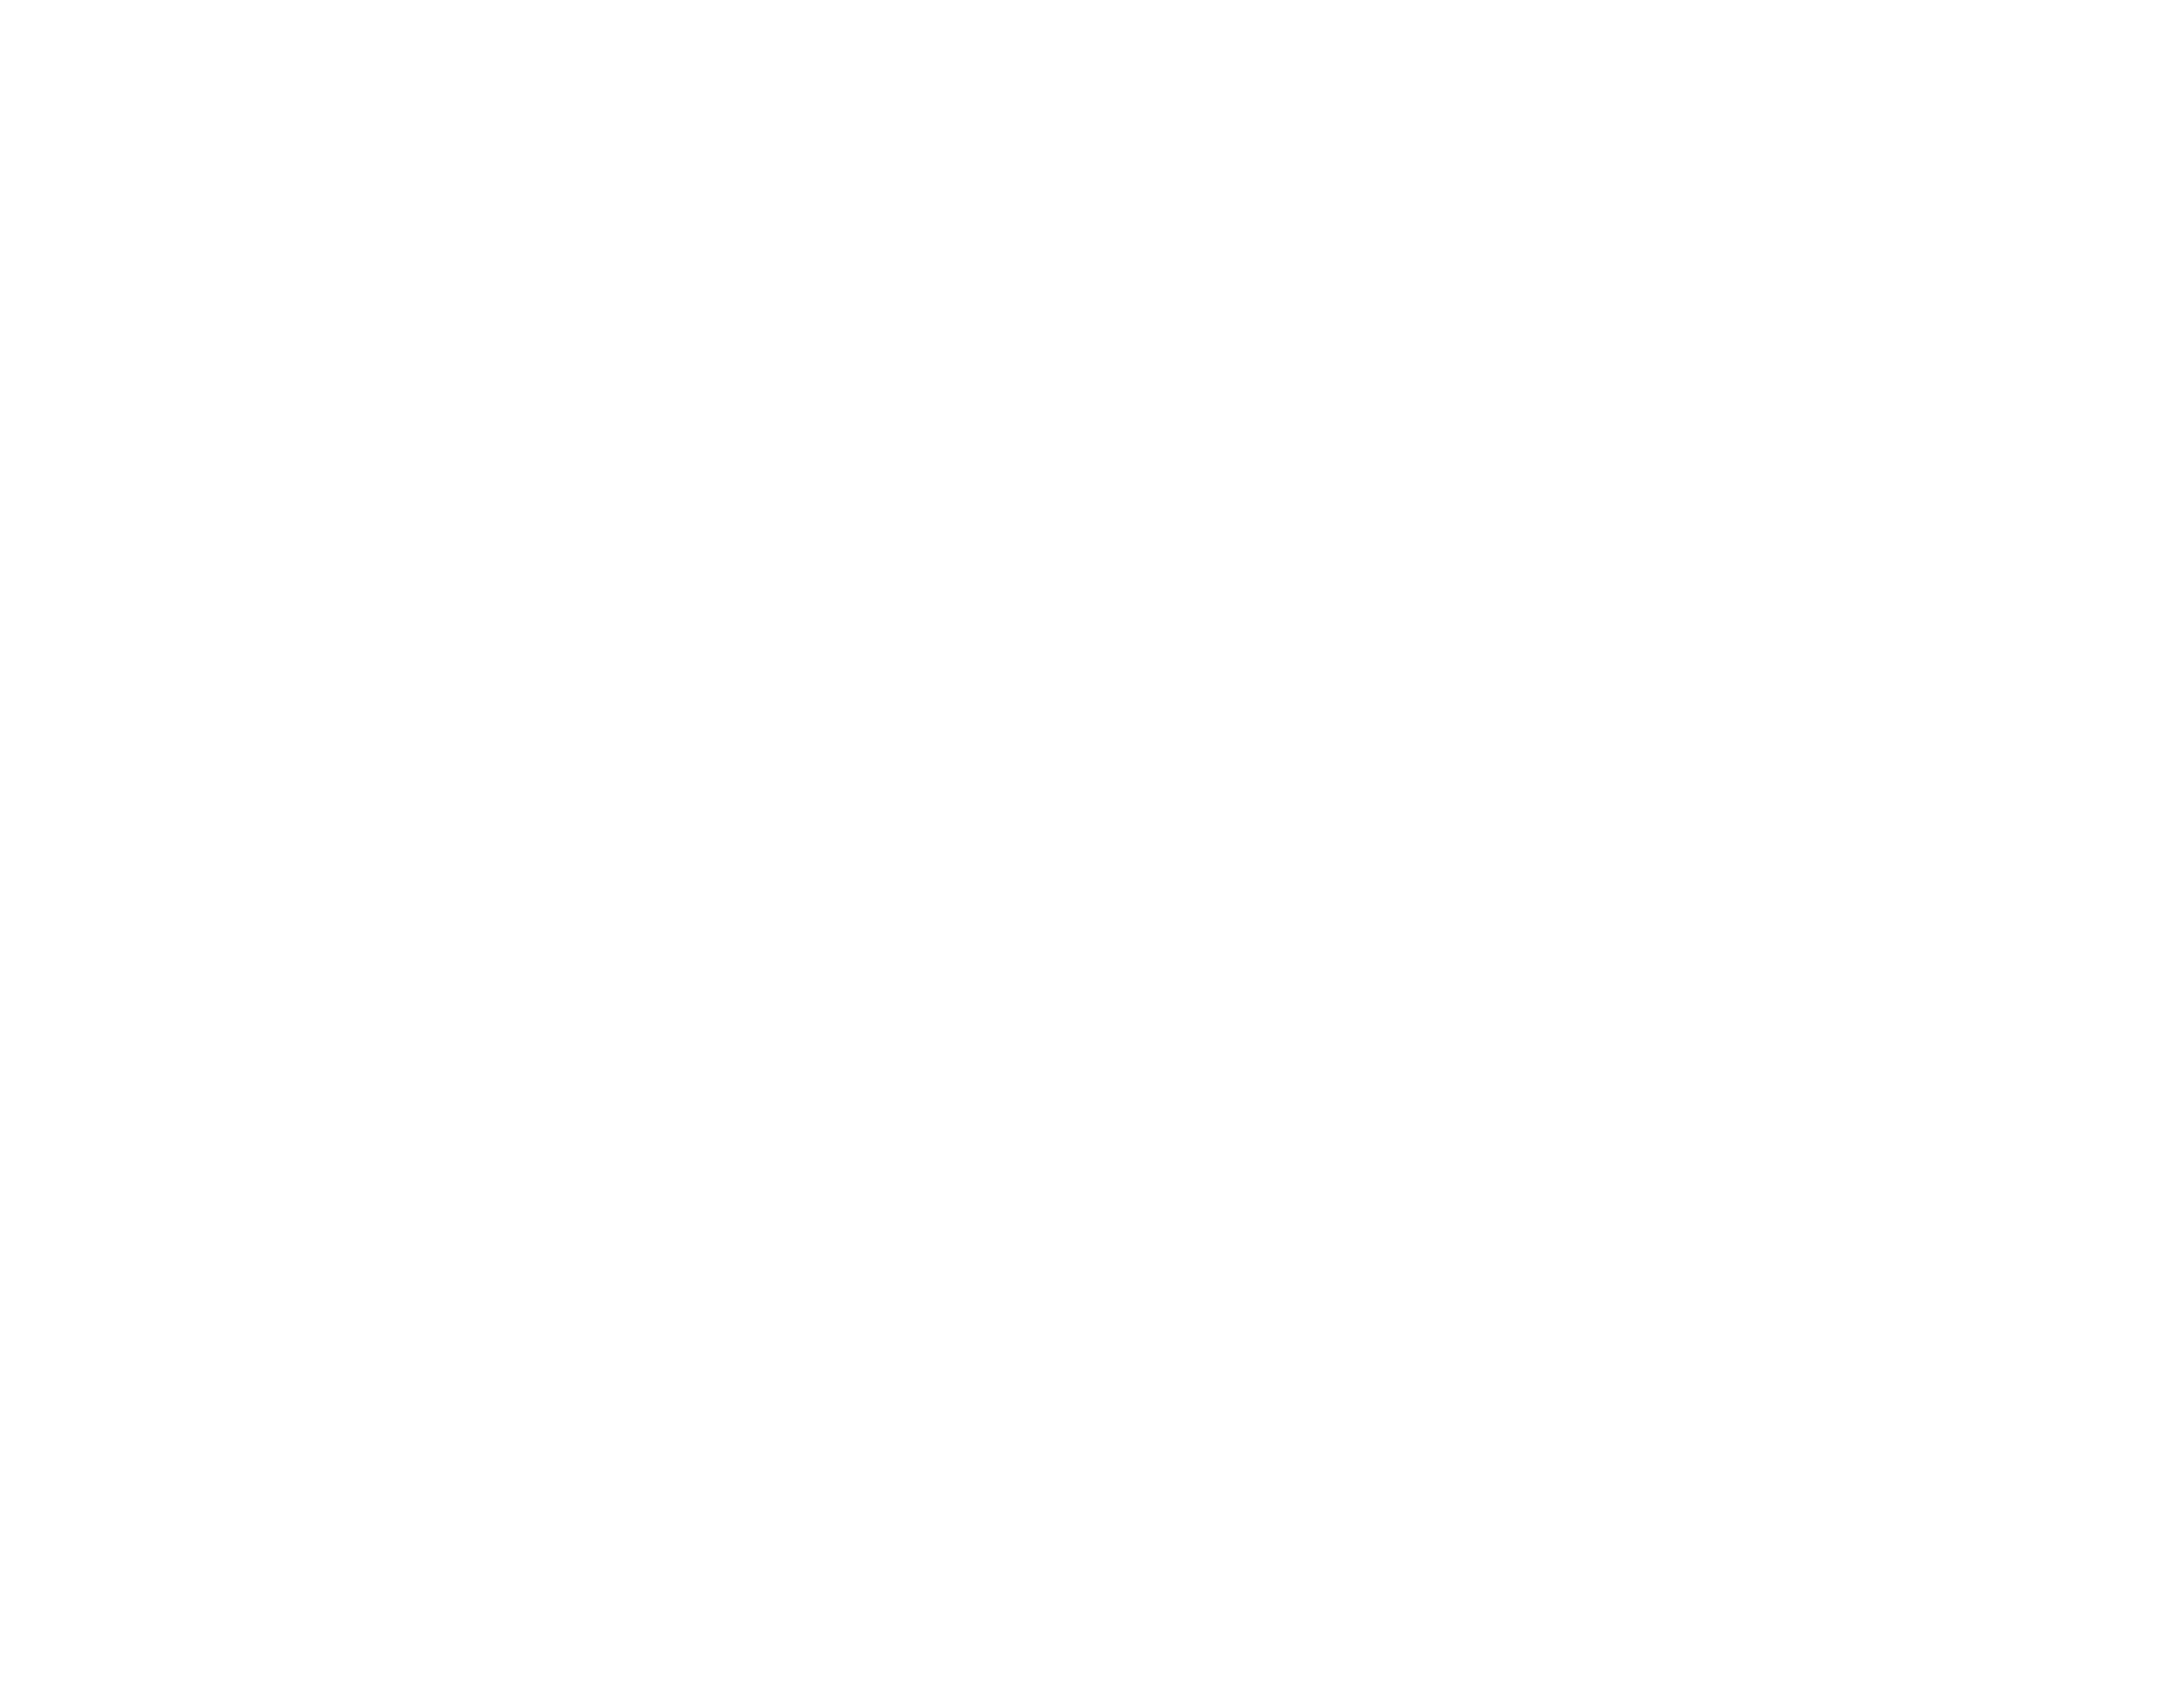

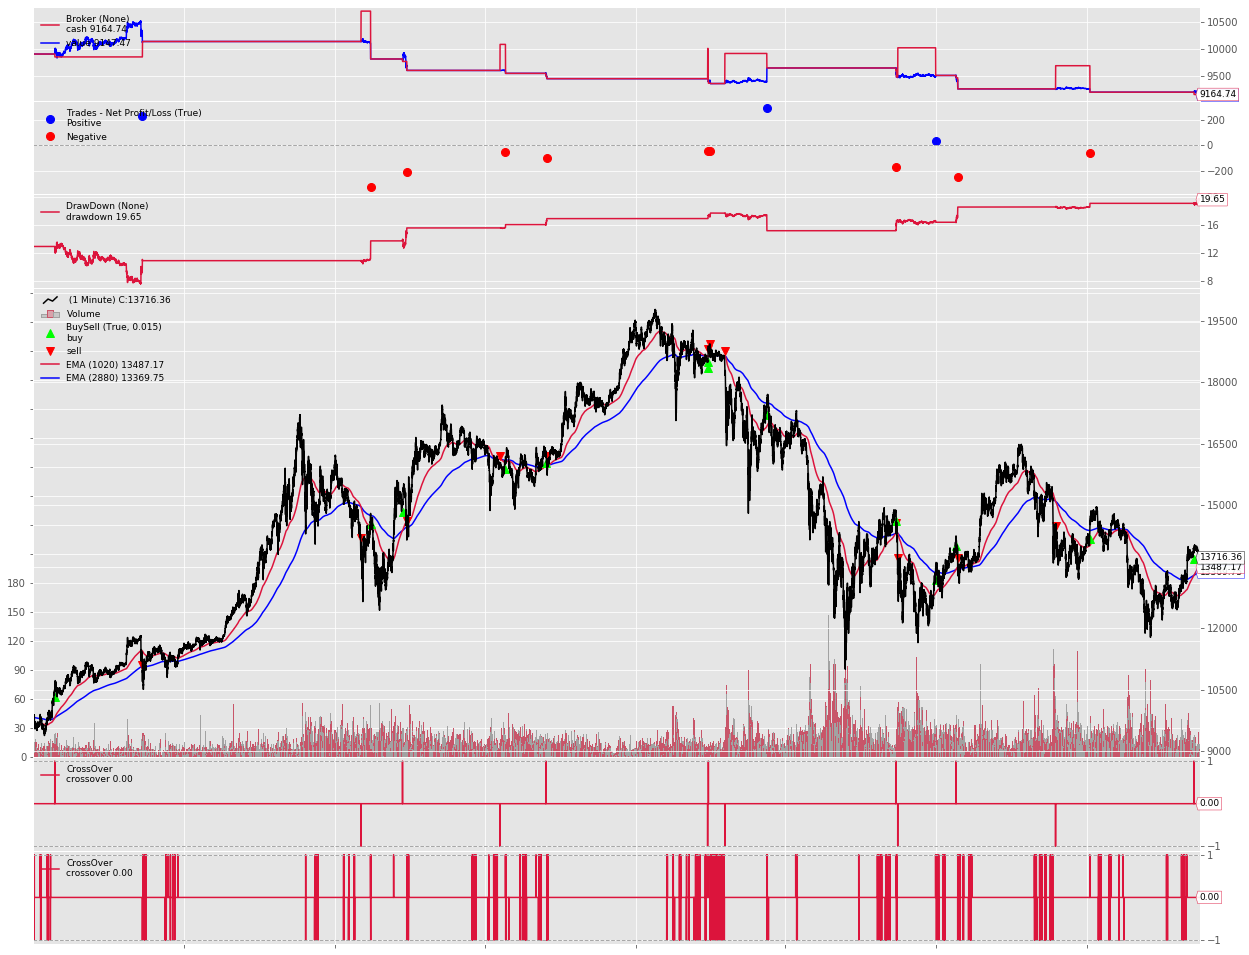

In [30]:
# Backtest for EMA and Price Crossover on BTC / USDT

# Create a Stratey
class TestStrategy(bt.Strategy):
    params = (
        ('short_ema', 1020),
        ('long_ema', 2880),
        ('mult', 10),  # multiply profits and loses (margin trading)
        ('lever', 10),
        ('printlog', True),
        ('trailstoppct', 0.05),  # trailstop order trail 0.05 = 5%
    )
    

    def log(self, txt, dt=None, doprint=False):
        ''' Logging function fot this strategy'''
        if self.params.printlog or doprint:
            dt = dt or self.data.datetime[0]
            dt = bt.num2date(dt)
            print('%s, %s' % (dt.isoformat(), txt))


    def __init__(self):
        # Keep a reference to the "close" line in the data[0] dataseries
        self.dataclose = self.datas[0].close

        # To keep track of pending orders and buy price/commission
        self.order = None
        self.buyprice = None
        self.buycomm = None

        # Add exponential moving averages
        ema_short = bt.ind.EMA(period=self.params.short_ema)
        ema_long = bt.ind.EMA(period=self.params.long_ema)
        
        self.crossover = bt.ind.CrossOver(ema_short, ema_long)
        self.pricecrossover = bt.ind.CrossOver(self.datas[0].close, ema_long)
        
        self.wait_to_enter = ''


    def next(self):
        
        # Simply log the closing price of the series from the reference
        # self.log('Close, %.2f' % self.dataclose[0])
        
        # if an order is active, no new orders are allowed
        if self.order:
            return   
        
        # if position is not opened
        if not self.position:
            
            # if signal is go long - cross upwards
            if self.crossover > 0:
                
                # if we are waiting for a Short signal
                if self.wait_to_enter == 'wait_for_short':
                    return
                
                else: # BUY BUY BUY
                    self.log('BUY CREATE , %.2f' % self.dataclose[0])
                    self.wait_to_enter = ''
                    # to make orders at 5% of portfolio value, no more than 500$
                    self.order = self.buy(size=round(min((cerebro.broker.getvalue()*0.05),
                                                         500) / self.dataclose[0], 2))
                            # exectype=bt.Order.StopTrail, trailpercent=self.params.trailstoppct)
            
            # if signal is go short - cross downwards
            elif self.crossover < 0:
                
                # if we are waiting for a Long signal
                if self.wait_to_enter == 'wait_for_long':
                    return

                else:  # SELL SELL SELL
                    self.log('SELL CREATE , %.2f' % self.dataclose[0])
                    self.wait_to_enter = ''
                    # to make orders at 5% of portfolio value, no more than 500$
                    self.order = self.sell(size=round(min((cerebro.broker.getvalue()*0.05),
                                             500) / self.dataclose[0], 2))
                             # exectype=bt.Order.StopTrail, trailpercent=self.params.trailstoppct)
        
        # if we are in the market:
        elif self.position:
            # if price signals close short == -1
            if self.pricecrossover > 0:
                self.log('CLOSE SHORT , %.2f , Wait for Long' % self.dataclose[0])
                self.wait_to_enter = 'wait_for_long'
                self.order = self.close()
            
            # if price signals close long == 1
            elif self.pricecrossover < 0:
                self.log('CLOSE LONG , %.2f , Wait for Short' % self.dataclose[0])
                self.wait_to_enter = 'wait_for_short'
                self.order = self.close()

                
                
    def notify_order(self, order):
        if order.status in [order.Submitted, order.Accepted]:
            # Buy/Sell order submitted/accepted to/by broker - Nothing to do
            return

        # Check if an order has been completed
        # Attention: broker could reject order if not enough cash
        if order.status in [order.Completed]:
            
            if order.isbuy():
                self.log('BUY EXECUTED, Price: %.2f, Cost: %.2f, Comm %.2f' %
                         (order.executed.price,
                          order.executed.value,
                          order.executed.comm)
                         )

                self.buyprice = order.executed.price
                self.buycomm = order.executed.comm
            
            elif order.issell():
                self.log('SELL EXECUTED, Price: %.2f, Cost: %.2f, Comm %.2f' %
                         (order.executed.price,
                          order.executed.value,
                          order.executed.comm)
                        )

            self.bar_executed = len(self)

        elif order.status in [order.Canceled, order.Margin, order.Rejected]:
            self.log('Order Canceled/Margin/Rejected', doprint=True)

        # Write down: no pending order
        self.order = None


    def notify_trade(self, trade):
        if trade.isopen:
            self.log('Trade id: {}'.format(trade.ref))
        
        elif trade.isclosed:
            self.log('OPERATION PROFIT, GROSS %.2f, NET %.2f, Acc Balance: %.2f' %
                 (trade.pnl, trade.pnlcomm, cerebro.broker.getvalue()))
        
        elif trade.justopened:
            self.log('TRADE OPENED, SIZE: %2d , VAL: %.2f' % (trade.size, trade.value))


if __name__ == '__main__':
    # Create a cerebro entity
    cerebro = bt.Cerebro()
    
    # Add a strategy
    cerebro.addstrategy(TestStrategy)
    
    # timeframe and compression tells the system we have hourly data
    data = bt.feeds.PandasData(dataname=btc_usdt1m,
                               timeframe=bt.TimeFrame.Minutes,
                               compression=1)

    # Add the Data Feed to Cerebro
    cerebro.adddata(data)

    # Set our desired cash start
    cerebro.broker.setcash(10000.0)  # 10,000

    # Set the commission
    cerebro.broker.setcommission(commission=0.001,  # 0.1% binance commission
                                 mult=TestStrategy.params.mult,
                                 interest=0.01,  # long/short interest 0.01 -> 1%
                                 leverage=TestStrategy.params.lever,
                                 interest_long=True
                                 )
    
    print("Starting Portfolio Value: %.2f" % cerebro.broker.getvalue())

    # Create Analyzers
    # RF = 1%, 
    cerebro.addanalyzer(bt.analyzers.SharpeRatio_A, _name='mysharpe')
    cerebro.addanalyzer(bt.analyzers.DrawDown, _name='mydrawdown')
    cerebro.addanalyzer(bt.analyzers.Returns, _name='returns')
    cerebro.addanalyzer(bt.analyzers.TradeAnalyzer, _name='mytradeanal')
    cerebro.addanalyzer(bt.analyzers.BasicTradeStats , _name='tradestats')
    cerebro.addanalyzer(bt.analyzers.AnnualReturn, _name='annreturn')
    cerebro.addanalyzer(bt.analyzers.SQN, _name='sqn')
    
    # Create Observers
    cerebro.addobserver(bt.observers.DrawDown)

    # Run over everything
    thestrats = cerebro.run()
    thestrat = thestrats[0]
    
    # Print Analyzers
    print()
    print('Annual return:', thestrat.analyzers.annreturn.get_analysis())
    print()
    print('SQN: ', thestrat.analyzers.sqn.get_analysis())
    print()
    print("Final Portfolio Value: %.2f" % cerebro.broker.getvalue())
    print()
    print('Annualised SharpeR:', thestrat.analyzers.mysharpe.get_analysis()['sharperatio'])
    print()
    # CAGR = (end bal / beg bal) ^ 1/n of years - 1
    print('CAGR % ', ((cerebro.broker.getvalue() / 10000) ** 0.5 - 1) * 100)
    print()
    printTradeAnalysis(thestrat.analyzers.mytradeanal.get_analysis())
    print()
    printDrawDown(thestrat.analyzers.mydrawdown.get_analysis())
    print()
    pprint.pprint(dict(thestrat.analyzers.tradestats.get_analysis()))
    
    # to plot part of the data
    cerebro.plot(start=datetime.date(2017, 12, 1), end=datetime.date(2018, 1, 1))
    
    # cerebro.plot()  # plot backtest

## Optimise parameters for EMA and Price Crossover

In [19]:
# Parameter optimisation for EMA and Price Crossover on BTC / USDT

# Create a Stratey
class TestStrategy(bt.Strategy):
    params = (
        ('short_ema', 17),
        ('long_ema', 48),
        ('mult', 10),
        ('lever', 10),
        ('printlog', False),
        ('trailstoppct', 0.05),  # trailstop order trail 0.05 = 5%
    )


    def log(self, txt, dt=None, doprint=False):
        ''' Logging function fot this strategy'''
        if self.params.printlog or doprint:
            dt = dt or self.data.datetime[0]
            dt = bt.num2date(dt)
            print('%s, %s' % (dt.isoformat(), txt))


    def __init__(self):
        # Keep a reference to the "close" line in the data[0] dataseries
        self.dataclose = self.datas[0].close

        # To keep track of pending orders and buy price/commission
        self.order = None
        self.buyprice = None
        self.buycomm = None

        # Add exponential moving averages
        ema_short = bt.ind.EMA(period=self.params.short_ema)
        ema_long = bt.ind.EMA(period=self.params.long_ema)
        
        self.crossover = bt.ind.CrossOver(ema_short, ema_long)
        self.pricecrossover = bt.ind.CrossOver(self.datas[0].close, ema_long)
        
        self.wait_to_enter = ''


    def next(self):
        
        # Simply log the closing price of the series from the reference
        # self.log('Close, %.2f' % self.dataclose[0])
        
        # if an order is active, no new orders are allowed
        if self.order:
            return   
        
        # if position is not opened
        if not self.position:
            
            # if signal is go long - cross upwards
            if self.crossover > 0:
                
                # if we are waiting for a Short signal
                if self.wait_to_enter == 'wait_for_short':
                    return
                
                else: # BUY BUY BUY
                    self.log('BUY CREATE , %.2f' % self.dataclose[0])
                    self.wait_to_enter = ''
                    # to make orders at 5% of portfolio value, no more than 500$
                    self.order = self.buy(size=round(min((cerebro.broker.getvalue()*0.05),
                                                         500) / self.dataclose[0], 2))
                            # exectype=bt.Order.StopTrail, trailpercent=self.params.trailstoppct)
            
            # if signal is go short - cross downwards
            elif self.crossover < 0:
                
                # if we are waiting for a Long signal
                if self.wait_to_enter == 'wait_for_long':
                    return

                else:  # SELL SELL SELL
                    self.log('SELL CREATE , %.2f' % self.dataclose[0])
                    self.wait_to_enter = ''
                    # to make orders at 5% of portfolio value, no more than 500$
                    self.order = self.sell(size=round(min((cerebro.broker.getvalue()*0.05),
                                             500) / self.dataclose[0], 2))
                             # exectype=bt.Order.StopTrail, trailpercent=self.params.trailstoppct)
        
        # if we are in the market:
        elif self.position:
            # if price signals close short == -1
            if self.pricecrossover > 0:
                self.log('CLOSE SHORT , %.2f , Wait for Long' % self.dataclose[0])
                self.wait_to_enter = 'wait_for_long'
                self.order = self.close()
            
            # if price signals close long == 1
            elif self.pricecrossover < 0:
                self.log('CLOSE LONG , %.2f , Wait for Short' % self.dataclose[0])
                self.wait_to_enter = 'wait_for_short'
                self.order = self.close()


    def notify_order(self, order):
        if order.status in [order.Submitted, order.Accepted]:
            # Buy/Sell order submitted/accepted to/by broker - Nothing to do
            return

        # Check if an order has been completed
        # Attention: broker could reject order if not enough cash
        if order.status in [order.Completed]:
            
            if order.isbuy():
                self.log('BUY EXECUTED, Price: %.2f, Cost: %.2f, Comm %.2f' %
                         (order.executed.price,
                          order.executed.value,
                          order.executed.comm)
                         )

                self.buyprice = order.executed.price
                self.buycomm = order.executed.comm
            
            elif order.issell():
                self.log('SELL EXECUTED, Price: %.2f, Cost: %.2f, Comm %.2f' %
                         (order.executed.price,
                          order.executed.value,
                          order.executed.comm)
                        )

            self.bar_executed = len(self)

        elif order.status in [order.Canceled, order.Margin, order.Rejected]:
            self.log('Order Canceled/Margin/Rejected', doprint=True)

        # Write down: no pending order
        self.order = None


    def notify_trade(self, trade):
        if trade.isclosed:
            self.log('OPERATION PROFIT, GROSS %.2f, NET %.2f, Acc Balance: %.2f' %
                 (trade.pnl, trade.pnlcomm, cerebro.broker.getvalue()))
        
        elif trade.justopened:
            self.log('TRADE OPENED, SIZE: %2d , VAL: %.2f' % (trade.size, trade.value))
    
    
#     UNCOMMENT TO OPTIMISE
    def stop(self):
        self.log('(Short EMA %2d), (Long EMA: %2d) Ending Value %.2f' %
                 (self.params.short_ema, self.params.long_ema, self.broker.getvalue()),
                 doprint=True)


if __name__ == '__main__':
    # Create a cerebro entity
    cerebro = bt.Cerebro()
    
    # Add a strategy
    strats = cerebro.optstrategy(
        TestStrategy,
        short_ema=range(15, 21),
        long_ema=range(45, 51))
    
    # timeframe and compression tells the system we have hourly data
    data = bt.feeds.PandasData(dataname=btc_usdt1h,
                               timeframe=bt.TimeFrame.Minutes,
                               compression=60)

    # Add the Data Feed to Cerebro
    cerebro.adddata(data)

    # Set our desired cash start
    cerebro.broker.setcash(10000.0)  # 10,000

    # Add a Percentage sizer - set to 5% of portfolio value
    # cerebro.addsizer(bt.sizers.PercentSizer, percents=5)
    # cerebro.addsizer(bt.sizers.FixedSize)

    # Set the commission
    cerebro.broker.setcommission(commission=0.001,  # 0.1% binance commission
                                 mult=TestStrategy.params.mult,
                                 interest=0.01,  # long/short interest 0.01 -> 1%
                                 leverage=TestStrategy.params.lever,
                                 interest_long=True
                                 )
    
    print("Starting Portfolio Value: %.2f" % cerebro.broker.getvalue())

    # Run over everything
    thestrats = cerebro.run(maxcpus=2)  # OPTIMIZE
    thestrat = thestrats[0]


Starting Portfolio Value: 10000.00
2019-08-21T14:59:59.999004, (Short EMA 15), (Long EMA: 45) Ending Value 8960.36
2019-08-21T14:59:59.999004, (Short EMA 15), (Long EMA: 46) Ending Value 8133.69
2019-08-21T14:59:59.999004, (Short EMA 15), (Long EMA: 47) Ending Value 10146.28
2019-08-21T14:59:59.999004, (Short EMA 15), (Long EMA: 48) Ending Value 9880.26
2019-08-21T14:59:59.999004, (Short EMA 15), (Long EMA: 50) Ending Value 7554.54
2019-08-21T14:59:59.999004, (Short EMA 15), (Long EMA: 49) Ending Value 10122.25
2019-08-21T14:59:59.999004, (Short EMA 16), (Long EMA: 45) Ending Value 9992.62
2019-08-21T14:59:59.999004, (Short EMA 16), (Long EMA: 46) Ending Value 10671.48
2019-08-21T14:59:59.999004, (Short EMA 16), (Long EMA: 47) Ending Value 10708.45
2019-08-21T14:59:59.999004, (Short EMA 16), (Long EMA: 48) Ending Value 10389.72
2019-08-21T14:59:59.999004, (Short EMA 16), (Long EMA: 49) Ending Value 8735.38
2019-08-21T14:59:59.999004, (Short EMA 16), (Long EMA: 50) Ending Value 7679.09


EMAs (20 and 46) returned the best result (12k) followed by EMAs 20-47 and 20-49

## Backtest Simple EMA crossover strategy

Starting Portfolio Value: 10000.00
2017-08-23T01:59:59.998997, BUY CREATE , 4100.00
2017-08-23T02:59:59.999004, BUY EXECUTED, Price: 4101.53, Cost: 492.18, Comm 0.49
2017-08-23T02:59:59.999004, TRADE OPENED, SIZE:  0 , VAL: 492.18
2017-08-28T04:59:59.998997, CLOSE LONG , 4227.00
2017-08-28T04:59:59.998997, SELL CREATE , 4227.00
2017-08-28T05:59:59.999004, SELL EXECUTED, Price: 4251.92, Cost: 492.18, Comm 0.58
2017-08-28T05:59:59.999004, SELL EXECUTED, Price: 4251.92, Cost: -510.23, Comm 0.51
2017-08-28T05:59:59.999004, OPERATION PROFIT, GROSS 180.47, NET 179.40, Acc Balance: 10188.84
2017-08-28T05:59:59.999004, TRADE OPENED, SIZE:  0 , VAL: -510.23
2017-08-28T19:59:59.998997, CLOSE SHORT , 4321.65
2017-08-28T19:59:59.998997, BUY CREATE , 4321.65
2017-08-28T20:59:59.999004, BUY EXECUTED, Price: 4321.65, Cost: -510.23, Comm 0.52
2017-08-28T20:59:59.999004, BUY EXECUTED, Price: 4321.65, Cost: 518.60, Comm 0.52
2017-08-28T20:59:59.999004, OPERATION PROFIT, GROSS -83.68, NET -84.70, Acc Bal

2017-11-09T11:59:59.999004, CLOSE LONG , 7076.00
2017-11-09T11:59:59.999004, SELL CREATE , 7076.00
2017-11-09T12:59:59.999000, SELL EXECUTED, Price: 7076.00, Cost: 514.50, Comm 0.51
2017-11-09T12:59:59.999000, SELL EXECUTED, Price: 7076.00, Cost: -495.32, Comm 0.50
2017-11-09T12:59:59.999000, OPERATION PROFIT, GROSS -191.80, NET -192.82, Acc Balance: 13167.41
2017-11-09T12:59:59.999000, TRADE OPENED, SIZE:  0 , VAL: -495.32
2017-11-13T13:59:59.998997, CLOSE SHORT , 6561.81
2017-11-13T13:59:59.998997, BUY CREATE , 6561.81
2017-11-13T14:59:59.999004, BUY EXECUTED, Price: 6525.40, Cost: -495.32, Comm 0.51
2017-11-13T14:59:59.999004, BUY EXECUTED, Price: 6525.40, Cost: 522.03, Comm 0.52
2017-11-13T14:59:59.999004, OPERATION PROFIT, GROSS 385.42, NET 384.41, Acc Balance: 13467.95
2017-11-13T14:59:59.999004, TRADE OPENED, SIZE:  0 , VAL: 522.03
2017-11-23T11:59:59.999004, CLOSE LONG , 8099.97
2017-11-23T11:59:59.999004, SELL CREATE , 8099.97
2017-11-23T12:59:59.999000, SELL EXECUTED, Price: 

2018-02-03T19:59:59.998997, CLOSE SHORT , 9339.43
2018-02-03T19:59:59.998997, BUY CREATE , 9339.43
2018-02-03T20:59:59.999004, BUY EXECUTED, Price: 9350.00, Cost: -450.88, Comm 0.44
2018-02-03T20:59:59.999004, BUY EXECUTED, Price: 9350.00, Cost: 467.50, Comm 0.47
2018-02-03T20:59:59.999004, OPERATION PROFIT, GROSS 768.80, NET 767.92, Acc Balance: 18316.32
2018-02-03T20:59:59.999004, TRADE OPENED, SIZE:  0 , VAL: 467.50
2018-02-04T10:59:59.998997, CLOSE LONG , 8849.97
2018-02-04T10:59:59.998997, SELL CREATE , 8849.97
2018-02-04T11:59:59.999004, SELL EXECUTED, Price: 8848.53, Cost: 467.50, Comm 0.46
2018-02-04T11:59:59.999004, SELL EXECUTED, Price: 8848.53, Cost: -530.91, Comm 0.53
2018-02-04T11:59:59.999004, OPERATION PROFIT, GROSS -250.73, NET -251.66, Acc Balance: 18097.31
2018-02-04T11:59:59.999004, TRADE OPENED, SIZE:  0 , VAL: -530.91
2018-02-07T08:59:59.999004, CLOSE SHORT , 7654.85
2018-02-07T08:59:59.999004, BUY CREATE , 7654.85
2018-02-07T09:59:59.999000, BUY EXECUTED, Price: 7

2018-05-06T11:59:59.999004, CLOSE LONG , 9539.94
2018-05-06T11:59:59.999004, SELL CREATE , 9539.94
2018-05-06T12:59:59.999000, SELL EXECUTED, Price: 9536.98, Cost: 456.70, Comm 0.53
2018-05-06T12:59:59.999000, SELL EXECUTED, Price: 9536.98, Cost: -476.85, Comm 0.48
2018-05-06T12:59:59.999000, OPERATION PROFIT, GROSS 201.49, NET 200.51, Acc Balance: 22033.49
2018-05-06T12:59:59.999000, TRADE OPENED, SIZE:  0 , VAL: -476.85
2018-05-10T01:59:59.998997, CLOSE SHORT , 9318.00
2018-05-10T01:59:59.998997, BUY CREATE , 9318.00
2018-05-10T02:59:59.999004, BUY EXECUTED, Price: 9315.01, Cost: -476.85, Comm 0.52
2018-05-10T02:59:59.999004, BUY EXECUTED, Price: 9315.01, Cost: 465.75, Comm 0.47
2018-05-10T02:59:59.999004, OPERATION PROFIT, GROSS 110.98, NET 109.99, Acc Balance: 22153.84
2018-05-10T02:59:59.999004, TRADE OPENED, SIZE:  0 , VAL: 465.75
2018-05-10T19:59:59.998997, CLOSE LONG , 9085.00
2018-05-10T19:59:59.998997, SELL CREATE , 9085.00
2018-05-10T20:59:59.999004, SELL EXECUTED, Price: 90

2018-08-07T14:59:59.999004, CLOSE SHORT , 7093.86
2018-08-07T14:59:59.999004, BUY CREATE , 7093.86
2018-08-07T15:59:59.999000, BUY EXECUTED, Price: 7093.86, Cost: -489.30, Comm 0.53
2018-08-07T15:59:59.999000, BUY EXECUTED, Price: 7093.86, Cost: 496.57, Comm 0.50
2018-08-07T15:59:59.999000, OPERATION PROFIT, GROSS 636.71, NET 635.69, Acc Balance: 23702.87
2018-08-07T15:59:59.999000, TRADE OPENED, SIZE:  0 , VAL: 496.57
2018-08-07T21:59:59.999000, CLOSE LONG , 6755.41
2018-08-07T21:59:59.999000, SELL CREATE , 6755.41
2018-08-07T22:59:59.998997, SELL EXECUTED, Price: 6755.02, Cost: 496.57, Comm 0.47
2018-08-07T22:59:59.998997, SELL EXECUTED, Price: 6755.02, Cost: -472.85, Comm 0.47
2018-08-07T22:59:59.998997, OPERATION PROFIT, GROSS -237.19, NET -238.16, Acc Balance: 23451.37
2018-08-07T22:59:59.998997, TRADE OPENED, SIZE:  0 , VAL: -472.85
2018-08-12T08:59:59.999004, CLOSE SHORT , 6304.32
2018-08-12T08:59:59.999004, BUY CREATE , 6304.32
2018-08-12T09:59:59.999000, BUY EXECUTED, Price: 6

2018-09-11T05:59:59.999004, CLOSE SHORT , 6339.35
2018-09-11T05:59:59.999004, BUY CREATE , 6339.35
2018-09-11T06:59:59.999000, BUY EXECUTED, Price: 6339.36, Cost: -489.46, Comm 0.52
2018-09-11T06:59:59.999000, BUY EXECUTED, Price: 6339.36, Cost: 507.15, Comm 0.51
2018-09-11T06:59:59.999000, OPERATION PROFIT, GROSS 457.03, NET 456.02, Acc Balance: 23657.23
2018-09-11T06:59:59.999000, TRADE OPENED, SIZE:  0 , VAL: 507.15
2018-09-11T07:59:59.998997, CLOSE LONG , 6310.19
2018-09-11T07:59:59.998997, SELL CREATE , 6310.19
2018-09-11T08:59:59.999004, SELL EXECUTED, Price: 6310.19, Cost: 507.15, Comm 0.50
2018-09-11T08:59:59.999004, SELL EXECUTED, Price: 6310.19, Cost: -504.82, Comm 0.50
2018-09-11T08:59:59.999004, OPERATION PROFIT, GROSS -23.34, NET -24.35, Acc Balance: 23634.89
2018-09-11T08:59:59.999004, TRADE OPENED, SIZE:  0 , VAL: -504.82
2018-09-11T09:59:59.999000, CLOSE SHORT , 6339.98
2018-09-11T09:59:59.999000, BUY CREATE , 6339.98
2018-09-11T10:59:59.998997, BUY EXECUTED, Price: 634

2018-10-18T14:59:59.999004, CLOSE LONG , 6707.42
2018-10-18T14:59:59.999004, SELL CREATE , 6707.42
2018-10-18T15:59:59.999000, SELL EXECUTED, Price: 6707.42, Cost: 511.34, Comm 0.59
2018-10-18T15:59:59.999000, SELL EXECUTED, Price: 6707.42, Cost: -469.52, Comm 0.47
2018-10-18T15:59:59.999000, OPERATION PROFIT, GROSS 252.55, NET 251.45, Acc Balance: 23860.88
2018-10-18T15:59:59.999000, TRADE OPENED, SIZE:  0 , VAL: -469.52
2018-10-21T06:59:59.999000, CLOSE SHORT , 6613.57
2018-10-21T06:59:59.999000, BUY CREATE , 6613.57
2018-10-21T07:59:59.998997, BUY EXECUTED, Price: 6613.60, Cost: -469.52, Comm 0.50
2018-10-21T07:59:59.998997, BUY EXECUTED, Price: 6613.60, Cost: 529.09, Comm 0.53
2018-10-21T07:59:59.998997, OPERATION PROFIT, GROSS 65.67, NET 64.70, Acc Balance: 23930.39
2018-10-21T07:59:59.998997, TRADE OPENED, SIZE:  0 , VAL: 529.09
2018-10-22T09:59:59.999000, CLOSE LONG , 6591.77
2018-10-22T09:59:59.999000, SELL CREATE , 6591.77
2018-10-22T10:59:59.998997, SELL EXECUTED, Price: 6591

2019-01-05T02:59:59.999004, CLOSE SHORT , 3811.88
2019-01-05T02:59:59.999004, BUY CREATE , 3811.88
2019-01-05T03:59:59.999000, BUY EXECUTED, Price: 3813.16, Cost: -491.40, Comm 0.52
2019-01-05T03:59:59.999000, BUY EXECUTED, Price: 3813.16, Cost: 495.71, Comm 0.50
2019-01-05T03:59:59.999000, OPERATION PROFIT, GROSS -43.12, NET -44.14, Acc Balance: 25530.05
2019-01-05T03:59:59.999000, TRADE OPENED, SIZE:  0 , VAL: 495.71
2019-01-06T04:59:59.998997, CLOSE LONG , 3767.90
2019-01-06T04:59:59.998997, SELL CREATE , 3767.90
2019-01-06T05:59:59.999004, SELL EXECUTED, Price: 3768.13, Cost: 495.71, Comm 0.50
2019-01-06T05:59:59.999004, SELL EXECUTED, Price: 3768.13, Cost: -489.86, Comm 0.49
2019-01-06T05:59:59.999004, OPERATION PROFIT, GROSS -58.54, NET -59.54, Acc Balance: 25467.09
2019-01-06T05:59:59.999004, TRADE OPENED, SIZE:  0 , VAL: -489.86
2019-01-06T12:59:59.999000, CLOSE SHORT , 3790.81
2019-01-06T12:59:59.999000, BUY CREATE , 3790.81
2019-01-06T13:59:59.998997, BUY EXECUTED, Price: 379

2019-02-12T02:59:59.999004, CLOSE LONG , 3613.39
2019-02-12T02:59:59.999004, SELL CREATE , 3613.39
2019-02-12T03:59:59.999000, SELL EXECUTED, Price: 3614.46, Cost: 515.87, Comm 0.60
2019-02-12T03:59:59.999000, SELL EXECUTED, Price: 3614.46, Cost: -506.02, Comm 0.51
2019-02-12T03:59:59.999000, OPERATION PROFIT, GROSS 263.04, NET 261.93, Acc Balance: 24942.17
2019-02-12T03:59:59.999000, TRADE OPENED, SIZE:  0 , VAL: -506.02
2019-02-12T20:59:59.999004, CLOSE SHORT , 3647.64
2019-02-12T20:59:59.999004, BUY CREATE , 3647.64
2019-02-12T21:59:59.999000, BUY EXECUTED, Price: 3647.62, Cost: -506.02, Comm 0.51
2019-02-12T21:59:59.999000, BUY EXECUTED, Price: 3647.62, Cost: 510.67, Comm 0.51
2019-02-12T21:59:59.999000, OPERATION PROFIT, GROSS -46.42, NET -47.44, Acc Balance: 24860.13
2019-02-12T21:59:59.999000, TRADE OPENED, SIZE:  0 , VAL: 510.67
2019-02-12T22:59:59.998997, CLOSE LONG , 3620.64
2019-02-12T22:59:59.998997, SELL CREATE , 3620.64
2019-02-12T23:59:59.999004, SELL EXECUTED, Price: 36

2019-05-16T22:59:59.998997, CLOSE LONG , 7828.42
2019-05-16T22:59:59.998997, SELL CREATE , 7828.42
2019-05-16T23:59:59.999004, SELL EXECUTED, Price: 7825.13, Cost: 521.13, Comm 0.85
2019-05-16T23:59:59.999004, SELL EXECUTED, Price: 7825.13, Cost: -469.51, Comm 0.47
2019-05-16T23:59:59.999004, OPERATION PROFIT, GROSS 1831.30, NET 1829.93, Acc Balance: 27721.10
2019-05-16T23:59:59.999004, TRADE OPENED, SIZE:  0 , VAL: -469.51
2019-05-19T03:59:59.999000, CLOSE SHORT , 7903.22
2019-05-19T03:59:59.999000, BUY CREATE , 7903.22
2019-05-19T04:59:59.998997, BUY EXECUTED, Price: 7904.00, Cost: -469.51, Comm 0.51
2019-05-19T04:59:59.998997, BUY EXECUTED, Price: 7904.00, Cost: 474.24, Comm 0.47
2019-05-19T04:59:59.998997, OPERATION PROFIT, GROSS -47.32, NET -48.30, Acc Balance: 27700.47
2019-05-19T04:59:59.998997, TRADE OPENED, SIZE:  0 , VAL: 474.24
2019-05-22T12:59:59.999000, CLOSE LONG , 7773.04
2019-05-22T12:59:59.999000, SELL CREATE , 7773.04
2019-05-22T13:59:59.998997, SELL EXECUTED, Price: 

2019-08-08T19:59:59.998997, CLOSE LONG , 11615.82
2019-08-08T19:59:59.998997, SELL CREATE , 11615.82
2019-08-08T20:59:59.999004, SELL EXECUTED, Price: 11614.59, Cost: 484.24, Comm 0.70
2019-08-08T20:59:59.999004, SELL EXECUTED, Price: 11614.59, Cost: -464.58, Comm 0.46
2019-08-08T20:59:59.999004, OPERATION PROFIT, GROSS 964.87, NET 963.69, Acc Balance: 28496.23
2019-08-08T20:59:59.999004, TRADE OPENED, SIZE:  0 , VAL: -464.58
2019-08-08T22:59:59.998997, CLOSE SHORT , 11848.39
2019-08-08T22:59:59.998997, BUY CREATE , 11848.39
2019-08-08T23:59:59.999004, BUY EXECUTED, Price: 11848.39, Cost: -464.58, Comm 0.47
2019-08-08T23:59:59.999004, BUY EXECUTED, Price: 11848.39, Cost: 473.94, Comm 0.47
2019-08-08T23:59:59.999004, OPERATION PROFIT, GROSS -93.52, NET -94.46, Acc Balance: 28458.47
2019-08-08T23:59:59.999004, TRADE OPENED, SIZE:  0 , VAL: 473.94
2019-08-10T11:59:59.999004, CLOSE LONG , 11395.23
2019-08-10T11:59:59.999004, SELL CREATE , 11395.23
2019-08-10T12:59:59.999000, SELL EXECUTED,

<IPython.core.display.Javascript object>


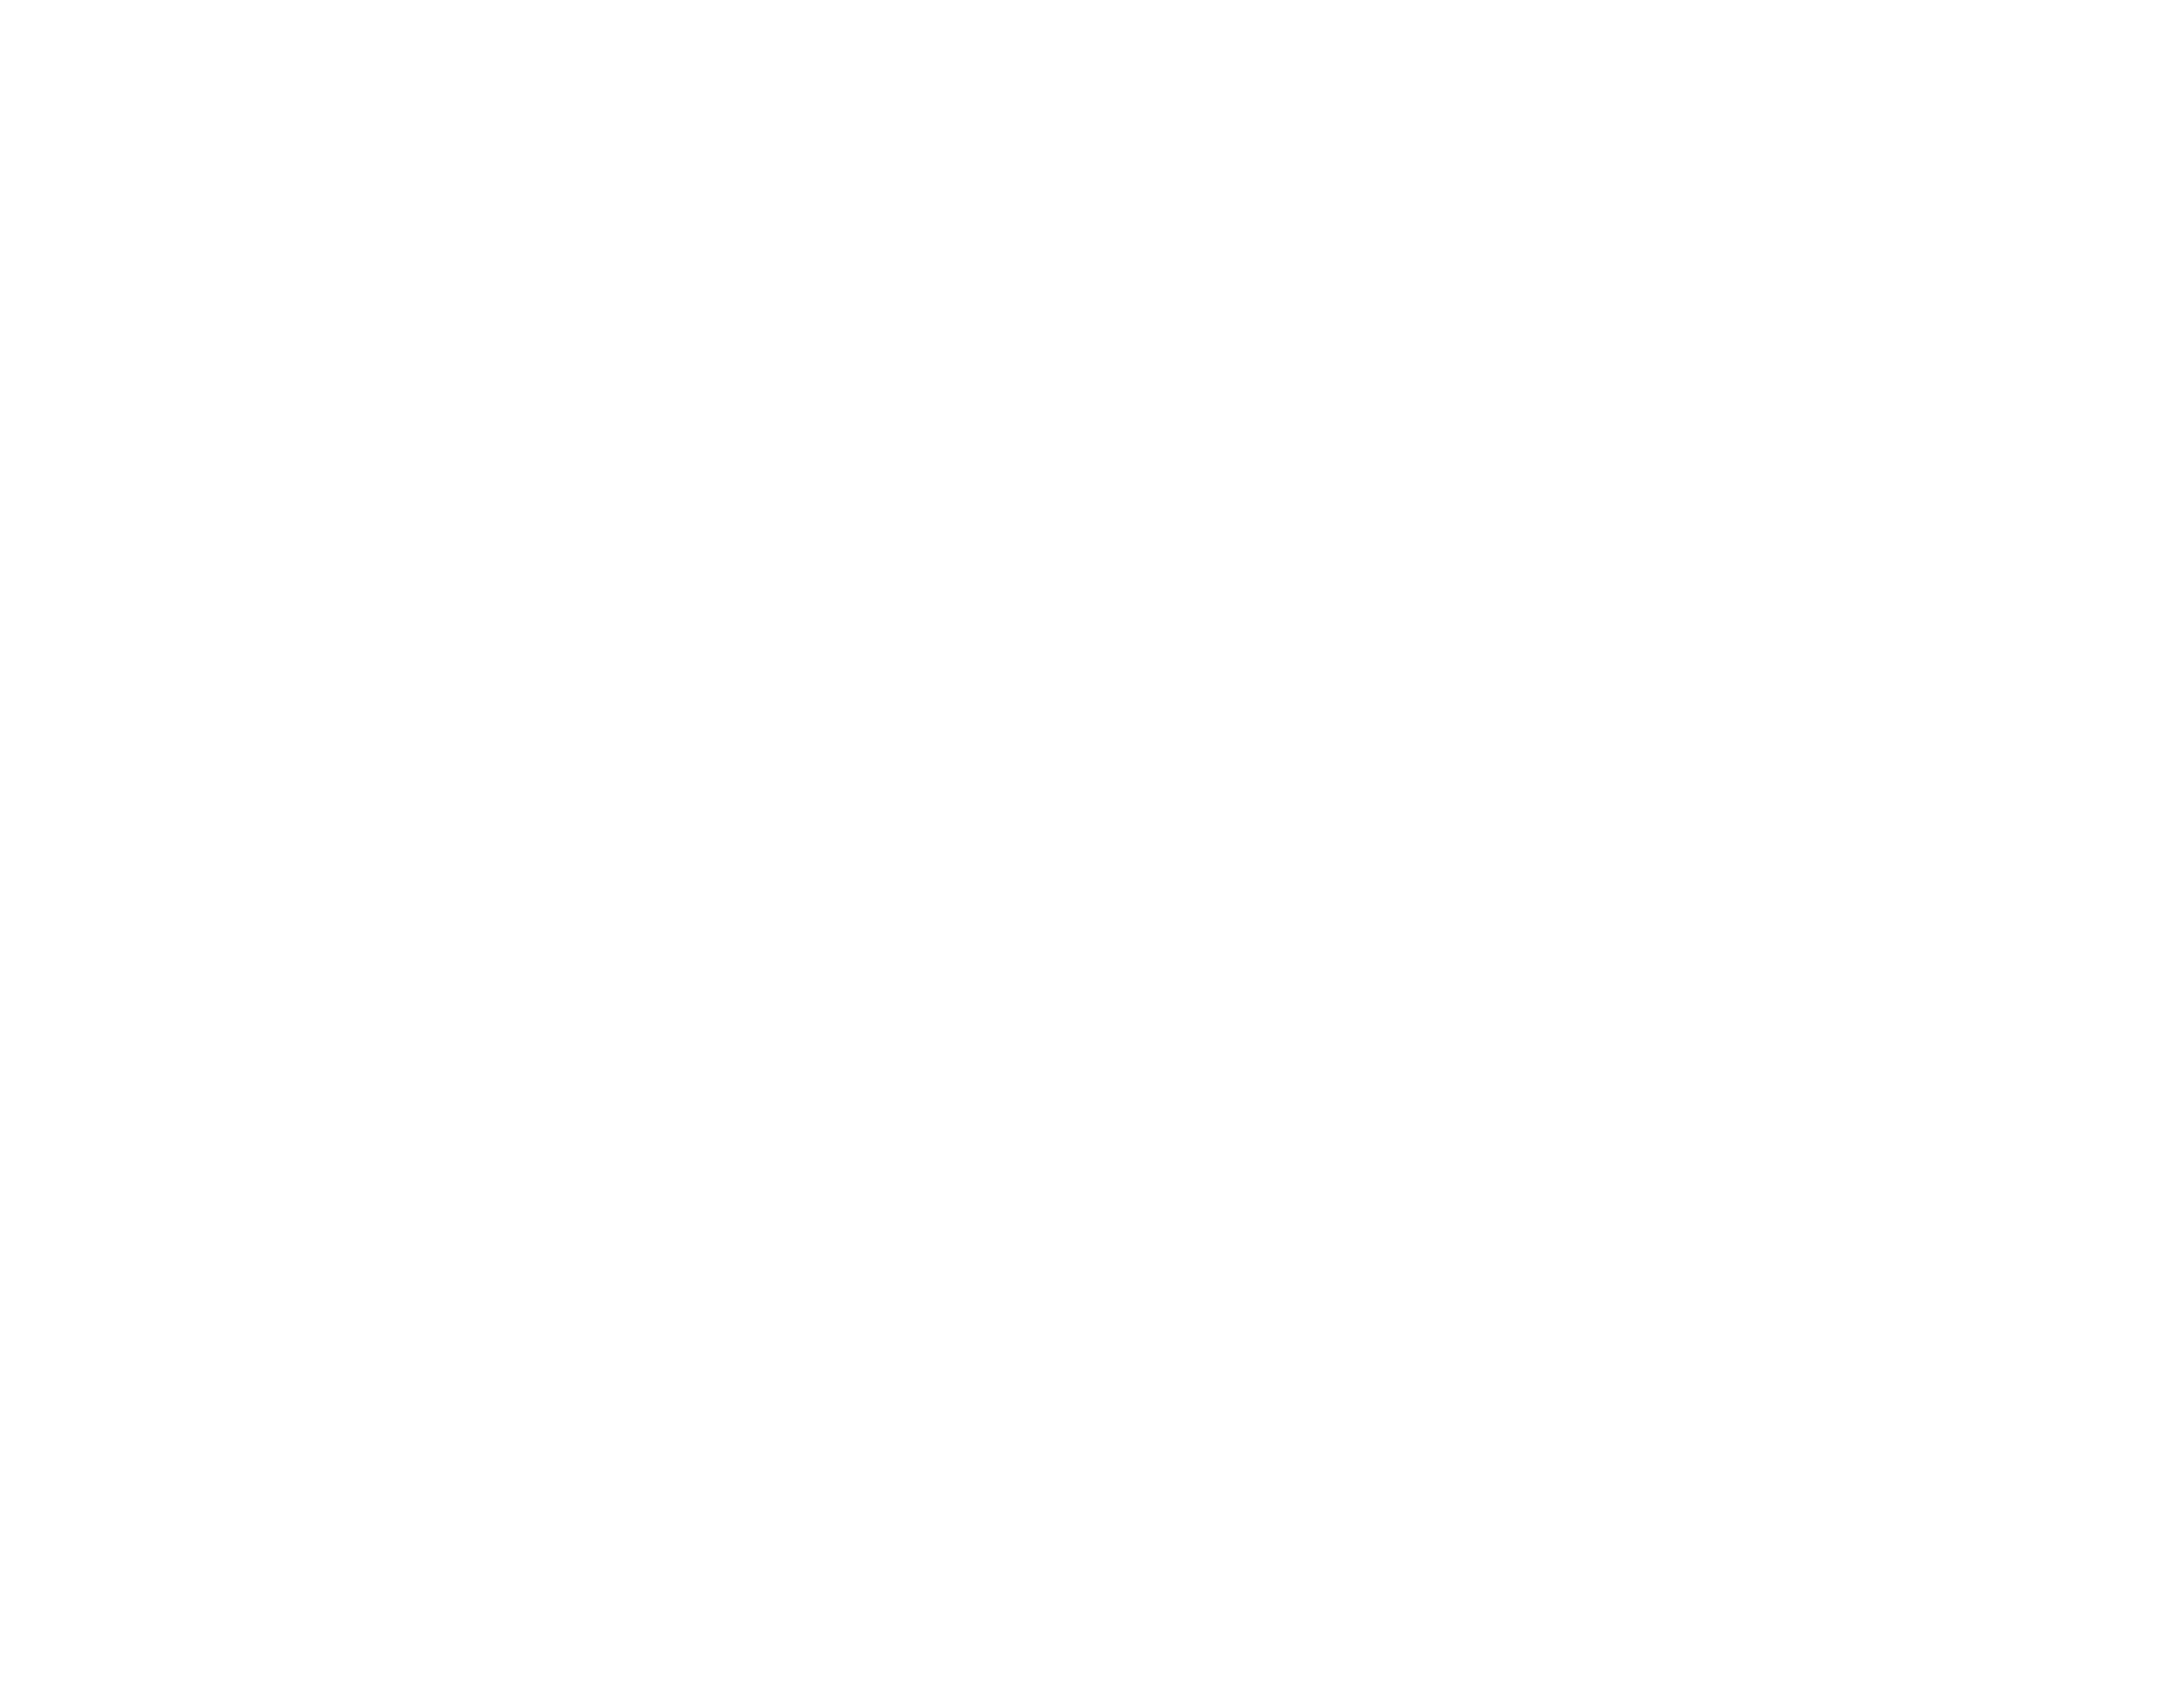

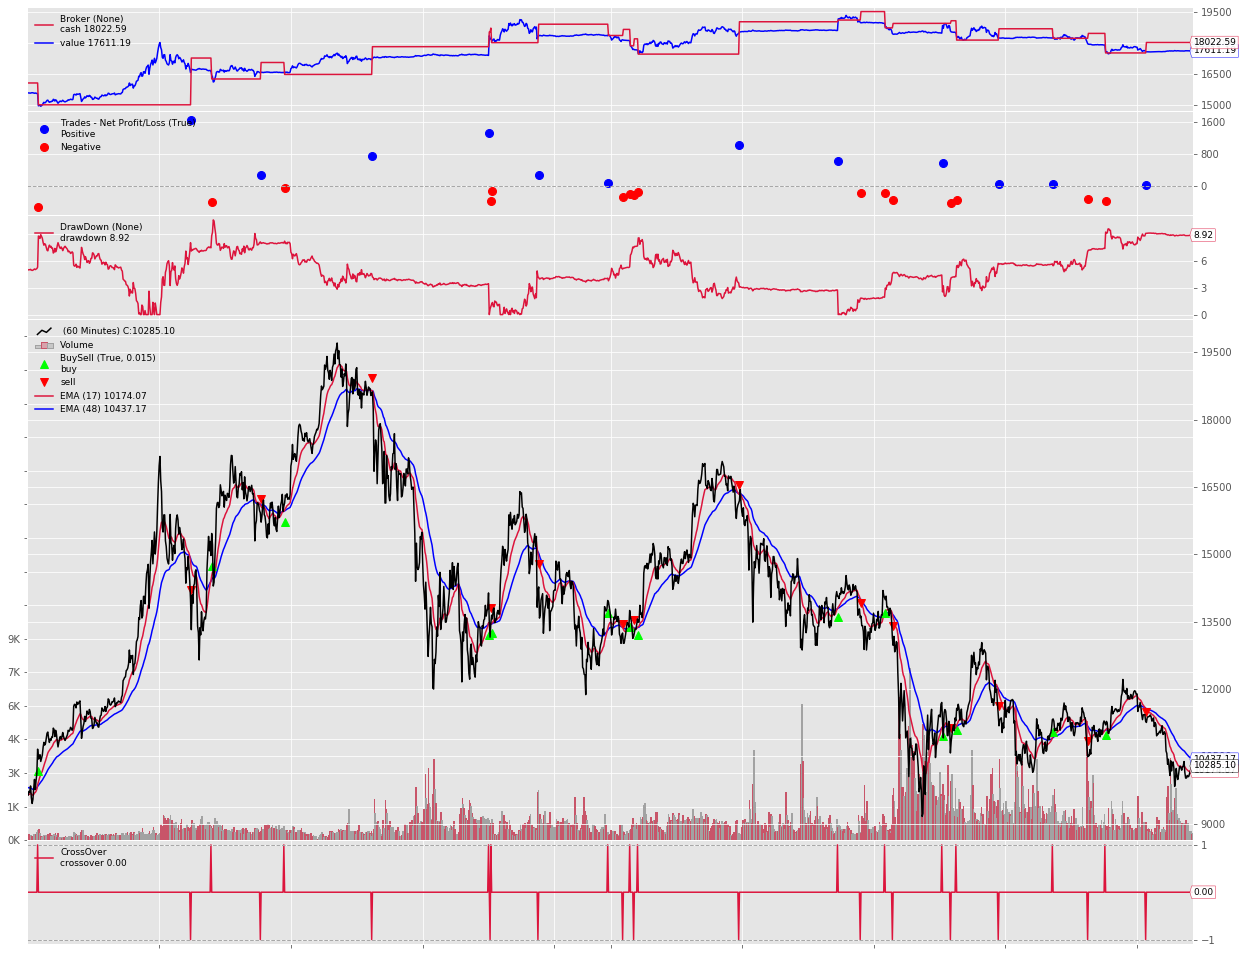

In [33]:
# Simple EMA Crossover on BTC / USDT

# Create a Stratey
class TestStrategy(bt.Strategy):
    params = (
        ('short_ema', 17),
        ('long_ema', 48),
        ('mult', 10),
        ('lever', 10),
        ('printlog', True),
        ('trailstoppct', 0.05),  # trailstop order trail 0.05 = 5%
    )


    def log(self, txt, dt=None, doprint=False):
        ''' Logging function fot this strategy'''
        if self.params.printlog or doprint:
            dt = dt or self.data.datetime[0]
            dt = bt.num2date(dt)
            print('%s, %s' % (dt.isoformat(), txt))


    def __init__(self):
        # Keep a reference to the "close" line in the data[0] dataseries
        self.dataclose = self.datas[0].close

        # To keep track of pending orders and buy price/commission
        self.order = None
        self.buyprice = None
        self.buycomm = None

        # Add exponential moving averages
        ema_short = bt.ind.EMA(period=self.params.short_ema)
        ema_long = bt.ind.EMA(period=self.params.long_ema)
        
        self.crossover = bt.ind.CrossOver(ema_short, ema_long)


    def next(self):
        
        # Simply log the closing price of the series from the reference
        # self.log('Close, %.2f' % self.dataclose[0])
        
        if self.order:
            return  # if an order is active, no new orders are allowed
            
        if self.crossover > 0:  # cross upwards
            if self.position:
                self.log('CLOSE SHORT , %.2f' % self.dataclose[0])
                self.close()

            self.log('BUY CREATE , %.2f' % self.dataclose[0])
            # to make orders at 5% of portfolio value, no more than 500$
            self.buy(size=round(min((cerebro.broker.getvalue()*0.05), 500) / self.dataclose[0], 2))
                    # exectype=bt.Order.StopTrail, trailpercent=self.params.trailstoppct)

        elif self.crossover < 0:  # cross downwards
            if self.position:
                self.log('CLOSE LONG , %.2f' % self.dataclose[0])
                self.close()

            self.log('SELL CREATE , %.2f' % self.dataclose[0])
            # to make orders at 5% of portfolio value, no more than 500$
            self.sell(size=round(min((cerebro.broker.getvalue()*0.05), 500) / self.dataclose[0], 2))
                     # exectype=bt.Order.StopTrail, trailpercent=self.params.trailstoppct)


    def notify_order(self, order):
        if order.status in [order.Submitted, order.Accepted]:
            # Buy/Sell order submitted/accepted to/by broker - Nothing to do
            return

        # Check if an order has been completed
        # Attention: broker could reject order if not enough cash
        if order.status in [order.Completed]:
            
            if order.isbuy():
                self.log('BUY EXECUTED, Price: %.2f, Cost: %.2f, Comm %.2f' %
                         (order.executed.price,
                          order.executed.value,
                          order.executed.comm)
                         )

                self.buyprice = order.executed.price
                self.buycomm = order.executed.comm
            
            elif order.issell():
                self.log('SELL EXECUTED, Price: %.2f, Cost: %.2f, Comm %.2f' %
                         (order.executed.price,
                          order.executed.value,
                          order.executed.comm)
                        )

            self.bar_executed = len(self)

        elif order.status in [order.Canceled, order.Margin, order.Rejected]:
            self.log('Order Canceled/Margin/Rejected', doprint=True)

        # Write down: no pending order
        self.order = None


    def notify_trade(self, trade):
        if trade.isclosed:
            self.log('OPERATION PROFIT, GROSS %.2f, NET %.2f, Acc Balance: %.2f' %
                 (trade.pnl, trade.pnlcomm, cerebro.broker.getvalue()))
        
        elif trade.justopened:
            self.log('TRADE OPENED, SIZE: %2d , VAL: %.2f' % (trade.size, trade.value))


if __name__ == '__main__':
    # Create a cerebro entity
    cerebro = bt.Cerebro()
    
    # Add a strategy
    cerebro.addstrategy(TestStrategy)
    
    # timeframe and compression tells the system we have hourly data
    data = bt.feeds.PandasData(dataname=btc_usdt1h,
                               timeframe=bt.TimeFrame.Minutes,
                               compression=60)

    # Add the Data Feed to Cerebro
    cerebro.adddata(data)

    # Set our desired cash start
    cerebro.broker.setcash(10000.0)  # 10,000

    # Set the commission
    cerebro.broker.setcommission(commission=0.001,  # 0.1% binance commission
                                 mult=TestStrategy.params.mult,
                                 interest=0.01,  # long/short interest 0.01 -> 1%
                                 leverage=TestStrategy.params.lever,
                                 interest_long=True
                                 )
    
    print("Starting Portfolio Value: %.2f" % cerebro.broker.getvalue())

    # Create Analyzers
    # RF = 1%, 
    cerebro.addanalyzer(bt.analyzers.SharpeRatio_A, _name='mysharpe')
    cerebro.addanalyzer(bt.analyzers.DrawDown, _name='mydrawdown')
    cerebro.addanalyzer(bt.analyzers.Returns, _name='returns')
    cerebro.addanalyzer(bt.analyzers.TradeAnalyzer, _name='mytradeanal')
    cerebro.addanalyzer(bt.analyzers.BasicTradeStats , _name='tradestats')
    
    # Create Observers
    cerebro.addobserver(bt.observers.DrawDown)

    # Run over everything
    thestrats = cerebro.run()
    thestrat = thestrats[0]
    
    # Print Analyzers
    print()
    print("Final Portfolio Value: %.2f" % cerebro.broker.getvalue())
    print()
    print('Annualised SharpeR:', thestrat.analyzers.mysharpe.get_analysis()['sharperatio'])
    print()
    # CAGR = (end bal / beg bal) ^ 1/n of years - 1
    print('CAGR % ', thestrat.analyzers.returns.get_analysis()['rnorm100'] * 100)
    print()
    printTradeAnalysis(thestrat.analyzers.mytradeanal.get_analysis())
    print()
    printDrawDown(thestrat.analyzers.mydrawdown.get_analysis())
    print()
    pprint.pprint(dict(thestrat.analyzers.tradestats.get_analysis()))
    
    # to plot part of the data
    cerebro.plot(start=datetime.date(2017, 12, 1), end=datetime.date(2018, 2, 1))
    
    # cerebro.plot()  # plot backtest

## Optimise Simple EMA crossover strategy parameters

In [34]:
# Parameter optimisation for Simple EMA crossover strategy on BTC / USDT

# Create a Stratey
class TestStrategy(bt.Strategy):
    params = (
        ('short_ema', 17),
        ('long_ema', 48),
        ('mult', 10),
        ('lever', 10),
        ('printlog', False),
        ('trailstoppct', 0.05),  # trailstop order trail 0.05 = 5%
    )


    def log(self, txt, dt=None, doprint=False):
        ''' Logging function fot this strategy'''
        if self.params.printlog or doprint:
            dt = dt or self.data.datetime[0]
            dt = bt.num2date(dt)
            print('%s, %s' % (dt.isoformat(), txt))


    def __init__(self):
        # Keep a reference to the "close" line in the data[0] dataseries
        self.dataclose = self.datas[0].close

        # To keep track of pending orders and buy price/commission
        self.order = None
        self.buyprice = None
        self.buycomm = None

        # Add exponential moving averages
        ema_short = bt.ind.EMA(period=self.params.short_ema)
        ema_long = bt.ind.EMA(period=self.params.long_ema)
        
        self.crossover = bt.ind.CrossOver(ema_short, ema_long)


    def next(self):
        
        # Simply log the closing price of the series from the reference
        # self.log('Close, %.2f' % self.dataclose[0])
        
        if self.order:
            return  # if an order is active, no new orders are allowed
            
        if self.crossover > 0:  # cross upwards
            if self.position:
                self.log('CLOSE SHORT , %.2f' % self.dataclose[0])
                self.close()

            self.log('BUY CREATE , %.2f' % self.dataclose[0])
            # to make orders at 5% of portfolio value, no more than 500$
            self.buy(size=round(min((cerebro.broker.getvalue()*0.05), 500) / self.dataclose[0], 2))
                    # exectype=bt.Order.StopTrail, trailpercent=self.params.trailstoppct)

        elif self.crossover < 0:  # cross downwards
            if self.position:
                self.log('CLOSE LONG , %.2f' % self.dataclose[0])
                self.close()

            self.log('SELL CREATE , %.2f' % self.dataclose[0])
            # to make orders at 5% of portfolio value, no more than 500$
            self.sell(size=round(min((cerebro.broker.getvalue()*0.05), 500) / self.dataclose[0], 2))
                     # exectype=bt.Order.StopTrail, trailpercent=self.params.trailstoppct)


    def notify_order(self, order):
        if order.status in [order.Submitted, order.Accepted]:
            # Buy/Sell order submitted/accepted to/by broker - Nothing to do
            return

        # Check if an order has been completed
        # Attention: broker could reject order if not enough cash
        if order.status in [order.Completed]:
            
            if order.isbuy():
                self.log('BUY EXECUTED, Price: %.2f, Cost: %.2f, Comm %.2f' %
                         (order.executed.price,
                          order.executed.value,
                          order.executed.comm)
                         )

                self.buyprice = order.executed.price
                self.buycomm = order.executed.comm
            
            elif order.issell():
                self.log('SELL EXECUTED, Price: %.2f, Cost: %.2f, Comm %.2f' %
                         (order.executed.price,
                          order.executed.value,
                          order.executed.comm)
                        )

            self.bar_executed = len(self)

        elif order.status in [order.Canceled, order.Margin, order.Rejected]:
            self.log('Order Canceled/Margin/Rejected', doprint=True)

        # Write down: no pending order
        self.order = None


    def notify_trade(self, trade):
        if trade.isclosed:
            self.log('OPERATION PROFIT, GROSS %.2f, NET %.2f, Acc Balance: %.2f' %
                 (trade.pnl, trade.pnlcomm, cerebro.broker.getvalue()))
        
        elif trade.justopened:
            self.log('TRADE OPENED, SIZE: %2d , VAL: %.2f' % (trade.size, trade.value))
    
    
#     UNCOMMENT TO OPTIMISE
    def stop(self):
        self.log('(Short EMA %2d), (Long EMA: %2d) Ending Value %.2f' %
                 (self.params.short_ema, self.params.long_ema, self.broker.getvalue()),
                 doprint=True)


if __name__ == '__main__':
    # Create a cerebro entity
    cerebro = bt.Cerebro()
    
    # Add a strategy
    strats = cerebro.optstrategy(
        TestStrategy,
        short_ema=range(15, 21),
        long_ema=range(45, 51))
    
    # timeframe and compression tells the system we have hourly data
    data = bt.feeds.PandasData(dataname=btc_usdt1h,
                               timeframe=bt.TimeFrame.Minutes,
                               compression=60)

    # Add the Data Feed to Cerebro
    cerebro.adddata(data)

    # Set our desired cash start
    cerebro.broker.setcash(10000.0)  # 10,000

    # Add a Percentage sizer - set to 5% of portfolio value
    # cerebro.addsizer(bt.sizers.PercentSizer, percents=5)
    # cerebro.addsizer(bt.sizers.FixedSize)

    # Set the commission
    cerebro.broker.setcommission(commission=0.001,  # 0.1% binance commission
                                 mult=TestStrategy.params.mult,
                                 interest=0.01,  # long/short interest 0.01 -> 1%
                                 leverage=TestStrategy.params.lever,
                                 interest_long=True
                                 )
    
    print("Starting Portfolio Value: %.2f" % cerebro.broker.getvalue())

    # Run over everything
    thestrats = cerebro.run(maxcpus=2)  # OPTIMIZE
    thestrat = thestrats[0]


Starting Portfolio Value: 10000.00
2019-08-21T14:59:59.999004, (Short EMA 15), (Long EMA: 45) Ending Value 26527.86
2019-08-21T14:59:59.999004, (Short EMA 15), (Long EMA: 46) Ending Value 27065.91
2019-08-21T14:59:59.999004, (Short EMA 15), (Long EMA: 47) Ending Value 27288.28
2019-08-21T14:59:59.999004, (Short EMA 15), (Long EMA: 48) Ending Value 28160.14
2019-08-21T14:59:59.999004, (Short EMA 15), (Long EMA: 49) Ending Value 28533.71
2019-08-21T14:59:59.999004, (Short EMA 15), (Long EMA: 50) Ending Value 28993.97
2019-08-21T14:59:59.999004, (Short EMA 16), (Long EMA: 45) Ending Value 27908.95
2019-08-21T14:59:59.999004, (Short EMA 16), (Long EMA: 46) Ending Value 28288.49
2019-08-21T14:59:59.999004, (Short EMA 16), (Long EMA: 47) Ending Value 28542.90
2019-08-21T14:59:59.999004, (Short EMA 16), (Long EMA: 48) Ending Value 28945.60
2019-08-21T14:59:59.999004, (Short EMA 16), (Long EMA: 49) Ending Value 30295.61
2019-08-21T14:59:59.999004, (Short EMA 16), (Long EMA: 50) Ending Value 27

The performance didn't improve as much as in case of Ether but 16 and 49 gave us a bit of extra profit.

## Backtest with optimised parameters for simple EMA crossover

Starting Portfolio Value: 10000.00
2017-08-23T02:12:59.999001, BUY CREATE , 4103.52
2017-08-23T02:13:59.998997, BUY EXECUTED, Price: 4103.52, Cost: 492.42, Comm 0.49
2017-08-23T02:13:59.998997, TRADE OPENED, SIZE:  0 , VAL: 492.42
2017-08-28T04:32:59.999003, CLOSE LONG , 4131.26
2017-08-28T04:32:59.999003, SELL CREATE , 4131.26
2017-08-28T04:33:59.998999, SELL EXECUTED, Price: 4189.97, Cost: 492.42, Comm 0.57
2017-08-28T04:33:59.998999, SELL EXECUTED, Price: 4189.97, Cost: -502.80, Comm 0.50
2017-08-28T04:33:59.998999, OPERATION PROFIT, GROSS 103.74, NET 102.68, Acc Balance: 10102.17
2017-08-28T04:33:59.998999, TRADE OPENED, SIZE:  0 , VAL: -502.80
2017-08-28T18:30:59.999004, CLOSE SHORT , 4323.32
2017-08-28T18:30:59.999004, BUY CREATE , 4323.32
2017-08-28T18:31:59.999000, BUY EXECUTED, Price: 4323.32, Cost: -502.80, Comm 0.52
2017-08-28T18:31:59.999000, BUY EXECUTED, Price: 4323.32, Cost: 518.80, Comm 0.52
2017-08-28T18:31:59.999000, OPERATION PROFIT, GROSS -160.02, NET -161.04, Acc B

2017-10-17T12:09:59.998998, CLOSE LONG , 5532.47
2017-10-17T12:09:59.998998, SELL CREATE , 5532.47
2017-10-17T12:10:59.998995, SELL EXECUTED, Price: 5532.45, Cost: 512.65, Comm 0.51
2017-10-17T12:10:59.998995, SELL EXECUTED, Price: 5532.45, Cost: -497.92, Comm 0.50
2017-10-17T12:10:59.998995, OPERATION PROFIT, GROSS -147.28, NET -148.30, Acc Balance: 11851.63
2017-10-17T12:10:59.998995, TRADE OPENED, SIZE:  0 , VAL: -497.92
2017-10-19T06:02:59.999003, CLOSE SHORT , 5580.00
2017-10-19T06:02:59.999003, BUY CREATE , 5580.00
2017-10-19T06:03:59.998999, BUY EXECUTED, Price: 5580.01, Cost: -497.92, Comm 0.53
2017-10-19T06:03:59.998999, BUY EXECUTED, Price: 5580.01, Cost: 502.20, Comm 0.50
2017-10-19T06:03:59.998999, OPERATION PROFIT, GROSS -42.80, NET -43.83, Acc Balance: 11809.37
2017-10-19T06:03:59.998999, TRADE OPENED, SIZE:  0 , VAL: 502.20
2017-10-22T11:13:59.998997, CLOSE LONG , 5729.48
2017-10-22T11:13:59.998997, SELL CREATE , 5729.48
2017-10-22T11:14:59.999004, SELL EXECUTED, Price: 

2017-11-30T12:24:59.998995, CLOSE LONG , 9650.00
2017-11-30T12:24:59.998995, SELL CREATE , 9650.00
2017-11-30T12:25:59.999001, SELL EXECUTED, Price: 9649.98, Cost: 491.10, Comm 0.66
2017-11-30T12:25:59.999001, SELL EXECUTED, Price: 9649.98, Cost: -482.50, Comm 0.48
2017-11-30T12:25:59.999001, OPERATION PROFIT, GROSS 879.01, NET 877.86, Acc Balance: 14735.45
2017-11-30T12:25:59.999001, TRADE OPENED, SIZE:  0 , VAL: -482.50
2017-12-01T13:36:59.998999, CLOSE SHORT , 10499.00
2017-12-01T13:36:59.998999, BUY CREATE , 10499.00
2017-12-01T13:37:59.998995, BUY EXECUTED, Price: 10499.00, Cost: -482.50, Comm 0.54
2017-12-01T13:37:59.998995, BUY EXECUTED, Price: 10499.00, Cost: 524.95, Comm 0.52
2017-12-01T13:37:59.998995, OPERATION PROFIT, GROSS -424.51, NET -425.53, Acc Balance: 14308.55
2017-12-01T13:37:59.998995, TRADE OPENED, SIZE:  0 , VAL: 524.95
2017-12-09T16:37:20.798001, CLOSE LONG , 13999.96
2017-12-09T16:37:20.798001, SELL CREATE , 13999.96
2017-12-09T16:38:20.797997, SELL EXECUTED, P

2018-01-14T08:26:59.999001, CLOSE LONG , 13699.00
2018-01-14T08:26:59.999001, SELL CREATE , 13699.00
2018-01-14T08:27:59.998997, SELL EXECUTED, Price: 13699.00, Cost: 559.32, Comm 0.56
2018-01-14T08:27:59.998997, SELL EXECUTED, Price: 13699.00, Cost: -547.96, Comm 0.55
2018-01-14T08:27:59.998997, OPERATION PROFIT, GROSS -113.58, NET -114.71, Acc Balance: 16967.55
2018-01-14T08:27:59.998997, TRADE OPENED, SIZE:  0 , VAL: -547.96
2018-01-15T14:51:59.999002, CLOSE SHORT , 14140.56
2018-01-15T14:51:59.999002, BUY CREATE , 14140.56
2018-01-15T14:52:59.998999, BUY EXECUTED, Price: 14140.56, Cost: -547.96, Comm 0.58
2018-01-15T14:52:59.998999, BUY EXECUTED, Price: 14140.56, Cost: 565.62, Comm 0.57
2018-01-15T14:52:59.998999, OPERATION PROFIT, GROSS -176.62, NET -177.75, Acc Balance: 16789.75
2018-01-15T14:52:59.998999, TRADE OPENED, SIZE:  0 , VAL: 565.62
2018-01-16T00:54:59.998998, CLOSE LONG , 13249.26
2018-01-16T00:54:59.998998, SELL CREATE , 13249.26
2018-01-16T00:55:59.998995, SELL EXECU

2018-03-01T04:37:59.998995, CLOSE LONG , 10440.70
2018-03-01T04:37:59.998995, SELL CREATE , 10440.70
2018-03-01T04:38:59.999002, SELL EXECUTED, Price: 10440.70, Cost: 508.50, Comm 0.56
2018-03-01T04:38:59.999002, SELL EXECUTED, Price: 10440.70, Cost: -522.04, Comm 0.52
2018-03-01T04:38:59.999002, OPERATION PROFIT, GROSS 135.35, NET 134.28, Acc Balance: 18632.41
2018-03-01T04:38:59.999002, TRADE OPENED, SIZE:  0 , VAL: -522.04
2018-03-01T08:25:59.998995, CLOSE SHORT , 10642.71
2018-03-01T08:25:59.998995, BUY CREATE , 10642.71
2018-03-01T08:26:59.999001, BUY EXECUTED, Price: 10636.90, Cost: -522.04, Comm 0.53
2018-03-01T08:26:59.999001, BUY EXECUTED, Price: 10636.90, Cost: 531.85, Comm 0.53
2018-03-01T08:26:59.999001, OPERATION PROFIT, GROSS -98.10, NET -99.15, Acc Balance: 18529.93
2018-03-01T08:26:59.999001, TRADE OPENED, SIZE:  0 , VAL: 531.85
2018-03-06T07:35:59.999002, CLOSE LONG , 11256.70
2018-03-06T07:35:59.999002, SELL CREATE , 11256.70
2018-03-06T07:36:59.998999, SELL EXECUTED,

2018-04-25T15:46:59.998997, CLOSE LONG , 8943.00
2018-04-25T15:46:59.998997, SELL CREATE , 8943.00
2018-04-25T15:47:59.999003, SELL EXECUTED, Price: 8950.00, Cost: 486.00, Comm 0.63
2018-04-25T15:47:59.999003, SELL EXECUTED, Price: 8950.00, Cost: -537.00, Comm 0.54
2018-04-25T15:47:59.999003, OPERATION PROFIT, GROSS 510.00, NET 508.88, Acc Balance: 20446.83
2018-04-25T15:47:59.999003, TRADE OPENED, SIZE:  0 , VAL: -537.00
2018-04-27T01:11:59.998998, CLOSE SHORT , 9235.00
2018-04-27T01:11:59.998998, BUY CREATE , 9235.00
2018-04-27T01:12:59.999004, BUY EXECUTED, Price: 9235.00, Cost: -537.00, Comm 0.58
2018-04-27T01:12:59.999004, BUY EXECUTED, Price: 9235.00, Cost: 461.75, Comm 0.46
2018-04-27T01:12:59.999004, OPERATION PROFIT, GROSS -171.00, NET -172.12, Acc Balance: 20279.73
2018-04-27T01:12:59.999004, TRADE OPENED, SIZE:  0 , VAL: 461.75
2018-04-30T09:52:59.998995, CLOSE LONG , 9195.00
2018-04-30T09:52:59.998995, SELL CREATE , 9195.00
2018-04-30T09:53:59.999002, SELL EXECUTED, Price: 

2018-06-04T11:29:59.999000, CLOSE LONG , 7532.00
2018-06-04T11:29:59.999000, SELL CREATE , 7532.00
2018-06-04T11:30:59.998997, SELL EXECUTED, Price: 7532.00, Cost: 527.24, Comm 0.56
2018-06-04T11:30:59.998997, SELL EXECUTED, Price: 7532.00, Cost: -527.24, Comm 0.53
2018-06-04T11:30:59.998997, OPERATION PROFIT, GROSS -0.01, NET -1.09, Acc Balance: 20413.24
2018-06-04T11:30:59.998997, TRADE OPENED, SIZE:  0 , VAL: -527.24
2018-06-05T22:16:59.999000, CLOSE SHORT , 7604.95
2018-06-05T22:16:59.999000, BUY CREATE , 7604.95
2018-06-05T22:17:59.998996, BUY EXECUTED, Price: 7604.09, Cost: -527.24, Comm 0.55
2018-06-05T22:17:59.998996, BUY EXECUTED, Price: 7604.09, Cost: 532.29, Comm 0.53
2018-06-05T22:17:59.998996, OPERATION PROFIT, GROSS -50.46, NET -51.54, Acc Balance: 20362.19
2018-06-05T22:17:59.998996, TRADE OPENED, SIZE:  0 , VAL: 532.29
2018-06-08T10:39:59.998998, CLOSE LONG , 7562.90
2018-06-08T10:39:59.998998, SELL CREATE , 7562.90
2018-06-08T10:40:59.998995, SELL EXECUTED, Price: 7562

2018-07-21T01:49:59.999003, CLOSE LONG , 7254.07
2018-07-21T01:49:59.999003, SELL CREATE , 7254.07
2018-07-21T01:50:59.998999, SELL EXECUTED, Price: 7257.99, Cost: 501.47, Comm 0.68
2018-07-21T01:50:59.998999, SELL EXECUTED, Price: 7257.99, Cost: -508.06, Comm 0.51
2018-07-21T01:50:59.998999, OPERATION PROFIT, GROSS 791.70, NET 790.53, Acc Balance: 21383.64
2018-07-21T01:50:59.998999, TRADE OPENED, SIZE:  0 , VAL: -508.06
2018-07-21T17:56:59.999004, CLOSE SHORT , 7413.99
2018-07-21T17:56:59.999004, BUY CREATE , 7413.99
2018-07-21T17:57:59.999001, BUY EXECUTED, Price: 7409.81, Cost: -508.06, Comm 0.52
2018-07-21T17:57:59.999001, BUY EXECUTED, Price: 7409.81, Cost: 518.69, Comm 0.52
2018-07-21T17:57:59.999001, OPERATION PROFIT, GROSS -106.27, NET -107.30, Acc Balance: 21281.07
2018-07-21T17:57:59.999001, TRADE OPENED, SIZE:  0 , VAL: 518.69
2018-07-26T23:29:59.999000, CLOSE LONG , 7899.86
2018-07-26T23:29:59.999000, SELL CREATE , 7899.86
2018-07-26T23:30:59.998997, SELL EXECUTED, Price: 

2018-09-05T11:41:59.998998, CLOSE LONG , 6970.99
2018-09-05T11:41:59.998998, SELL CREATE , 6970.99
2018-09-05T11:42:59.999004, SELL EXECUTED, Price: 6970.70, Cost: 488.56, Comm 0.55
2018-09-05T11:42:59.999004, SELL EXECUTED, Price: 6970.70, Cost: -487.95, Comm 0.49
2018-09-05T11:42:59.999004, OPERATION PROFIT, GROSS -6.12, NET -7.16, Acc Balance: 21353.12
2018-09-05T11:42:59.999004, TRADE OPENED, SIZE:  0 , VAL: -487.95
2018-09-11T06:38:59.998995, CLOSE SHORT , 6351.00
2018-09-11T06:38:59.998995, BUY CREATE , 6351.00
2018-09-11T06:39:59.999001, BUY EXECUTED, Price: 6351.25, Cost: -487.95, Comm 0.52
2018-09-11T06:39:59.999001, BUY EXECUTED, Price: 6351.25, Cost: 508.10, Comm 0.51
2018-09-11T06:39:59.999001, OPERATION PROFIT, GROSS 433.61, NET 432.60, Acc Balance: 21785.00
2018-09-11T06:39:59.999001, TRADE OPENED, SIZE:  0 , VAL: 508.10
2018-09-11T11:35:59.998999, CLOSE LONG , 6263.87
2018-09-11T11:35:59.998999, SELL CREATE , 6263.87
2018-09-11T11:36:59.998995, SELL EXECUTED, Price: 6262

2018-10-04T04:40:59.998995, CLOSE SHORT , 6600.91
2018-10-04T04:40:59.998995, BUY CREATE , 6600.91
2018-10-04T04:41:59.999001, BUY EXECUTED, Price: 6601.92, Cost: -526.90, Comm 0.56
2018-10-04T04:41:59.999001, BUY EXECUTED, Price: 6601.92, Cost: 528.15, Comm 0.53
2018-10-04T04:41:59.999001, OPERATION PROFIT, GROSS -12.56, NET -13.64, Acc Balance: 21552.41
2018-10-04T04:41:59.999001, TRADE OPENED, SIZE:  0 , VAL: 528.15
2018-10-07T08:01:59.999000, CLOSE LONG , 6571.98
2018-10-07T08:01:59.999000, SELL CREATE , 6571.98
2018-10-07T08:02:59.998996, SELL EXECUTED, Price: 6571.99, Cost: 528.15, Comm 0.57
2018-10-07T08:02:59.998996, SELL EXECUTED, Price: 6571.99, Cost: -525.76, Comm 0.53
2018-10-07T08:02:59.998996, OPERATION PROFIT, GROSS -23.94, NET -25.04, Acc Balance: 21527.57
2018-10-07T08:02:59.998996, TRADE OPENED, SIZE:  0 , VAL: -525.76
2018-10-08T00:53:59.999002, CLOSE SHORT , 6610.83
2018-10-08T00:53:59.999002, BUY CREATE , 6610.83
2018-10-08T00:54:59.998998, BUY EXECUTED, Price: 661

2018-11-28T06:06:59.998999, CLOSE SHORT , 4075.00
2018-11-28T06:06:59.998999, BUY CREATE , 4075.00
2018-11-28T06:07:59.998995, BUY EXECUTED, Price: 4075.00, Cost: -509.00, Comm 0.52
2018-11-28T06:07:59.998995, BUY EXECUTED, Price: 4075.00, Cost: 489.00, Comm 0.49
2018-11-28T06:07:59.998995, OPERATION PROFIT, GROSS 1829.96, NET 1828.93, Acc Balance: 23655.77
2018-11-28T06:07:59.998995, TRADE OPENED, SIZE:  0 , VAL: 489.00
2018-11-30T12:59:59.999000, CLOSE LONG , 4025.99
2018-11-30T12:59:59.999000, SELL CREATE , 4025.99
2018-11-30T13:00:59.998997, SELL EXECUTED, Price: 4025.79, Cost: 489.00, Comm 0.51
2018-11-30T13:00:59.998997, SELL EXECUTED, Price: 4025.79, Cost: -483.09, Comm 0.48
2018-11-30T13:00:59.998997, OPERATION PROFIT, GROSS -59.05, NET -60.05, Acc Balance: 23596.09
2018-11-30T13:00:59.998997, TRADE OPENED, SIZE:  0 , VAL: -483.09
2018-12-01T16:15:59.999004, CLOSE SHORT , 4274.18
2018-12-01T16:15:59.999004, BUY CREATE , 4274.18
2018-12-01T16:16:59.999000, BUY EXECUTED, Price: 4

2019-01-10T06:59:59.999000, CLOSE LONG , 3781.31
2019-01-10T06:59:59.999000, SELL CREATE , 3781.31
2019-01-10T07:00:59.998997, SELL EXECUTED, Price: 3779.63, Cost: 493.31, Comm 0.55
2019-01-10T07:00:59.998997, SELL EXECUTED, Price: 3779.63, Cost: -491.35, Comm 0.49
2019-01-10T07:00:59.998997, OPERATION PROFIT, GROSS -19.59, NET -20.63, Acc Balance: 23229.36
2019-01-10T07:00:59.998997, TRADE OPENED, SIZE:  0 , VAL: -491.35
2019-01-14T19:10:59.999001, CLOSE SHORT , 3626.00
2019-01-14T19:10:59.999001, BUY CREATE , 3626.00
2019-01-14T19:11:59.998998, BUY EXECUTED, Price: 3626.00, Cost: -491.35, Comm 0.53
2019-01-14T19:11:59.998998, BUY EXECUTED, Price: 3626.00, Cost: 507.64, Comm 0.51
2019-01-14T19:11:59.998998, OPERATION PROFIT, GROSS 199.72, NET 198.70, Acc Balance: 23425.04
2019-01-14T19:11:59.998998, TRADE OPENED, SIZE:  0 , VAL: 507.64
2019-01-16T00:08:59.999002, CLOSE LONG , 3551.54
2019-01-16T00:08:59.999002, SELL CREATE , 3551.54
2019-01-16T00:09:59.998998, SELL EXECUTED, Price: 35

2019-02-12T03:53:59.999002, CLOSE LONG , 3621.38
2019-02-12T03:53:59.999002, SELL CREATE , 3621.38
2019-02-12T03:54:59.998998, SELL EXECUTED, Price: 3620.92, Cost: 515.38, Comm 0.60
2019-02-12T03:54:59.998998, SELL EXECUTED, Price: 3620.92, Cost: -506.93, Comm 0.51
2019-02-12T03:54:59.998998, OPERATION PROFIT, GROSS 277.53, NET 276.41, Acc Balance: 22864.23
2019-02-12T03:54:59.998998, TRADE OPENED, SIZE:  0 , VAL: -506.93
2019-02-12T20:04:59.998999, CLOSE SHORT , 3641.63
2019-02-12T20:04:59.998999, BUY CREATE , 3641.63
2019-02-12T20:05:59.998996, BUY EXECUTED, Price: 3641.52, Cost: -506.93, Comm 0.51
2019-02-12T20:05:59.998996, BUY EXECUTED, Price: 3641.52, Cost: 509.81, Comm 0.51
2019-02-12T20:05:59.998996, OPERATION PROFIT, GROSS -28.84, NET -29.86, Acc Balance: 22836.44
2019-02-12T20:05:59.998996, TRADE OPENED, SIZE:  0 , VAL: 509.81
2019-02-13T12:30:59.999004, CLOSE LONG , 3614.33
2019-02-13T12:30:59.999004, SELL CREATE , 3614.33
2019-02-13T12:31:59.999000, SELL EXECUTED, Price: 36

2019-04-15T20:50:59.998996, CLOSE LONG , 5007.41
2019-04-15T20:50:59.998996, SELL CREATE , 5007.41
2019-04-15T20:51:59.999002, SELL EXECUTED, Price: 5007.42, Cost: 507.71, Comm 0.51
2019-04-15T20:51:59.999002, SELL EXECUTED, Price: 5007.42, Cost: -500.74, Comm 0.50
2019-04-15T20:51:59.999002, OPERATION PROFIT, GROSS -69.68, NET -70.70, Acc Balance: 24100.94
2019-04-15T20:51:59.999002, TRADE OPENED, SIZE:  0 , VAL: -500.74
2019-04-16T18:27:59.999004, CLOSE SHORT , 5167.12
2019-04-16T18:27:59.999004, BUY CREATE , 5167.12
2019-04-16T18:28:59.999001, BUY EXECUTED, Price: 5167.14, Cost: -500.74, Comm 0.53
2019-04-16T18:28:59.999001, BUY EXECUTED, Price: 5167.14, Cost: 516.71, Comm 0.52
2019-04-16T18:28:59.999001, OPERATION PROFIT, GROSS -159.72, NET -160.75, Acc Balance: 23936.93
2019-04-16T18:28:59.999001, TRADE OPENED, SIZE:  0 , VAL: 516.71
2019-04-21T12:11:59.999001, CLOSE LONG , 5206.56
2019-04-21T12:11:59.999001, SELL CREATE , 5206.56
2019-04-21T12:12:59.998997, SELL EXECUTED, Price: 

2019-06-03T09:33:59.999003, CLOSE LONG , 8493.02
2019-06-03T09:33:59.999003, SELL CREATE , 8493.02
2019-06-03T09:34:59.998999, SELL EXECUTED, Price: 8494.16, Cost: 512.66, Comm 0.54
2019-06-03T09:34:59.998999, SELL EXECUTED, Price: 8494.16, Cost: -509.65, Comm 0.51
2019-06-03T09:34:59.998999, OPERATION PROFIT, GROSS -30.11, NET -31.16, Acc Balance: 25742.98
2019-06-03T09:34:59.998999, TRADE OPENED, SIZE:  0 , VAL: -509.65
2019-06-07T08:55:59.998998, CLOSE SHORT , 7955.98
2019-06-07T08:55:59.998998, BUY CREATE , 7955.98
2019-06-07T08:56:59.999004, BUY EXECUTED, Price: 7956.06, Cost: -509.65, Comm 0.53
2019-06-07T08:56:59.999004, BUY EXECUTED, Price: 7956.06, Cost: 477.36, Comm 0.48
2019-06-07T08:56:59.999004, OPERATION PROFIT, GROSS 322.86, NET 321.82, Acc Balance: 26066.33
2019-06-07T08:56:59.999004, TRADE OPENED, SIZE:  0 , VAL: 477.36
2019-06-08T19:28:59.998997, CLOSE LONG , 7821.04
2019-06-08T19:28:59.998997, SELL CREATE , 7821.04
2019-06-08T19:29:59.999004, SELL EXECUTED, Price: 78

2019-07-07T02:09:59.999001, CLOSE LONG , 11219.31
2019-07-07T02:09:59.999001, SELL CREATE , 11219.31
2019-07-07T02:10:59.998998, SELL EXECUTED, Price: 11217.43, Cost: 456.45, Comm 0.46
2019-07-07T02:10:59.998998, SELL EXECUTED, Price: 11217.43, Cost: -448.70, Comm 0.45
2019-07-07T02:10:59.998998, OPERATION PROFIT, GROSS -77.52, NET -78.43, Acc Balance: 26639.92
2019-07-07T02:10:59.998998, TRADE OPENED, SIZE:  0 , VAL: -448.70
2019-07-07T19:42:59.998997, CLOSE SHORT , 11400.00
2019-07-07T19:42:59.998997, BUY CREATE , 11400.00
2019-07-07T19:43:59.999004, BUY EXECUTED, Price: 11400.00, Cost: -448.70, Comm 0.46
2019-07-07T19:43:59.999004, BUY EXECUTED, Price: 11400.00, Cost: 456.00, Comm 0.46
2019-07-07T19:43:59.999004, OPERATION PROFIT, GROSS -73.03, NET -73.93, Acc Balance: 26564.67
2019-07-07T19:43:59.999004, TRADE OPENED, SIZE:  0 , VAL: 456.00
2019-07-10T21:55:59.998995, CLOSE LONG , 11929.91
2019-07-10T21:55:59.998995, SELL CREATE , 11929.91
2019-07-10T21:56:59.999001, SELL EXECUTED,

2019-08-24T10:50:59.998999, CLOSE LONG , 9975.39
2019-08-24T10:50:59.998999, SELL CREATE , 9975.39
2019-08-24T10:51:59.998995, SELL EXECUTED, Price: 9975.39, Cost: 519.75, Comm 0.51
2019-08-24T10:51:59.998995, SELL EXECUTED, Price: 9975.39, Cost: -498.77, Comm 0.50
2019-08-24T10:51:59.998995, OPERATION PROFIT, GROSS -209.83, NET -210.86, Acc Balance: 27036.37
2019-08-24T10:51:59.998995, TRADE OPENED, SIZE:  0 , VAL: -498.77
2019-08-26T01:18:59.999003, CLOSE SHORT , 10484.20
2019-08-26T01:18:59.999003, BUY CREATE , 10484.20
2019-08-26T01:19:59.998999, BUY EXECUTED, Price: 10484.25, Cost: -498.77, Comm 0.55
2019-08-26T01:19:59.998999, BUY EXECUTED, Price: 10484.25, Cost: 524.21, Comm 0.52
2019-08-26T01:19:59.998999, OPERATION PROFIT, GROSS -254.43, NET -255.48, Acc Balance: 26781.65
2019-08-26T01:19:59.998999, TRADE OPENED, SIZE:  0 , VAL: 524.21
2019-08-27T09:29:59.998997, CLOSE LONG , 10161.35
2019-08-27T09:29:59.998997, SELL CREATE , 10161.35
2019-08-27T09:30:59.999004, SELL EXECUTED,

<IPython.core.display.Javascript object>


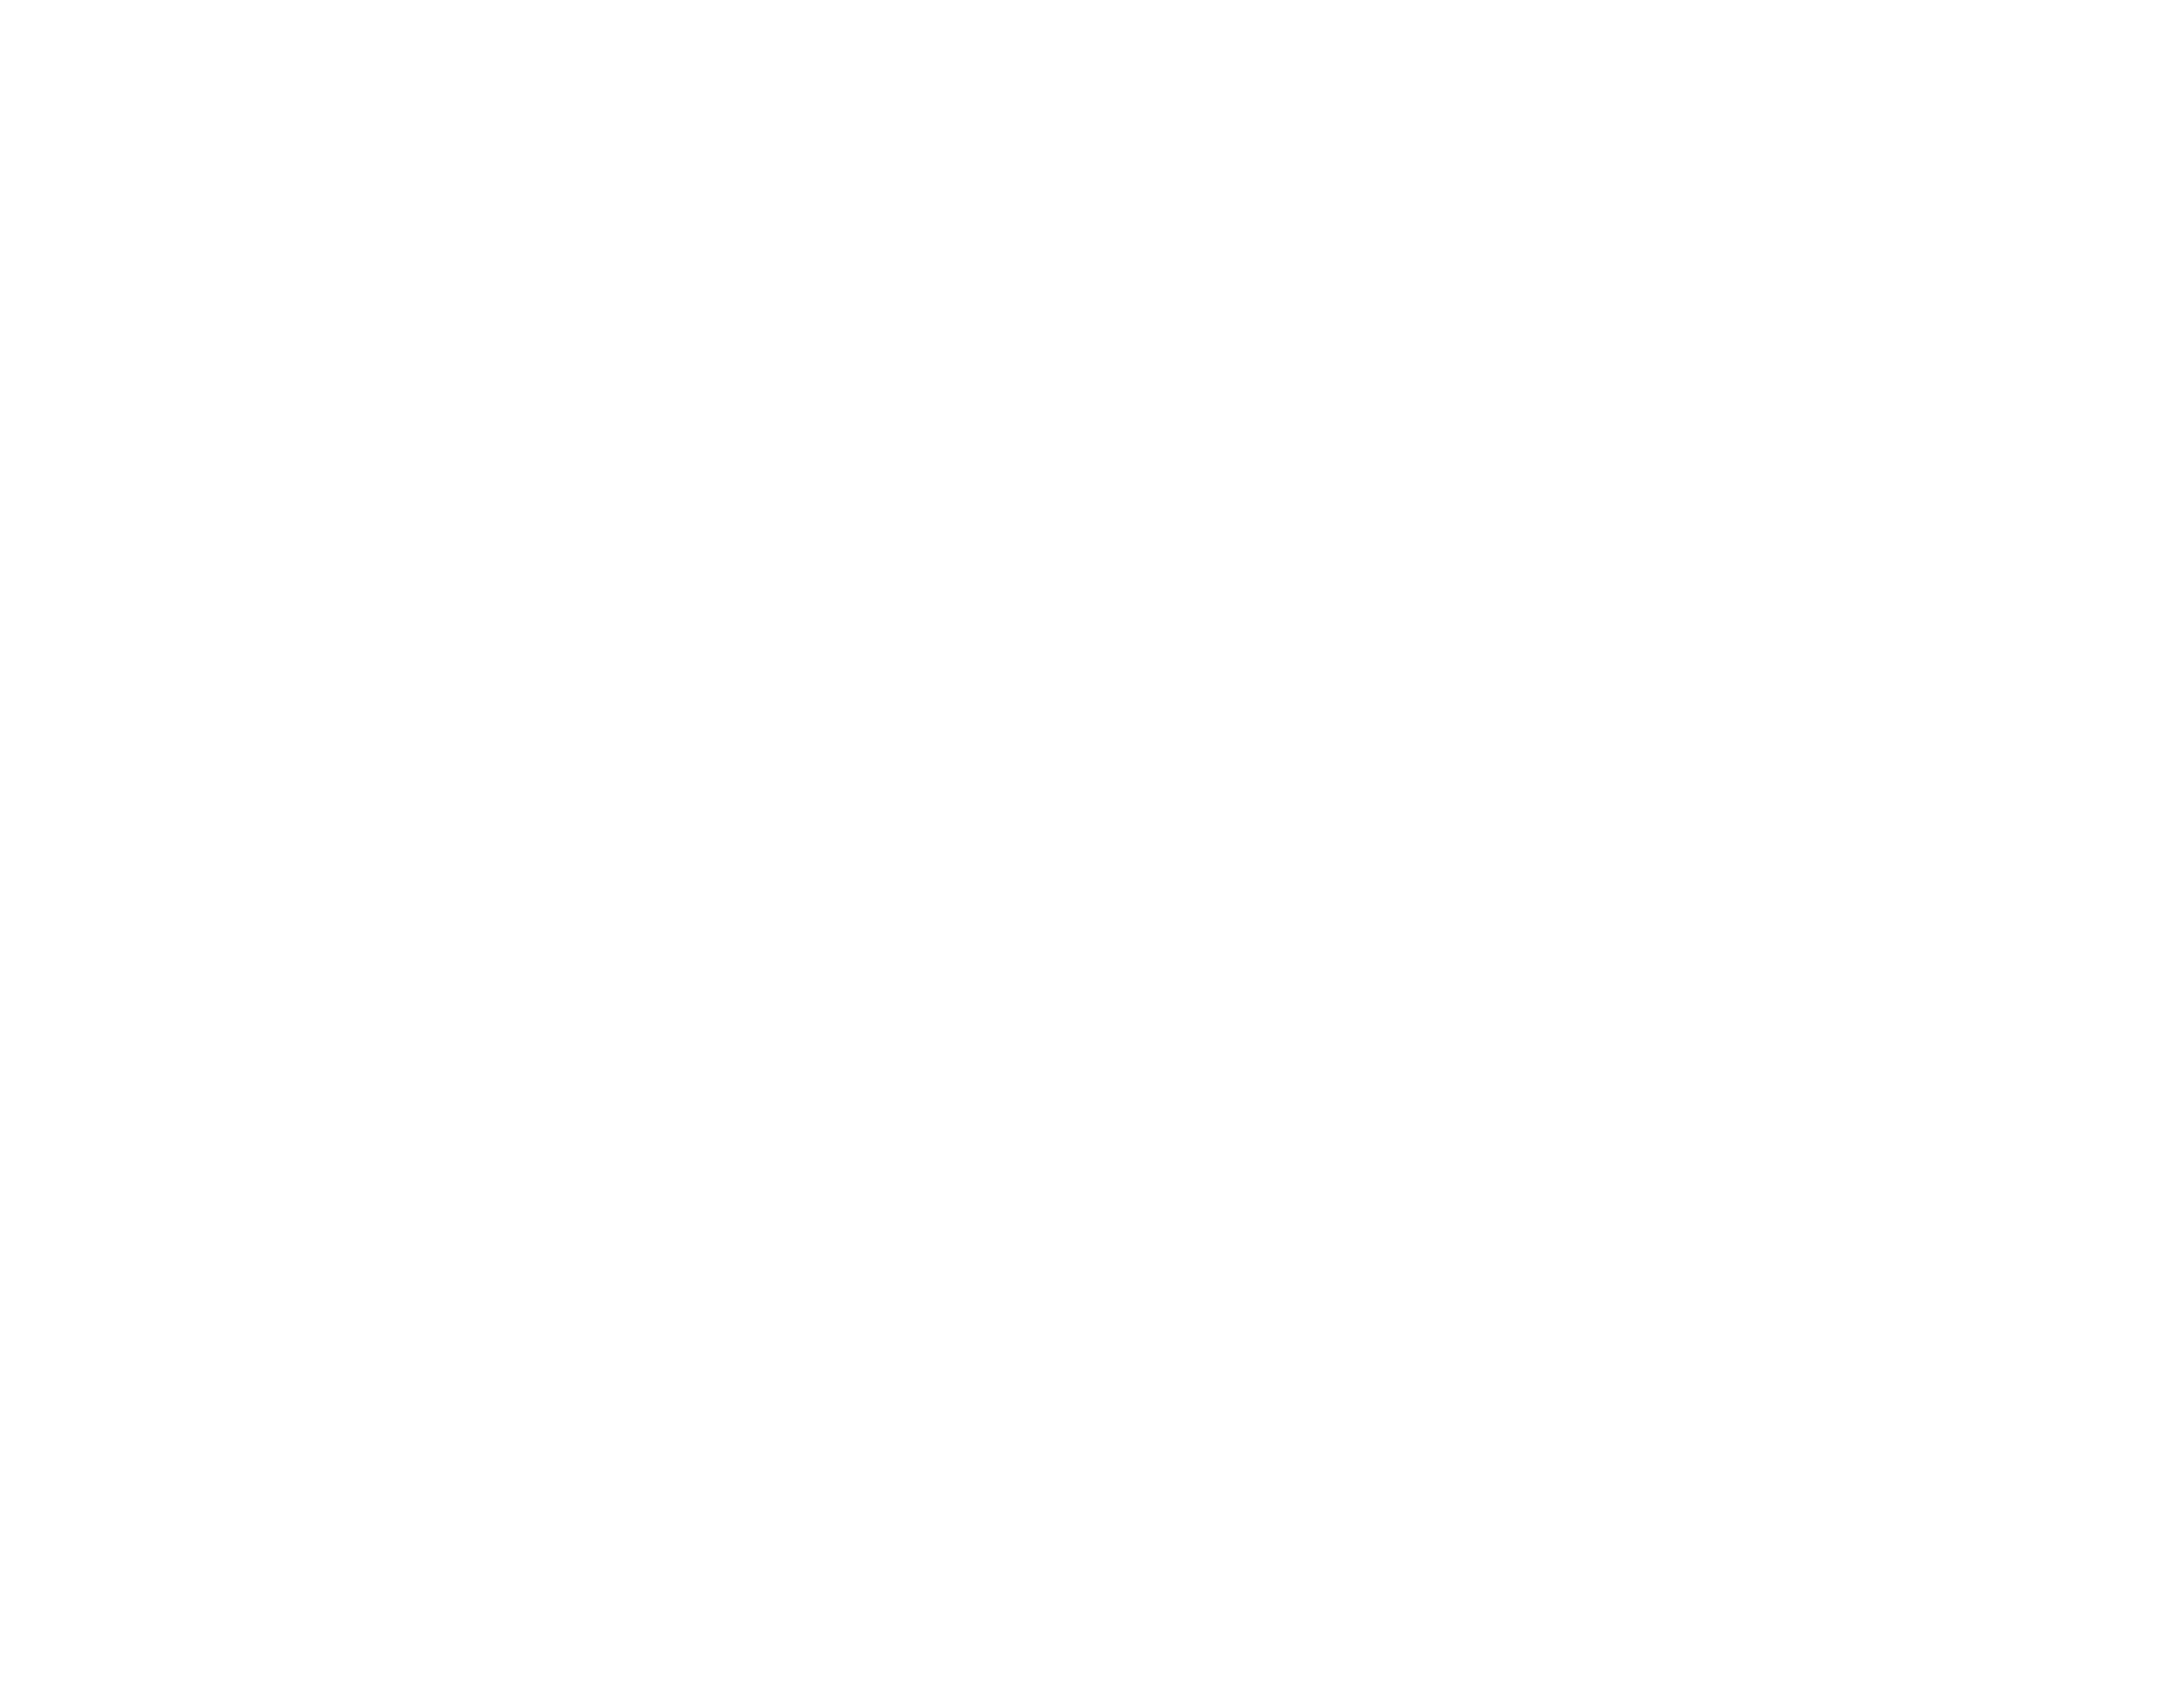

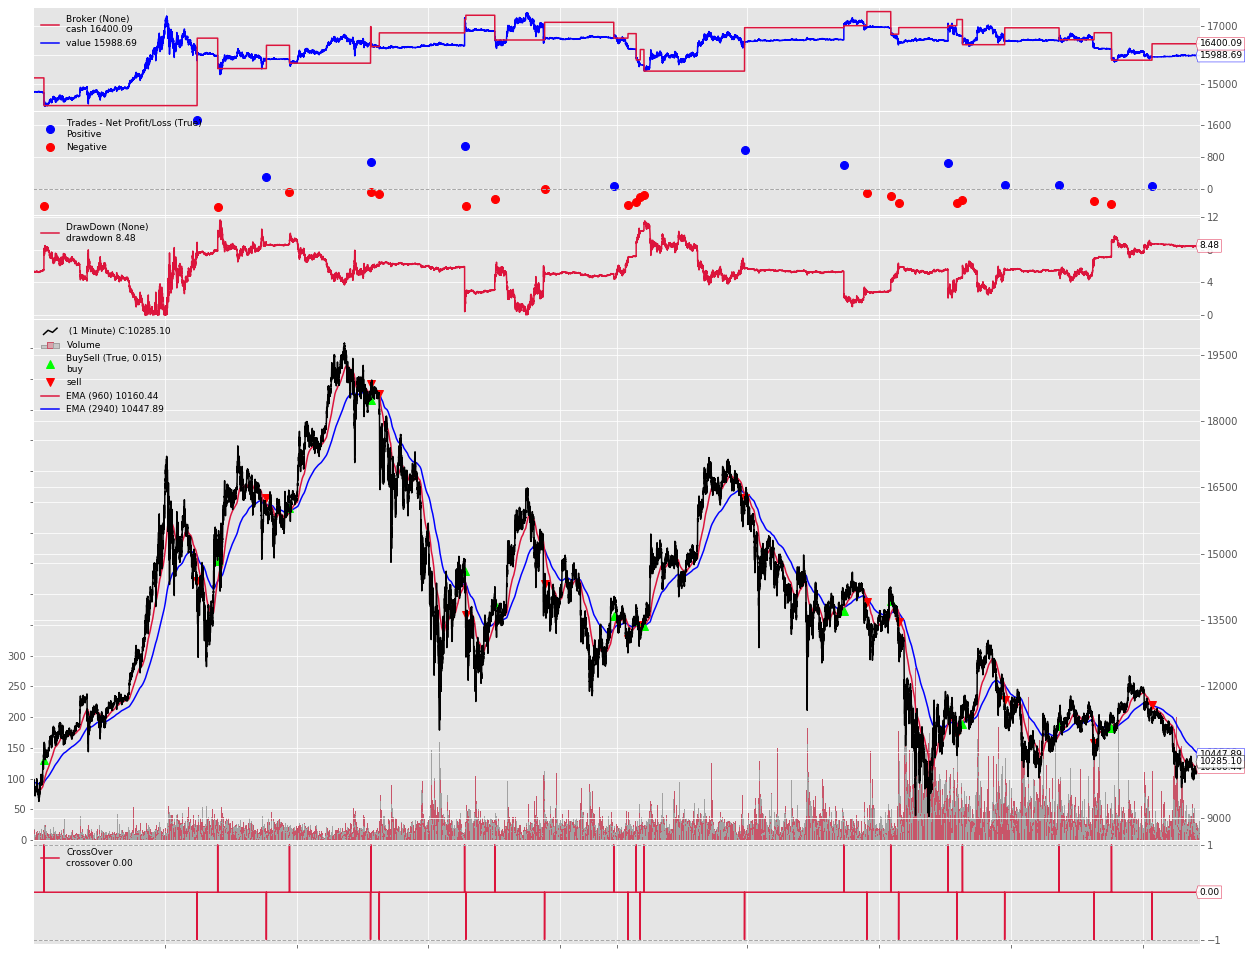

In [31]:
# Backtest with optimised parameters for simple EMA crossover on BTC / USDT

# Create a Stratey
class TestStrategy(bt.Strategy):
    params = (
        ('short_ema', 960),
        ('long_ema', 2940),
        ('mult', 10),  # multiply profits and loses (margin trading)
        ('lever', 10),
        ('printlog', True),
        ('trailstoppct', 0.05),  # trailstop order trail 0.05 = 5%
    )


    def log(self, txt, dt=None, doprint=False):
        ''' Logging function fot this strategy'''
        if self.params.printlog or doprint:
            dt = dt or self.data.datetime[0]
            dt = bt.num2date(dt)
            print('%s, %s' % (dt.isoformat(), txt))


    def __init__(self):
        # Keep a reference to the "close" line in the data[0] dataseries
        self.dataclose = self.datas[0].close

        # To keep track of pending orders and buy price/commission
        self.order = None
        self.buyprice = None
        self.buycomm = None

        # Add exponential moving averages
        ema_short = bt.ind.EMA(period=self.params.short_ema)
        ema_long = bt.ind.EMA(period=self.params.long_ema)
        
        self.crossover = bt.ind.CrossOver(ema_short, ema_long)


    def next(self):
        
        # Simply log the closing price of the series from the reference
        # self.log('Close, %.2f' % self.dataclose[0])
        
        if self.order:
            return  # if an order is active, no new orders are allowed
            
        if self.crossover > 0:  # cross upwards
            if self.position:
                self.log('CLOSE SHORT , %.2f' % self.dataclose[0])
                self.close()

            self.log('BUY CREATE , %.2f' % self.dataclose[0])
            # to make orders at 5% of portfolio value, no more than 500$
            self.buy(size=round(min((cerebro.broker.getvalue()*0.05), 500) / self.dataclose[0], 2))
                    # exectype=bt.Order.StopTrail, trailpercent=self.params.trailstoppct)

        elif self.crossover < 0:  # cross downwards
            if self.position:
                self.log('CLOSE LONG , %.2f' % self.dataclose[0])
                self.close()

            self.log('SELL CREATE , %.2f' % self.dataclose[0])
            # to make orders at 5% of portfolio value, no more than 500$
            self.sell(size=round(min((cerebro.broker.getvalue()*0.05), 500) / self.dataclose[0], 2))
                     # exectype=bt.Order.StopTrail, trailpercent=self.params.trailstoppct)


    def notify_order(self, order):
        if order.status in [order.Submitted, order.Accepted]:
            # Buy/Sell order submitted/accepted to/by broker - Nothing to do
            return

        # Check if an order has been completed
        # Attention: broker could reject order if not enough cash
        if order.status in [order.Completed]:
            
            if order.isbuy():
                self.log('BUY EXECUTED, Price: %.2f, Cost: %.2f, Comm %.2f' %
                         (order.executed.price,
                          order.executed.value,
                          order.executed.comm)
                         )

                self.buyprice = order.executed.price
                self.buycomm = order.executed.comm
            
            elif order.issell():
                self.log('SELL EXECUTED, Price: %.2f, Cost: %.2f, Comm %.2f' %
                         (order.executed.price,
                          order.executed.value,
                          order.executed.comm)
                        )

            self.bar_executed = len(self)

        elif order.status in [order.Canceled, order.Margin, order.Rejected]:
            self.log('Order Canceled/Margin/Rejected', doprint=True)

        # Write down: no pending order
        self.order = None


    def notify_trade(self, trade):
        if trade.isclosed:
            self.log('OPERATION PROFIT, GROSS %.2f, NET %.2f, Acc Balance: %.2f' %
                 (trade.pnl, trade.pnlcomm, cerebro.broker.getvalue()))
        
        elif trade.justopened:
            self.log('TRADE OPENED, SIZE: %2d , VAL: %.2f' % (trade.size, trade.value))


if __name__ == '__main__':
    # Create a cerebro entity
    cerebro = bt.Cerebro()
    
    # Add a strategy
    cerebro.addstrategy(TestStrategy)
    
    # timeframe and compression tells the system we have hourly data
    data = bt.feeds.PandasData(dataname=btc_usdt1m,
                               timeframe=bt.TimeFrame.Minutes,
                               compression=1)

    # Add the Data Feed to Cerebro
    cerebro.adddata(data)

    # Set our desired cash start
    cerebro.broker.setcash(10000.0)  # 10,000

    # Set the commission
    cerebro.broker.setcommission(commission=0.001,  # 0.1% binance commission
                                 mult=TestStrategy.params.mult,
                                 interest=0.01,  # long/short interest 0.01 -> 1%
                                 leverage=TestStrategy.params.lever,
                                 interest_long=True
                                 )
    
    print("Starting Portfolio Value: %.2f" % cerebro.broker.getvalue())

    # Create Analyzers
    # RF = 1%, 
    cerebro.addanalyzer(bt.analyzers.SharpeRatio_A, _name='mysharpe')
    cerebro.addanalyzer(bt.analyzers.DrawDown, _name='mydrawdown')
    cerebro.addanalyzer(bt.analyzers.Returns, _name='returns')
    cerebro.addanalyzer(bt.analyzers.TradeAnalyzer, _name='mytradeanal')
    cerebro.addanalyzer(bt.analyzers.BasicTradeStats , _name='tradestats')
    cerebro.addanalyzer(bt.analyzers.AnnualReturn, _name='annreturn')
    cerebro.addanalyzer(bt.analyzers.SQN, _name='sqn')
    
    # Create Observers
    cerebro.addobserver(bt.observers.DrawDown)

    # Run over everything
    thestrats = cerebro.run()
    thestrat = thestrats[0]
    
    # Print Analyzers
    print()
    print('Annual return:', thestrat.analyzers.annreturn.get_analysis())
    print()
    print('SQN: ', thestrat.analyzers.sqn.get_analysis())
    print()
    print("Final Portfolio Value: %.2f" % cerebro.broker.getvalue())
    print()
    print('Annualised SharpeR:', thestrat.analyzers.mysharpe.get_analysis()['sharperatio'])
    print()
    # CAGR = (end bal / beg bal) ^ 1/n of years - 1
    print('CAGR % ', ((cerebro.broker.getvalue() / 10000) ** 0.5 - 1) * 100)
    print()
    printTradeAnalysis(thestrat.analyzers.mytradeanal.get_analysis())
    print()
    printDrawDown(thestrat.analyzers.mydrawdown.get_analysis())
    print()
    pprint.pprint(dict(thestrat.analyzers.tradestats.get_analysis()))
    
    # to plot part of the data
    cerebro.plot(start=datetime.date(2017, 12, 1), end=datetime.date(2018, 2, 1))
    
    # cerebro.plot()  # plot backtest

# The End